In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import scipy.stats as scs
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import boto3
from StringIO import StringIO
%matplotlib inline

In [2]:
tickets = pd.read_csv('./tickets.csv', delimiter='|')

In [3]:
meal_price_outliers = list(tickets[(tickets.ticket_price < 5) | (tickets.ticket_price > 200)].meal_id)

def is_meal_with_crazy_ticket_price(row):
    if row['meal_id'] in meal_price_outliers:
        return False
    else:
        return True

tickets = tickets[tickets.apply(is_meal_with_crazy_ticket_price, axis=1)]

In [4]:
X = tickets[['percentage_of_seats_sold', 'meal_id','number_of_seats', 'ticket_price', 'sold']]

In [5]:
meals = pd.read_csv('./cleaned/meals.csv', header=None, names=['Id',
 'Cook Id', 'Venue Id', 'Menu Id', 'Is Cancelled', 'Is Active', 'Title', 'Meal Date', 'Day of Date Added', 'Is Public?', 'Number Of Seats', 'Venue Style', 'Venue Capacity', 'Area Id', 'Menu Style', 'Cuisine Type', 'Meal Categories', 'is_category_kosher', 'is_category_paleo', 'is_category_organic', 'is_category_vegetarian', 'is_category_vegan', 'is_category_gluten_free', 'is_category_raw', 'is_category_halal', 'is_category_local', 'is_cuisine_type_portuguese', 'is_cuisine_type_irish', 'is_cuisine_type_cajun_creole', 'is_cuisine_type_polynesian', 'is_cuisine_type_chinese', 'is_cuisine_type_peruvian', 'is_cuisine_type_chamorro', 'is_cuisine_type_belgian', 'is_cuisine_type_central_american', 'is_cuisine_type_mediterranean', 'is_cuisine_type_japanese', 'is_cuisine_type_mexican', 'is_cuisine_type_singaporean', 'is_cuisine_type_ecuadorian', 'is_cuisine_type_persian', 'is_cuisine_type_lao', 'is_cuisine_type_asian', 'is_cuisine_type_latin_american', 'is_cuisine_type_spanish', 'is_cuisine_type_ice_cream_gelato', 'is_cuisine_type_barbecue', 'is_cuisine_type_cafe', 'is_cuisine_type_thai', 'is_cuisine_type_paleo', 'is_cuisine_type_caribbean', 'is_cuisine_type_health_food', 'is_cuisine_type_argentinian', 'is_cuisine_type_hispanic', 'is_cuisine_type_tapas_small_plates', 'is_cuisine_type_european', 'is_cuisine_type_desserts_bakeries', 'is_cuisine_type_south_american', 'is_cuisine_type_gastropub_food', 'is_cuisine_type_other', 'is_cuisine_type_guatemalan', 'is_cuisine_type_brazilian', 'is_cuisine_type_korean', 'is_cuisine_type_salvadorian', 'is_cuisine_type_pizza', 'is_cuisine_type_indonesian', 'is_cuisine_type_balkan', 'is_cuisine_type_srilankan', 'is_cuisine_type_indian', 'is_cuisine_type_hawaiian', 'is_cuisine_type_jewish', 'is_cuisine_type_taiwanese', 'is_cuisine_type_african', 'is_cuisine_type_middle_eastern', 'is_cuisine_type_french', 'is_cuisine_type_asian_noodle_soup', 'is_cuisine_type_vegan', 'is_cuisine_type_german', 'is_cuisine_type_russian', 'is_cuisine_type_vietnamese', 'is_cuisine_type_brunch', 'is_cuisine_type_australian', 'is_cuisine_type_cuban', 'is_cuisine_type_filipino', 'is_cuisine_type_vegetarian', 'is_cuisine_type_turkish', 'is_cuisine_type_malaysian', 'is_cuisine_type_british', 'is_cuisine_type_colombian', 'is_cuisine_type_north_african', 'is_cuisine_type_greek', 'is_cuisine_type_burmese', 'is_cuisine_type_east_european', 'is_cuisine_type_nordic', 'is_cuisine_type_north_american', 'is_cuisine_type_american', 'is_cuisine_type_italian', 'is_cuisine_type_seafood', 'is_cuisine_type_soul_food', 'is_cuisine_type_californian'])

In [6]:
meals['meal_date'] = pd.to_datetime(meals['Meal Date'])
meals['created_date'] = pd.to_datetime(meals['Day of Date Added'])
meals['meal_year'] = meals['meal_date'].apply(lambda x: x.year)
meals['meal_month'] = meals['meal_date'].apply(lambda x: x.month)
meals['meal_day_of_week'] = meals['meal_date'].apply(lambda x: x.weekday())
meals['meal_is_on_weekday'] = meals['meal_day_of_week'].apply(lambda x: 1 if x < 5 else 0)
meals['listed_days'] = (meals['meal_date'] - meals['created_date']).apply(lambda x: x.days if x.days > 0 else 0)

In [7]:
meals = meals[['Id', 'Venue Id', 'Menu Id', 'meal_date', 'meal_is_on_weekday', 'listed_days']]

In [8]:
menus = pd.read_csv('./cleaned/menus.csv', header=None, names=['Id', 'Cook Id', 'Title', 'About', 'Cuisine Type', 'Day of Date Added', 'Menu Style', 'Count of distinct Menu Dish Id', 'is_menus_cuisine_type_portuguese', 'is_menus_cuisine_type_irish', 'is_menus_cuisine_type_cajun_creole', 'is_menus_cuisine_type_polynesian', 'is_menus_cuisine_type_chinese', 'is_menus_cuisine_type_peruvian', 'is_menus_cuisine_type_chamorro', 'is_menus_cuisine_type_belgian', 'is_menus_cuisine_type_central_american', 'is_menus_cuisine_type_mediterranean', 'is_menus_cuisine_type_japanese', 'is_menus_cuisine_type_mexican', 'is_menus_cuisine_type_singaporean', 'is_menus_cuisine_type_ecuadorian', 'is_menus_cuisine_type_persian', 'is_menus_cuisine_type_lao', 'is_menus_cuisine_type_asian', 'is_menus_cuisine_type_latin_american', 'is_menus_cuisine_type_spanish', 'is_menus_cuisine_type_ice_cream_gelato', 'is_menus_cuisine_type_barbecue', 'is_menus_cuisine_type_cafe', 'is_menus_cuisine_type_thai', 'is_menus_cuisine_type_paleo', 'is_menus_cuisine_type_caribbean', 'is_menus_cuisine_type_health_food', 'is_menus_cuisine_type_argentinian', 'is_menus_cuisine_type_hispanic', 'is_menus_cuisine_type_tapas_small_plates', 'is_menus_cuisine_type_european', 'is_menus_cuisine_type_desserts_bakeries', 'is_menus_cuisine_type_south_american', 'is_menus_cuisine_type_gastropub_food', 'is_menus_cuisine_type_other', 'is_menus_cuisine_type_guatemalan', 'is_menus_cuisine_type_brazilian', 'is_menus_cuisine_type_korean', 'is_menus_cuisine_type_colombian', 'is_menus_cuisine_type_pizza', 'is_menus_cuisine_type_indonesian', 'is_menus_cuisine_type_balkan', 'is_menus_cuisine_type_srilankan', 'is_menus_cuisine_type_indian', 'is_menus_cuisine_type_hawaiian', 'is_menus_cuisine_type_jewish', 'is_menus_cuisine_type_taiwanese', 'is_menus_cuisine_type_african', 'is_menus_cuisine_type_middle_eastern', 'is_menus_cuisine_type_vegan', 'is_menus_cuisine_type_asian_noodle_soup', 'is_menus_cuisine_type_french', 'is_menus_cuisine_type_german', 'is_menus_cuisine_type_russian', 'is_menus_cuisine_type_vietnamese', 'is_menus_cuisine_type_brunch', 'is_menus_cuisine_type_australian', 'is_menus_cuisine_type_cuban', 'is_menus_cuisine_type_filipino', 'is_menus_cuisine_type_vegetarian', 'is_menus_cuisine_type_turkish', 'is_menus_cuisine_type_malaysian', 'is_menus_cuisine_type_british', 'is_menus_cuisine_type_salvadorian', 'is_menus_cuisine_type_north_african', 'is_menus_cuisine_type_greek', 'is_menus_cuisine_type_burmese', 'is_menus_cuisine_type_east_european', 'is_menus_cuisine_type_nordic', 'is_menus_cuisine_type_north_american', 'is_menus_cuisine_type_american', 'is_menus_cuisine_type_italian', 'is_menus_cuisine_type_seafood', 'is_menus_cuisine_type_soul_food', 'is_menus_cuisine_type_californian'])

In [9]:
menus['course_count'] = menus['Count of distinct Menu Dish Id']
menus = menus[['Id', 'Cook Id', 'is_menus_cuisine_type_portuguese', 'is_menus_cuisine_type_irish', 'is_menus_cuisine_type_cajun_creole', 'is_menus_cuisine_type_polynesian', 'is_menus_cuisine_type_chinese', 'is_menus_cuisine_type_peruvian', 'is_menus_cuisine_type_chamorro', 'is_menus_cuisine_type_belgian', 'is_menus_cuisine_type_central_american', 'is_menus_cuisine_type_mediterranean', 'is_menus_cuisine_type_japanese', 'is_menus_cuisine_type_mexican', 'is_menus_cuisine_type_singaporean', 'is_menus_cuisine_type_ecuadorian', 'is_menus_cuisine_type_persian', 'is_menus_cuisine_type_lao', 'is_menus_cuisine_type_asian', 'is_menus_cuisine_type_latin_american', 'is_menus_cuisine_type_spanish', 'is_menus_cuisine_type_ice_cream_gelato', 'is_menus_cuisine_type_barbecue', 'is_menus_cuisine_type_cafe', 'is_menus_cuisine_type_thai', 'is_menus_cuisine_type_paleo', 'is_menus_cuisine_type_caribbean', 'is_menus_cuisine_type_health_food', 'is_menus_cuisine_type_argentinian', 'is_menus_cuisine_type_hispanic', 'is_menus_cuisine_type_tapas_small_plates', 'is_menus_cuisine_type_european', 'is_menus_cuisine_type_desserts_bakeries', 'is_menus_cuisine_type_south_american', 'is_menus_cuisine_type_gastropub_food', 'is_menus_cuisine_type_other', 'is_menus_cuisine_type_guatemalan', 'is_menus_cuisine_type_brazilian', 'is_menus_cuisine_type_korean', 'is_menus_cuisine_type_colombian', 'is_menus_cuisine_type_pizza', 'is_menus_cuisine_type_indonesian', 'is_menus_cuisine_type_balkan', 'is_menus_cuisine_type_srilankan', 'is_menus_cuisine_type_indian', 'is_menus_cuisine_type_hawaiian', 'is_menus_cuisine_type_jewish', 'is_menus_cuisine_type_taiwanese', 'is_menus_cuisine_type_african', 'is_menus_cuisine_type_middle_eastern', 'is_menus_cuisine_type_vegan', 'is_menus_cuisine_type_asian_noodle_soup', 'is_menus_cuisine_type_french', 'is_menus_cuisine_type_german', 'is_menus_cuisine_type_russian', 'is_menus_cuisine_type_vietnamese', 'is_menus_cuisine_type_brunch', 'is_menus_cuisine_type_australian', 'is_menus_cuisine_type_cuban', 'is_menus_cuisine_type_filipino', 'is_menus_cuisine_type_vegetarian', 'is_menus_cuisine_type_turkish', 'is_menus_cuisine_type_malaysian', 'is_menus_cuisine_type_british', 'is_menus_cuisine_type_salvadorian', 'is_menus_cuisine_type_north_african', 'is_menus_cuisine_type_greek', 'is_menus_cuisine_type_burmese', 'is_menus_cuisine_type_east_european', 'is_menus_cuisine_type_nordic', 'is_menus_cuisine_type_north_american', 'is_menus_cuisine_type_american', 'is_menus_cuisine_type_italian', 'is_menus_cuisine_type_seafood', 'is_menus_cuisine_type_soul_food', 'is_menus_cuisine_type_californian', 'course_count']]

In [10]:
expanded_meals = meals.merge(menus, how='inner', left_on='Menu Id', right_on='Id', suffixes=['_meal', '_menu'])

In [11]:
cooks = pd.read_csv('./cleaned/cooks.csv', header=None, names=['Id', 'Cuisine Types', 'Day of Date Joined', 'Cooking Experience', 'Cooking Experience Years', 'Date of Application', 'Reasons For Cooking', 'Referrer', 'is_cooks_cuisine_type_portuguese', 'is_cooks_cuisine_type_cajun_creole', 'is_cooks_cuisine_type_chinese', 'is_cooks_cuisine_type_peruvian', 'is_cooks_cuisine_type_chamorro', 'is_cooks_cuisine_type_central_american', 'is_cooks_cuisine_type_mediterranean', 'is_cooks_cuisine_type_japanese', 'is_cooks_cuisine_type_mexican', 'is_cooks_cuisine_type_ecuadorian', 'is_cooks_cuisine_type_pizza', 'is_cooks_cuisine_type_persian', 'is_cooks_cuisine_type_asian', 'is_cooks_cuisine_type_latin_american', 'is_cooks_cuisine_type_spanish', 'is_cooks_cuisine_type_ice_cream_gelato', 'is_cooks_cuisine_type_barbecue', 'is_cooks_cuisine_type_brunch', 'is_cooks_cuisine_type_paleo', 'is_cooks_cuisine_type_caribbean', 'is_cooks_cuisine_type_argentinian', 'is_cooks_cuisine_type_vietnamese', 'is_cooks_cuisine_type_tapas_small_plates', 'is_cooks_cuisine_type_burmese', 'is_cooks_cuisine_type_desserts_bakeries', 'is_cooks_cuisine_type_south_american', 'is_cooks_cuisine_type_gastropub_food', 'is_cooks_cuisine_type_other', 'is_cooks_cuisine_type_brazilian', 'is_cooks_cuisine_type_korean', 'is_cooks_cuisine_type_colombian', 'is_cooks_cuisine_type_european', 'is_cooks_cuisine_type_indonesian', 'is_cooks_cuisine_type_lao', 'is_cooks_cuisine_type_indian', 'is_cooks_cuisine_type_hawaiian', 'is_cooks_cuisine_type_jewish', 'is_cooks_cuisine_type_taiwanese', 'is_cooks_cuisine_type_african', 'is_cooks_cuisine_type_middle_eastern', 'is_cooks_cuisine_type_french', 'is_cooks_cuisine_type_asian_noodle_soup', 'is_cooks_cuisine_type_greek', 'is_cooks_cuisine_type_vegan', 'is_cooks_cuisine_type_german', 'is_cooks_cuisine_type_russian', 'is_cooks_cuisine_type_thai', 'is_cooks_cuisine_type_australian', 'is_cooks_cuisine_type_balkan', 'is_cooks_cuisine_type_filipino', 'is_cooks_cuisine_type_vegetarian', 'is_cooks_cuisine_type_turkish', 'is_cooks_cuisine_type_malaysian', 'is_cooks_cuisine_type_british', 'is_cooks_cuisine_type_health_food', 'is_cooks_cuisine_type_north_african', 'is_cooks_cuisine_type_hispanic', 'is_cooks_cuisine_type_american', 'is_cooks_cuisine_type_east_european', 'is_cooks_cuisine_type_nordic', 'is_cooks_cuisine_type_north_american', 'is_cooks_cuisine_type_californian', 'is_cooks_cuisine_type_seafood', 'is_cooks_cuisine_type_soul_food', 'is_cooks_cuisine_type_italian', 'is_reason_meet', 'is_reason_brand', 'is_reason_money'])

In [12]:
cooks['Cooking Experience Years'].fillna('missing', inplace=True)
cooks['Cooking Experience'].fillna('missing', inplace=True)
cooks['Referrer'].fillna('missing', inplace=True)
cooks['cook_applied_date'] = pd.to_datetime(cooks['Date of Application'])
cooks['cook_joined_date'] = pd.to_datetime(cooks['Day of Date Joined'])

In [13]:
def split_and_add_to_set(column_values, unique_structure, split_character):
    for val in column_values.split(split_character):
        unique_structure.add(val)

def clean_value(val):
    return val.replace('/', '_').replace(' ', '_').lower()

In [14]:
unique_cooking_experience_years_values = set()

cooks['Cooking Experience Years'].apply(split_and_add_to_set, args=(unique_cooking_experience_years_values, ',', ))

for category in unique_cooking_experience_years_values:
    if len(category) > 0:
        column_name = 'is_cooking_experience_years_' + clean_value(category)
        cooks[column_name] = cooks['Cooking Experience Years'].apply(lambda x: 1 if category in x.split(',') else 0)

In [15]:
unique_cooking_experience_values = set()

cooks['Cooking Experience'].apply(split_and_add_to_set, args=(unique_cooking_experience_values, ' or ', ))

for category in unique_cooking_experience_values:
    if len(category) > 0:
        column_name = 'is_cooking_experience_' + clean_value(category)
        cooks[column_name] = cooks['Cooking Experience'].apply(lambda x: 1 if category in x.split(',') else 0)

In [16]:
unique_referrer_values = set()

cooks['Referrer'].apply(split_and_add_to_set, args=(unique_referrer_values, ',', ))

for category in unique_referrer_values:
    if len(category) > 0:
        column_name = 'is_cook_referrer_' + clean_value(category)
        cooks[column_name] = cooks['Referrer'].apply(lambda x: 1 if category in x.split(',') else 0)

In [17]:
cooks['cooks_missing_applied_date'] = cooks['cook_applied_date'].isnull().apply(lambda x: 1 if x else 0)

In [18]:
cooks['is_cooks_join_reason_meet'] = cooks['is_reason_meet']
cooks['is_cooks_join_reason_brand'] = cooks['is_reason_brand']
cooks['is_cooks_join_reason_money'] = cooks['is_reason_money']

In [19]:
cooks = cooks[['Id', 'cook_joined_date', 'cook_applied_date', 'cooks_missing_applied_date', 'is_cooking_experience_years_8+', 'is_cooking_experience_years_1-3', 'is_cooking_experience_years_4-7', 'is_cooking_experience_years_0', 'is_cooking_experience_years_missing', 'is_cooking_experience_current-chef', 'is_cooking_experience_avid', 'is_cooking_experience_former-chef', 'is_cooking_experience_missing', 'is_cooking_experience_home_cook', 'is_cooking_experience_ownerf', 'is_cooking_experience_novice', 'is_cooking_experience_private', 'is_cooking_experience_entrepreneur', 'is_cooking_experience_caterer', 'is_cooking_experience_chef_de_partie', 'is_cooking_experience_personal_chef', 'is_cooking_experience_chef_de_cuisine', 'is_cooking_experience_chef-in-traning', 'is_cooking_experience_commis', 'is_cooking_experience_sous_chef', 'is_cook_referrer_google', 'is_cook_referrer_missing', 'is_cook_referrer_job', 'is_cook_referrer_other', 'is_cook_referrer_social', 'is_cook_referrer_news', 'is_cook_referrer_referral', 'is_cook_referrer_meal', 'is_cook_referrer_friend', 'is_cooks_join_reason_meet', 'is_cooks_join_reason_brand', 'is_cooks_join_reason_money']]

In [20]:
expanded_meals = expanded_meals.merge(cooks, how='inner', left_on='Cook Id', right_on='Id', suffixes=['_meal2', '_cook'])

In [21]:
venues = pd.read_csv('./cleaned/venues.csv', header=None, names=['Id', 'Name', 'Venue Style', 'Location Id', 'Area Id', 'Max Seats', 'Monthly Services', 'Owner Id', 'Address', 'Day of Date Added', 'Neighborhood', 'Zipcode'])
venues['Name'].fillna('missing', inplace=True)

In [22]:
unqiue_venue_style = set()

venues['Venue Style'].apply(split_and_add_to_set, args=(unqiue_venue_style, ',', ))

for category in unqiue_venue_style:
    if len(category) > 0:
        column_name = 'is_venue_style_' + clean_value(category)
        venues[column_name] = venues['Venue Style'].apply(lambda x: 1 if category in x.split(',') else 0)

In [23]:
popular_venues = ['TheGarage', 'theNewberry', 'theLab', 'theUnion', 'theBocca', 'theTradesman', 'Foundation Cafe', 'Private Location', 'sound and savor', 'theCommons', 'The Humboldt House', 'theGreenhouse', 'Olea', 'R.T.B. At Dabba', 'Golden State Room', 'Tournant', 'Picnic on Third', 'Frances', 'theClub', 'Home', 'My Home']

In [24]:
for venue in popular_venues:
    venues['is_venue_name_' + venue] = venues['Name'].apply(lambda x: 1 if x.strip() == venue else 0)

In [25]:
venues = venues[['Id','is_venue_style_pop-up-space', 'is_venue_style_apartment', 'is_venue_style_restaurant','is_venue_style_farm', 'is_venue_style_house', 'is_venue_style_brown-stone', 'is_venue_name_TheGarage', 'is_venue_name_theNewberry', 'is_venue_name_theLab', 'is_venue_name_theUnion', 'is_venue_name_theBocca', 'is_venue_name_theTradesman', 'is_venue_name_Foundation Cafe', 'is_venue_name_Private Location', 'is_venue_name_sound and savor', 'is_venue_name_theCommons', 'is_venue_name_The Humboldt House', 'is_venue_name_theGreenhouse', 'is_venue_name_Olea', 'is_venue_name_R.T.B. At Dabba', 'is_venue_name_Golden State Room', 'is_venue_name_Tournant', 'is_venue_name_Picnic on Third', 'is_venue_name_Frances', 'is_venue_name_theClub', 'is_venue_name_Home', 'is_venue_name_My Home']]

In [26]:
expanded_meals = expanded_meals.merge(venues, how='inner', left_on='Venue Id', right_on='Id', suffixes=['_meal3', '_venue'])

In [27]:
expanded_meals = expanded_meals[['Id_meal', 'cook_joined_date', 'meal_date', 'meal_is_on_weekday', 'listed_days', 'is_menus_cuisine_type_portuguese', 'is_menus_cuisine_type_irish', 'is_menus_cuisine_type_cajun_creole', 'is_menus_cuisine_type_polynesian', 'is_menus_cuisine_type_chinese', 'is_menus_cuisine_type_peruvian', 'is_menus_cuisine_type_chamorro', 'is_menus_cuisine_type_belgian', 'is_menus_cuisine_type_central_american', 'is_menus_cuisine_type_mediterranean', 'is_menus_cuisine_type_japanese', 'is_menus_cuisine_type_mexican', 'is_menus_cuisine_type_singaporean', 'is_menus_cuisine_type_ecuadorian', 'is_menus_cuisine_type_persian', 'is_menus_cuisine_type_lao', 'is_menus_cuisine_type_asian', 'is_menus_cuisine_type_latin_american', 'is_menus_cuisine_type_spanish', 'is_menus_cuisine_type_ice_cream_gelato', 'is_menus_cuisine_type_barbecue', 'is_menus_cuisine_type_cafe', 'is_menus_cuisine_type_thai', 'is_menus_cuisine_type_paleo', 'is_menus_cuisine_type_caribbean', 'is_menus_cuisine_type_health_food', 'is_menus_cuisine_type_argentinian', 'is_menus_cuisine_type_hispanic', 'is_menus_cuisine_type_tapas_small_plates', 'is_menus_cuisine_type_european', 'is_menus_cuisine_type_desserts_bakeries', 'is_menus_cuisine_type_south_american', 'is_menus_cuisine_type_gastropub_food', 'is_menus_cuisine_type_other', 'is_menus_cuisine_type_guatemalan', 'is_menus_cuisine_type_brazilian', 'is_menus_cuisine_type_korean', 'is_menus_cuisine_type_colombian', 'is_menus_cuisine_type_pizza', 'is_menus_cuisine_type_indonesian', 'is_menus_cuisine_type_balkan', 'is_menus_cuisine_type_srilankan', 'is_menus_cuisine_type_indian', 'is_menus_cuisine_type_hawaiian', 'is_menus_cuisine_type_jewish', 'is_menus_cuisine_type_taiwanese', 'is_menus_cuisine_type_african', 'is_menus_cuisine_type_middle_eastern', 'is_menus_cuisine_type_vegan', 'is_menus_cuisine_type_asian_noodle_soup', 'is_menus_cuisine_type_french', 'is_menus_cuisine_type_german', 'is_menus_cuisine_type_russian', 'is_menus_cuisine_type_vietnamese', 'is_menus_cuisine_type_brunch', 'is_menus_cuisine_type_australian', 'is_menus_cuisine_type_cuban', 'is_menus_cuisine_type_filipino', 'is_menus_cuisine_type_vegetarian', 'is_menus_cuisine_type_turkish', 'is_menus_cuisine_type_malaysian', 'is_menus_cuisine_type_british', 'is_menus_cuisine_type_salvadorian', 'is_menus_cuisine_type_north_african', 'is_menus_cuisine_type_greek', 'is_menus_cuisine_type_burmese', 'is_menus_cuisine_type_east_european', 'is_menus_cuisine_type_nordic', 'is_menus_cuisine_type_north_american', 'is_menus_cuisine_type_american', 'is_menus_cuisine_type_italian', 'is_menus_cuisine_type_seafood', 'is_menus_cuisine_type_soul_food', 'is_menus_cuisine_type_californian', 'course_count', 'cook_applied_date', 'cooks_missing_applied_date', 'is_cooking_experience_years_8+', 'is_cooking_experience_years_1-3', 'is_cooking_experience_years_4-7', 'is_cooking_experience_years_0', 'is_cooking_experience_years_missing', 'is_cooking_experience_current-chef', 'is_cooking_experience_avid', 'is_cooking_experience_former-chef', 'is_cooking_experience_missing', 'is_cooking_experience_home_cook', 'is_cooking_experience_ownerf', 'is_cooking_experience_novice', 'is_cooking_experience_private', 'is_cooking_experience_entrepreneur', 'is_cooking_experience_caterer', 'is_cooking_experience_chef_de_partie', 'is_cooking_experience_personal_chef', 'is_cooking_experience_chef_de_cuisine', 'is_cooking_experience_chef-in-traning', 'is_cooking_experience_commis', 'is_cooking_experience_sous_chef', 'is_cook_referrer_google', 'is_cook_referrer_missing', 'is_cook_referrer_job', 'is_cook_referrer_other', 'is_cook_referrer_social', 'is_cook_referrer_news', 'is_cook_referrer_referral', 'is_cook_referrer_meal', 'is_cook_referrer_friend', 'is_cooks_join_reason_meet', 'is_cooks_join_reason_brand', 'is_cooks_join_reason_money', 'is_venue_style_pop-up-space', 'is_venue_style_apartment', 'is_venue_style_restaurant', 'is_venue_style_farm', 'is_venue_style_house', 'is_venue_style_brown-stone', 'is_venue_name_TheGarage', 'is_venue_name_theNewberry', 'is_venue_name_theLab', 'is_venue_name_theUnion', 'is_venue_name_theBocca', 'is_venue_name_theTradesman', 'is_venue_name_Foundation Cafe', 'is_venue_name_Private Location', 'is_venue_name_sound and savor', 'is_venue_name_theCommons', 'is_venue_name_The Humboldt House', 'is_venue_name_theGreenhouse', 'is_venue_name_Olea', 'is_venue_name_R.T.B. At Dabba', 'is_venue_name_Golden State Room', 'is_venue_name_Tournant', 'is_venue_name_Picnic on Third', 'is_venue_name_Frances', 'is_venue_name_theClub', 'is_venue_name_Home', 'is_venue_name_My Home']]

### Days on platform

In [28]:
def compute_cook_days_on_platform(row):
    if (row['meal_date'] - row['cook_joined_date']).days < 0:
        return None
    else:
        return (row['meal_date'] - row['cook_joined_date']).days

expanded_meals['cook_days_on_platform'] = expanded_meals.apply(compute_cook_days_on_platform, axis=1)

In [29]:
expanded_meals['couldnt_compute_cook_days_on_platform'] = expanded_meals['cook_days_on_platform'].apply(lambda x: 0 if x > 0 else 1)

In [30]:
expanded_meals['cook_days_on_platform'].fillna(int(expanded_meals['cook_days_on_platform'].median()), inplace=True)

In [31]:
X = X.merge(expanded_meals, how='inner', left_on='meal_id', right_on='Id_meal')
del X['Id_meal']
del X['meal_id']
del X['meal_date']
del X['cook_applied_date']
del X['cook_joined_date']
X['meal_is_on_weekday'].fillna(0, inplace=True)
X['is_menus_cuisine_type_portuguese'].fillna(0, inplace=True)
X['is_menus_cuisine_type_irish'].fillna(0, inplace=True)
X['is_menus_cuisine_type_cajun_creole'].fillna(0, inplace=True)
X['is_menus_cuisine_type_polynesian'].fillna(0, inplace=True)
X['is_menus_cuisine_type_chinese'].fillna(0, inplace=True)
X['is_menus_cuisine_type_peruvian'].fillna(0, inplace=True)
X['is_menus_cuisine_type_chamorro'].fillna(0, inplace=True)
X['is_menus_cuisine_type_belgian'].fillna(0, inplace=True)
X['is_menus_cuisine_type_central_american'].fillna(0, inplace=True)
X['is_menus_cuisine_type_mediterranean'].fillna(0, inplace=True)
X['is_menus_cuisine_type_japanese'].fillna(0, inplace=True)
X['is_menus_cuisine_type_mexican'].fillna(0, inplace=True)
X['is_menus_cuisine_type_singaporean'].fillna(0, inplace=True)
X['is_menus_cuisine_type_ecuadorian'].fillna(0, inplace=True)
X['is_menus_cuisine_type_persian'].fillna(0, inplace=True)
X['is_menus_cuisine_type_lao'].fillna(0, inplace=True)
X['is_menus_cuisine_type_asian'].fillna(0, inplace=True)
X['is_menus_cuisine_type_latin_american'].fillna(0, inplace=True)
X['is_menus_cuisine_type_spanish'].fillna(0, inplace=True)
X['is_menus_cuisine_type_ice_cream_gelato'].fillna(0, inplace=True)
X['is_menus_cuisine_type_barbecue'].fillna(0, inplace=True)
X['is_menus_cuisine_type_cafe'].fillna(0, inplace=True)
X['is_menus_cuisine_type_thai'].fillna(0, inplace=True)
X['is_menus_cuisine_type_paleo'].fillna(0, inplace=True)
X['is_menus_cuisine_type_caribbean'].fillna(0, inplace=True)
X['is_menus_cuisine_type_health_food'].fillna(0, inplace=True)
X['is_menus_cuisine_type_argentinian'].fillna(0, inplace=True)
X['is_menus_cuisine_type_hispanic'].fillna(0, inplace=True)
X['is_menus_cuisine_type_tapas_small_plates'].fillna(0, inplace=True)
X['is_menus_cuisine_type_european'].fillna(0, inplace=True)
X['is_menus_cuisine_type_desserts_bakeries'].fillna(0, inplace=True)
X['is_menus_cuisine_type_south_american'].fillna(0, inplace=True)
X['is_menus_cuisine_type_gastropub_food'].fillna(0, inplace=True)
X['is_menus_cuisine_type_other'].fillna(0, inplace=True)
X['is_menus_cuisine_type_guatemalan'].fillna(0, inplace=True)
X['is_menus_cuisine_type_brazilian'].fillna(0, inplace=True)
X['is_menus_cuisine_type_korean'].fillna(0, inplace=True)
X['is_menus_cuisine_type_colombian'].fillna(0, inplace=True)
X['is_menus_cuisine_type_pizza'].fillna(0, inplace=True)
X['is_menus_cuisine_type_indonesian'].fillna(0, inplace=True)
X['is_menus_cuisine_type_balkan'].fillna(0, inplace=True)
X['is_menus_cuisine_type_srilankan'].fillna(0, inplace=True)
X['is_menus_cuisine_type_indian'].fillna(0, inplace=True)
X['is_menus_cuisine_type_hawaiian'].fillna(0, inplace=True)
X['is_menus_cuisine_type_jewish'].fillna(0, inplace=True)
X['is_menus_cuisine_type_taiwanese'].fillna(0, inplace=True)
X['is_menus_cuisine_type_african'].fillna(0, inplace=True)
X['is_menus_cuisine_type_middle_eastern'].fillna(0, inplace=True)
X['is_menus_cuisine_type_vegan'].fillna(0, inplace=True)
X['is_menus_cuisine_type_asian_noodle_soup'].fillna(0, inplace=True)
X['is_menus_cuisine_type_french'].fillna(0, inplace=True)
X['is_menus_cuisine_type_german'].fillna(0, inplace=True)
X['is_menus_cuisine_type_russian'].fillna(0, inplace=True)
X['is_menus_cuisine_type_vietnamese'].fillna(0, inplace=True)
X['is_menus_cuisine_type_brunch'].fillna(0, inplace=True)
X['is_menus_cuisine_type_australian'].fillna(0, inplace=True)
X['is_menus_cuisine_type_cuban'].fillna(0, inplace=True)
X['is_menus_cuisine_type_filipino'].fillna(0, inplace=True)
X['is_menus_cuisine_type_vegetarian'].fillna(0, inplace=True)
X['is_menus_cuisine_type_turkish'].fillna(0, inplace=True)
X['is_menus_cuisine_type_malaysian'].fillna(0, inplace=True)
X['is_menus_cuisine_type_british'].fillna(0, inplace=True)
X['is_menus_cuisine_type_salvadorian'].fillna(0, inplace=True)
X['is_menus_cuisine_type_north_african'].fillna(0, inplace=True)
X['is_menus_cuisine_type_greek'].fillna(0, inplace=True)
X['is_menus_cuisine_type_burmese'].fillna(0, inplace=True)
X['is_menus_cuisine_type_east_european'].fillna(0, inplace=True)
X['is_menus_cuisine_type_nordic'].fillna(0, inplace=True)
X['is_menus_cuisine_type_north_american'].fillna(0, inplace=True)
X['is_menus_cuisine_type_american'].fillna(0, inplace=True)
X['is_menus_cuisine_type_italian'].fillna(0, inplace=True)
X['is_menus_cuisine_type_seafood'].fillna(0, inplace=True)
X['is_menus_cuisine_type_soul_food'].fillna(0, inplace=True)
X['is_menus_cuisine_type_californian'].fillna(0, inplace=True)
X['is_cooking_experience_years_8+'].fillna(0, inplace=True)
X['is_cooking_experience_years_1-3'].fillna(0, inplace=True)
X['is_cooking_experience_years_4-7'].fillna(0, inplace=True)
X['is_cooking_experience_years_0'].fillna(0, inplace=True)
X['is_cooking_experience_years_missing'].fillna(0, inplace=True)
X['is_cooking_experience_current-chef'].fillna(0, inplace=True)
X['is_cooking_experience_avid'].fillna(0, inplace=True)
X['is_cooking_experience_former-chef'].fillna(0, inplace=True)
X['is_cooking_experience_missing'].fillna(0, inplace=True)
X['is_cooking_experience_home_cook'].fillna(0, inplace=True)
X['is_cooking_experience_ownerf'].fillna(0, inplace=True)
X['is_cooking_experience_novice'].fillna(0, inplace=True)
X['is_cooking_experience_private'].fillna(0, inplace=True)
X['is_cooking_experience_entrepreneur'].fillna(0, inplace=True)
X['is_cooking_experience_caterer'].fillna(0, inplace=True)
X['is_cooking_experience_chef_de_partie'].fillna(0, inplace=True)
X['is_cooking_experience_personal_chef'].fillna(0, inplace=True)
X['is_cooking_experience_chef_de_cuisine'].fillna(0, inplace=True)
X['is_cooking_experience_chef-in-traning'].fillna(0, inplace=True)
X['is_cooking_experience_commis'].fillna(0, inplace=True)
X['is_cooking_experience_sous_chef'].fillna(0, inplace=True)
X['is_cook_referrer_google'].fillna(0, inplace=True)
X['is_cook_referrer_missing'].fillna(0, inplace=True)
X['is_cook_referrer_job'].fillna(0, inplace=True)
X['is_cook_referrer_other'].fillna(0, inplace=True)
X['is_cook_referrer_social'].fillna(0, inplace=True)
X['is_cook_referrer_news'].fillna(0, inplace=True)
X['is_cook_referrer_referral'].fillna(0, inplace=True)
X['is_cook_referrer_meal'].fillna(0, inplace=True)
X['is_cook_referrer_friend'].fillna(0, inplace=True)
X['is_cooks_join_reason_meet'].fillna(0, inplace=True)
X['is_cooks_join_reason_brand'].fillna(0, inplace=True)
X['is_cooks_join_reason_money'].fillna(0, inplace=True)
X['is_venue_style_pop-up-space'].fillna(0, inplace=True)
X['is_venue_style_apartment'].fillna(0, inplace=True)
X['is_venue_style_restaurant'].fillna(0, inplace=True)
X['is_venue_style_farm'].fillna(0, inplace=True)
X['is_venue_style_house'].fillna(0, inplace=True)
X['is_venue_style_brown-stone'].fillna(0, inplace=True)
X['is_venue_name_TheGarage'].fillna(0, inplace=True)
X['is_venue_name_theNewberry'].fillna(0, inplace=True)
X['is_venue_name_theLab'].fillna(0, inplace=True)
X['is_venue_name_theUnion'].fillna(0, inplace=True)
X['is_venue_name_theBocca'].fillna(0, inplace=True)
X['is_venue_name_theTradesman'].fillna(0, inplace=True)
X['is_venue_name_Foundation Cafe'].fillna(0, inplace=True)
X['is_venue_name_Private Location'].fillna(0, inplace=True)
X['is_venue_name_sound and savor'].fillna(0, inplace=True)
X['is_venue_name_theCommons'].fillna(0, inplace=True)
X['is_venue_name_The Humboldt House'].fillna(0, inplace=True)
X['is_venue_name_theGreenhouse'].fillna(0, inplace=True)
X['is_venue_name_Olea'].fillna(0, inplace=True)
X['is_venue_name_R.T.B. At Dabba'].fillna(0, inplace=True)
X['is_venue_name_Golden State Room'].fillna(0, inplace=True)
X['is_venue_name_Tournant'].fillna(0, inplace=True)
X['is_venue_name_Picnic on Third'].fillna(0, inplace=True)
X['is_venue_name_Frances'].fillna(0, inplace=True)
X['is_venue_name_theClub'].fillna(0, inplace=True)
X['is_venue_name_Home'].fillna(0, inplace=True)
X['is_venue_name_My Home'].fillna(0, inplace=True)
X['course_count'].fillna(0, inplace=True)

In [32]:
y = X.sold
# del X.sold
del X['sold']

In [33]:
X_train, X_validate, y_train, y_validate = train_test_split(X.values, y)

In [34]:
percentage_seats_sold_train = X_train[:, 0]
percentage_seats_sold_validate = X_validate[:, 0]

In [35]:
X_train = np.delete(X_train, [0], axis=1)
X_validate = np.delete(X_validate, [0], axis=1)
del X['percentage_of_seats_sold']

In [36]:
model = LogisticRegression()

In [37]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
sum(abs(percentage_seats_sold_validate - model.predict_proba(X_validate)[:, 1]))

4372.3783389110331

In [39]:
def plot_pmf(dist, x):
    plt.scatter(x, dist.pmf(x))
    plt.vlines(x, 0, dist.pmf(x))
    plt.ylim(ymin=0)
    plt.xlabel('number of seats')
    plt.ylabel('P(number of seats)')
    plt.show()

In [40]:
for index, x in enumerate(X_validate):
    n, p = (x[0], probability_predictions[index][1])
    binom = scs.distributions.binom(n,p)
    x = np.arange(1, n, 1)
    plot_pmf(binom, x)
    if index == 30:
        break

NameError: name 'probability_predictions' is not defined

### I'm a bit confused as to how to interpret my model

### With this logistic regression, we can't ever expect it to get everything right because we're sending it mixed signals. It is almost guaranteed that rows in the feature matrix with the exact same column values will have different target values.

### Re how to set an initial price suggestion, maybe I'm figuring out how to say "similar meals were priced between blah and blah" and then finding the optimal price in that range?

### Maybe I should limit the scope of the problem to be first time chefs?

### Or maybe I should scope the problem to be chefs cooking a menu for the first time?

### Feature Ideas:
- avg chef review leading up to meal (leakage warning)
- days between chef signup and meal 
- meal sequence number (leakage warning)
- meal menu sequence number (leakage warning)
- something with the description column on a menu 
    - something with tfidf/count vectorizer and nmf to get latent features
- min price for chef (leakage warning)
- max price for chef (leakage warning)
- avg price for chef (leakage warning)

In [ ]:
clf = RandomForestClassifier(n_estimators = 100, max_depth = 30)
clf.fit(X_train, y_train)

### Calculate distance...how far is my predicted probability from the percentage of seats sold?

In [ ]:
sum(abs(percentage_seats_sold_validate - clf.predict_proba(X_validate)[:, 1]))

In [ ]:
sorted_features = reversed(sorted([(index, x) for index, x in enumerate(clf.feature_importances_)], key=lambda x: x[1]))

In [ ]:
for feature in sorted_features:
    importance = feature[1]
    print X.columns[feature[0]], importance

### distance metric between the true fraction of seats sold and the predicted probability of selling a seat

### What is my baseline? Baseline could be total tickets sold / total number of seats. Calculate that mean - actual for each and sum

### separate model to predict the price that chef would want as start value

In [ ]:
predicted_probabilities = clf.predict_proba(X_validate)[:, 1].reshape(clf.predict_proba(X_validate)[:, 1].shape[0], 1)

In [ ]:
actuals = percentage_seats_sold_validate.reshape(percentage_seats_sold_validate.shape[0], 1)

In [ ]:
list(np.concatenate((predicted_probabilities, actuals), axis=1))

### days on platform

In [ ]:
model

### See if probability of selling decreases as price increases (sadly, it doesn't)

In [ ]:
for price in range(1, 100):
    something = np.array(X_validate[6])
    something[1] = price
    print price, clf.predict_proba(np.array([something]))[0][1]

In [ ]:
X.columns[-2]

In [ ]:
menus

In [ ]:
X_validate[0]

In [ ]:
clf.classes_

In [ ]:
X

In [183]:
menus_raw = pd.read_csv('./cleaned/menus.csv', header=None, names=['Id', 'Cook Id', 'Title', 'About', 'Cuisine Type', 'Day of Date Added', 'Menu Style', 'Count of distinct Menu Dish Id', 'is_menus_cuisine_type_portuguese', 'is_menus_cuisine_type_irish', 'is_menus_cuisine_type_cajun_creole', 'is_menus_cuisine_type_polynesian', 'is_menus_cuisine_type_chinese', 'is_menus_cuisine_type_peruvian', 'is_menus_cuisine_type_chamorro', 'is_menus_cuisine_type_belgian', 'is_menus_cuisine_type_central_american', 'is_menus_cuisine_type_mediterranean', 'is_menus_cuisine_type_japanese', 'is_menus_cuisine_type_mexican', 'is_menus_cuisine_type_singaporean', 'is_menus_cuisine_type_ecuadorian', 'is_menus_cuisine_type_persian', 'is_menus_cuisine_type_lao', 'is_menus_cuisine_type_asian', 'is_menus_cuisine_type_latin_american', 'is_menus_cuisine_type_spanish', 'is_menus_cuisine_type_ice_cream_gelato', 'is_menus_cuisine_type_barbecue', 'is_menus_cuisine_type_cafe', 'is_menus_cuisine_type_thai', 'is_menus_cuisine_type_paleo', 'is_menus_cuisine_type_caribbean', 'is_menus_cuisine_type_health_food', 'is_menus_cuisine_type_argentinian', 'is_menus_cuisine_type_hispanic', 'is_menus_cuisine_type_tapas_small_plates', 'is_menus_cuisine_type_european', 'is_menus_cuisine_type_desserts_bakeries', 'is_menus_cuisine_type_south_american', 'is_menus_cuisine_type_gastropub_food', 'is_menus_cuisine_type_other', 'is_menus_cuisine_type_guatemalan', 'is_menus_cuisine_type_brazilian', 'is_menus_cuisine_type_korean', 'is_menus_cuisine_type_colombian', 'is_menus_cuisine_type_pizza', 'is_menus_cuisine_type_indonesian', 'is_menus_cuisine_type_balkan', 'is_menus_cuisine_type_srilankan', 'is_menus_cuisine_type_indian', 'is_menus_cuisine_type_hawaiian', 'is_menus_cuisine_type_jewish', 'is_menus_cuisine_type_taiwanese', 'is_menus_cuisine_type_african', 'is_menus_cuisine_type_middle_eastern', 'is_menus_cuisine_type_vegan', 'is_menus_cuisine_type_asian_noodle_soup', 'is_menus_cuisine_type_french', 'is_menus_cuisine_type_german', 'is_menus_cuisine_type_russian', 'is_menus_cuisine_type_vietnamese', 'is_menus_cuisine_type_brunch', 'is_menus_cuisine_type_australian', 'is_menus_cuisine_type_cuban', 'is_menus_cuisine_type_filipino', 'is_menus_cuisine_type_vegetarian', 'is_menus_cuisine_type_turkish', 'is_menus_cuisine_type_malaysian', 'is_menus_cuisine_type_british', 'is_menus_cuisine_type_salvadorian', 'is_menus_cuisine_type_north_african', 'is_menus_cuisine_type_greek', 'is_menus_cuisine_type_burmese', 'is_menus_cuisine_type_east_european', 'is_menus_cuisine_type_nordic', 'is_menus_cuisine_type_north_american', 'is_menus_cuisine_type_american', 'is_menus_cuisine_type_italian', 'is_menus_cuisine_type_seafood', 'is_menus_cuisine_type_soul_food', 'is_menus_cuisine_type_californian'])

In [190]:
X = menus_raw.About.values

In [31]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF
from nltk.stem.porter import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from nltk.corpus import words
from sklearn.feature_extraction import stop_words

stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

In [189]:
stop_words = list(set(stop_words.ENGLISH_STOP_WORDS))
stop_words.append("(', u')")
stop_words.append("-")
stop_words.append(":")
stop_words.append(".")
stop_words.append("!")
stop_words.append("\u2019")
stop_words.append("\u2022")
stop_words.append("'s")
stop_words.append("--")
stop_words.append(",")
stop_words.append("ll")
stop_words.append(">")
stop_words.append("<")
stop_words.append("'")
stop_words.append("(")
stop_words.append(")")
stop_words.append("...")
stop_words.append("ll")
stop_words.append("s")
stop_words.append("est")
stop_words.append("''")
stop_words.append("dolor")
stop_words.append("ut")
stop_words.append("11")
stop_words.append("?")
stop_words.append("baia")
stop_words.append("al")
stop_words.append("dri")
stop_words.append("'ll")
stop_words.append("203")
stop_words.append("&")
stop_words.append("tu")

vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words=stop_words)

vect = vectorizer.fit_transform(X)

feature_names = vectorizer.get_feature_names()

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [ ]:
def implement_sklearn_nmf(term_doc_matrix, feature_names):
    nmf = NMF(3)
    W = nmf.fit_transform(term_doc_matrix)
    print ('components: {}'.format(nmf.components_))
    print(nmf.components_.shape)
    indices = np.argsort(nmf.components_, axis=1)[:, -20:]
    for row in indices:
        print ([feature_names[i] for i in row])
    return W

latent_features = implement_sklearn_nmf(vect, feature_names)

### Look at a single menu with a lot of repitition

In [50]:
something = pd.read_csv('./meal_seats.csv', delimiter='|', names=['meal_id', 'meal_created_date', 'meal_date', 'ticket_price',  'seats_available', 'seats_sold',  'percentage_seats_sold'])
something['meal_year'] = pd.to_datetime(something.meal_date).apply(lambda x: x.year)
something = something[(something.ticket_price < 200) & (something.ticket_price > 5)]

In [51]:
ids = [8032, 7490, 7266, 6886, 6884, 6450, 6448, 6270, 6268, 6266, 6112, 6087, 5193, 4751, 4463, 4187, 4185, 4183, 4016, 3991, 8033, 7487, 7267, 7198, 6885, 6451, 6449, 6271, 6269, 6267, 6110, 6086, 5194, 4752, 4462, 4186, 4182, 4180]

In [64]:
yes = something[something['meal_id'].isin(ids)].groupby(['ticket_price', 'percentage_seats_sold']).count()['meal_id'].reset_index()

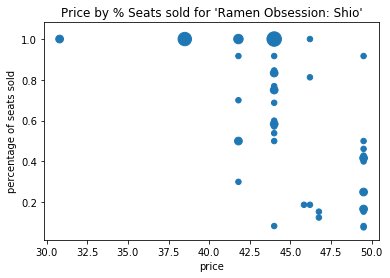

In [76]:
plt.scatter(yes['ticket_price'], yes['percentage_seats_sold'], s=yes['meal_id'] * 30)
plt.xlabel('price')
plt.ylabel('percentage of seats sold')
plt.title("Price by % Seats sold for 'Ramen Obsession: Shio'")
plt.show()

### Look at menus that have been served 3 times or fewer

In [77]:
meal_ids = [11400, 11393, 11380, 11359, 11353, 11349, 11335, 11333, 11329, 11326, 11308, 11291, 11287, 11275, 11259, 11253, 11251, 11225, 11217, 11188, 11159, 11151, 11136, 11131, 11110, 11106, 11102, 11081, 11076, 11073, 11070, 11056, 11046, 11041, 11037, 11021, 11019, 11010, 11008, 10991, 10985, 10981, 10961, 10959, 10954, 10948, 10938, 10908, 10906, 10904, 10881, 10871, 10851, 10837, 10833, 10829, 10827, 10825, 10810, 10799, 10793, 10789, 10781, 10760, 10755, 10746, 10711, 10709, 10674, 10653, 10637, 10631, 10618, 10609, 10605, 10589, 10575, 10561, 10558, 10496, 10494, 10488, 10477, 10442, 10434, 10392, 10377, 10343, 10337, 10327, 10317, 10313, 10309, 10288, 10259, 10249, 10196, 10122, 10096, 10078, 10073, 10066, 10037, 10027, 10023, 9999, 9987, 9974, 9965, 9960, 9957, 9955, 9946, 9919, 9913, 9883, 9863, 9861, 9853, 9843, 9838, 9832, 9821, 9809, 9805, 9787, 9776, 9768, 9764, 9760, 9756, 9746, 9743, 9691, 9689, 9679, 9651, 9649, 9647, 9623, 9618, 9576, 9550, 9542, 9538, 9530, 9523, 9486, 9482, 9472, 9470, 9450, 9444, 9404, 9388, 9384, 9380, 9365, 9346, 9344, 9330, 9290, 9280, 9251, 9247, 9245, 9241, 9211, 9209, 9207, 9203, 9201, 9168, 9163, 9144, 9128, 9108, 9103, 9097, 9069, 9067, 9051, 9049, 9039, 9035, 8999, 8984, 8982, 8908, 8869, 8859, 8851, 8819, 8809, 8807, 8769, 8754, 8752, 8748, 8734, 8718, 8710, 8696, 8683, 8660, 8657, 8655, 8634, 8629, 8613, 8611, 8601, 8589, 8581, 8567, 8561, 8559, 8511, 8505, 8503, 8500, 8498, 8455, 8453, 8430, 8426, 8424, 8395, 8382, 8349, 8332, 8298, 8294, 8281, 8277, 8267, 8252, 8250, 8245, 8237, 8215, 8195, 8163, 8130, 8121, 8118, 8111, 8101, 8096, 8094, 8092, 8087, 8080, 8060, 8048, 8046, 8040, 8030, 7990, 7962, 7947, 7937, 7935, 7919, 7917, 7915, 7896, 7874, 7843, 7841, 7796, 7794, 7789, 7787, 7754, 7728, 7726, 7673, 7669, 7653, 7646, 7642, 7629, 7617, 7607, 7605, 7603, 7599, 7595, 7589, 7575, 7563, 7559, 7557, 7543, 7527, 7520, 7514, 7512, 7506, 7500, 7463, 7445, 7440, 7438, 7436, 7427, 7399, 7388, 7293, 7285, 7253, 7249, 7243, 7237, 7225, 7220, 7218, 7206, 7189, 7179, 7130, 7128, 7126, 7116, 7080, 6999, 6997, 6992, 6978, 6973, 6967, 6946, 6936, 6900, 6895, 6875, 6871, 6869, 6805, 6793, 6785, 6779, 6777, 6769, 6757, 6755, 6747, 6745, 6743, 6735, 6733, 6731, 6729, 6723, 6721, 6715, 6710, 6702, 6700, 6698, 6688, 6676, 6666, 6658, 6656, 6581, 6579, 6577, 6567, 6553, 6527, 6488, 6486, 6468, 6463, 6461, 6455, 6443, 6441, 6439, 6429, 6414, 6410, 6406, 6402, 6398, 6382, 6370, 6368, 6362, 6348, 6346, 6323, 6317, 6309, 6279, 6259, 6251, 6237, 6235, 6233, 6227, 6223, 6221, 6209, 6193, 6178, 6176, 6156, 6148, 6138, 6126, 6113, 6071, 6069, 6060, 6044, 6042, 6032, 6024, 6020, 6014, 5976, 5972, 5964, 5958, 5950, 5914, 5892, 5886, 5884, 5880, 5876, 5870, 5860, 5844, 5830, 5814, 5812, 5800, 5796, 5762, 5752, 5661, 5647, 5602, 5600, 5593, 5591, 5556, 5550, 5546, 5544, 5534, 5532, 5522, 5516, 5512, 5508, 5502, 5482, 5480, 5476, 5472, 5466, 5458, 5454, 5438, 5436, 5387, 5383, 5381, 5373, 5371, 5357, 5355, 5349, 5343, 5339, 5335, 5333, 5331, 5329, 5319, 5284, 5282, 5276, 5274, 5262, 5260, 5258, 5250, 5226, 5222, 5164, 5160, 5158, 5150, 5148, 5132, 5126, 5110, 5102, 5096, 5094, 5086, 5084, 5082, 5080, 5068, 5062, 5052, 5046, 5044, 5036, 5031, 5023, 5021, 5012, 5004, 4994, 4992, 4988, 4986, 4984, 4980, 4976, 4970, 4968, 4946, 4942, 4938, 4934, 4930, 4922, 4889, 4871, 4867, 4863, 4861, 4853, 4847, 4845, 4833, 4825, 4823, 4813, 4811, 4805, 4791, 4789, 4787, 4754, 4748, 4744, 4740, 4731, 4727, 4725, 4703, 4701, 4697, 4695, 4691, 4666, 4649, 4647, 4645, 4639, 4633, 4627, 4625, 4623, 4617, 4605, 4601, 4589, 4581, 4575, 4570, 4554, 4552, 4546, 4540, 4531, 4506, 4502, 4488, 4474, 4466, 4464, 4443, 4429, 4407, 4395, 4368, 4360, 4354, 4346, 4330, 4324, 4319, 4315, 4313, 4311, 4307, 4301, 4290, 4288, 4286, 4280, 4272, 4268, 4256, 4250, 4244, 4236, 4230, 4224, 4220, 4212, 4202, 4200, 4192, 4190, 4163, 4159, 4139, 4135, 4131, 4123, 4111, 4107, 4099, 4095, 4093, 4089, 4077, 4071, 4057, 4055, 4051, 4041, 4035, 4033, 4031, 4023, 4021, 4019, 4013, 4005, 4003, 3995, 3993, 3932, 3924, 3912, 3910, 3906, 3904, 3896, 3889, 3883, 3881, 3877, 3873, 3867, 3863, 3859, 3851, 3849, 3845, 3841, 3821, 3809, 3800, 3786, 3784, 3762, 3760, 3752, 3748, 3746, 3740, 3736, 3708, 3706, 3704, 3676, 3660, 3656, 3654, 3650, 3640, 3638, 3630, 3628, 3605, 3601, 3597, 3595, 3581, 3561, 3551, 3543, 3538, 3528, 3524, 3520, 3510, 3504, 3500, 3498, 3496, 3492, 3478, 3472, 3466, 3464, 3450, 3426, 3412, 3410, 3399, 3395, 3393, 3388, 3366, 3362, 3352, 3348, 3346, 3336, 3330, 3322, 3320, 3308, 3306, 3298, 3296, 3286, 3277, 3275, 3271, 3263, 3251, 3245, 3243, 3235, 3227, 3223, 3215, 3207, 3199, 3191, 3183, 3181, 3175, 3167, 3161, 3157, 3153, 3151, 3137, 3133, 3129, 3113, 3111, 3109, 3101, 3084, 3072, 3066, 3064, 3056, 3046, 3038, 3034, 3031, 3029, 3027, 3025, 3013, 2989, 2983, 2981, 2967, 2926, 2920, 2916, 2914, 2890, 2886, 2882, 2880, 2872, 2848, 2837, 2826, 2824, 2818, 2814, 2800, 2794, 2788, 2758, 2756, 2750, 2740, 2738, 2733, 2723, 2719, 2717, 2709, 2707, 2701, 2699, 2697, 2666, 2658, 2638, 2625, 2609, 2606, 2600, 2594, 2579, 2575, 2561, 2545, 2543, 2541, 2537, 2535, 2529, 2503, 2499, 2473, 2471, 2469, 2439, 2427, 2425, 2423, 2393, 2388, 2375, 2363, 2357, 2349, 2347, 2333, 2331, 2319, 2299, 2283, 2263, 2261, 2247, 2231, 2225, 2214, 2210, 2196, 2184, 2178, 2170, 2160, 2158, 2146, 2138, 2132, 2124, 2112, 2110, 2108, 2094, 2092, 2050, 2034, 2032, 2008, 2006, 1996, 1994, 1992, 1964, 1958, 1954, 1925, 1917, 1913, 1907, 1905, 1901, 1899, 1897, 1893, 1891, 1885, 1871, 1860, 1858, 1856, 1840, 1836, 1802, 1774, 1754, 1744, 1722, 1720, 1700, 1696, 1688, 1656, 1654, 1646, 1632, 1628, 1626, 1624, 1617, 1612, 1606, 1594, 1588, 1537, 1533, 1519, 1515, 1502, 1499, 1497, 1465, 1459, 1453, 1451, 1449, 1445, 1441, 1436, 1422, 1416, 1384, 1382, 1370, 1350, 1348, 1340, 1320, 1318, 1310, 1308, 1299, 1295, 1285, 1275, 1250, 1240, 1230, 1228, 1201, 1195, 1171, 1169, 1165, 1159, 1157, 1151, 1135, 1131, 1127, 1115, 1105, 1103, 1092, 1066, 1056, 1042, 1040, 1038, 1014, 1012, 1006, 996, 994, 984, 956, 947, 943, 941, 931, 905, 897, 889, 863, 860, 832, 810, 806, 798, 796, 790, 786, 780, 776, 774, 770, 768, 756, 736, 728, 719, 717, 711, 707, 693, 689, 673, 671, 662, 660, 645, 640, 634, 619, 609, 601, 597, 591, 589, 583, 581, 557, 551, 539, 520, 516, 507, 491, 487, 455, 453, 451, 449, 443, 441, 409, 403, 401, 397, 389, 387, 385, 383, 356, 335, 314, 296, 284, 279, 277, 196, 190, 177, 165, 163, 155, 135, 129, 107, 97, 95, 93, 86, 82, 76, 74, 72, 56, 54, 52, 46, 37, 35, 33, 29, 27, 24, 22, 18, 9, 5, 11405, 11385, 11383, 11381, 11377, 11373, 11360, 11346, 11339, 11336, 11330, 11294, 11290, 11274, 11264, 11260, 11238, 11230, 11220, 11216, 11213, 11189, 11183, 11181, 11142, 11113, 11088, 11084, 11075, 11063, 11061, 11057, 11049, 11045, 11016, 11011, 11009, 11007, 10994, 10988, 10984, 10949, 10922, 10915, 10911, 10901, 10888, 10882, 10878, 10868, 10860, 10852, 10850, 10848, 10830, 10782, 10763, 10747, 10745, 10731, 10691, 10666, 10652, 10640, 10622, 10613, 10602, 10600, 10596, 10574, 10548, 10531, 10511, 10480, 10474, 10443, 10407, 10401, 10399, 10393, 10389, 10385, 10383, 10381, 10359, 10312, 10308, 10291, 10283, 10277, 10252, 10201, 10199, 10192, 10184, 10177, 10173, 10159, 10157, 10155, 10153, 10150, 10139, 10133, 10115, 10074, 10072, 10063, 10057, 10040, 10036, 10030, 10012, 10010, 9986, 9963, 9956, 9938, 9927, 9920, 9915, 9902, 9900, 9880, 9864, 9846, 9840, 9837, 9834, 9829, 9824, 9794, 9792, 9786, 9782, 9765, 9759, 9745, 9719, 9714, 9690, 9686, 9660, 9657, 9650, 9648, 9644, 9642, 9633, 9621, 9615, 9581, 9555, 9547, 9545, 9541, 9531, 9520, 9506, 9493, 9491, 9471, 9425, 9415, 9389, 9368, 9334, 9312, 9291, 9281, 9275, 9260, 9254, 9222, 9218, 9208, 9206, 9195, 9167, 9158, 9154, 9147, 9145, 9129, 9105, 9098, 9096, 9085, 9079, 9070, 9046, 9044, 9036, 9010, 8996, 8989, 8873, 8868, 8852, 8830, 8824, 8822, 8818, 8803, 8801, 8745, 8743, 8727, 8723, 8721, 8717, 8715, 8703, 8701, 8699, 8682, 8680, 8677, 8667, 8645, 8628, 8620, 8606, 8598, 8580, 8550, 8546, 8532, 8524, 8506, 8501, 8474, 8454, 8452, 8446, 8431, 8413, 8381, 8362, 8343, 8329, 8305, 8297, 8280, 8278, 8274, 8264, 8259, 8257, 8251, 8246, 8210, 8198, 8186, 8172, 8162, 8150, 8137, 8093, 8088, 8081, 8053, 8039, 7999, 7994, 7984, 7927, 7918, 7901, 7882, 7869, 7846, 7833, 7825, 7786, 7784, 7781, 7764, 7758, 7753, 7748, 7727, 7723, 7715, 7671, 7662, 7660, 7650, 7641, 7630, 7616, 7606, 7604, 7594, 7576, 7546, 7542, 7532, 7517, 7513, 7505, 7499, 7474, 7468, 7448, 7443, 7422, 7395, 7280, 7256, 7246, 7236, 7234, 7221, 7217, 7211, 7207, 7194, 7190, 7186, 7166, 7164, 7162, 7160, 7152, 7148, 7143, 7127, 7109, 7101, 7085, 7081, 7068, 7064, 7002, 6989, 6985, 6979, 6972, 6970, 6968, 6953, 6901, 6894, 6866, 6834, 6828, 6794, 6792, 6790, 6788, 6786, 6784, 6768, 6756, 6752, 6750, 6742, 6697, 6695, 6691, 6685, 6675, 6659, 6657, 6655, 6653, 6651, 6643, 6619, 6612, 6600, 6598, 6594, 6586, 6582, 6578, 6568, 6562, 6558, 6548, 6479, 6417, 6415, 6407, 6405, 6403, 6387, 6369, 6363, 6322, 6312, 6292, 6288, 6272, 6240, 6234, 6230, 6228, 6226, 6179, 6171, 6165, 6163, 6155, 6145, 6137, 6133, 6123, 6116, 6079, 6076, 6072, 6059, 6053, 6045, 6041, 6039, 6031, 6027, 6023, 6019, 6013, 5981, 5977, 5965, 5959, 5929, 5923, 5915, 5913, 5909, 5893, 5891, 5871, 5861, 5859, 5835, 5819, 5809, 5803, 5797, 5785, 5777, 5773, 5729, 5698, 5696, 5676, 5668, 5660, 5650, 5646, 5605, 5577, 5555, 5543, 5525, 5519, 5515, 5495, 5493, 5481, 5479, 5475, 5463, 5461, 5457, 5447, 5441, 5439, 5437, 5435, 5433, 5431, 5425, 5421, 5413, 5405, 5397, 5376, 5360, 5358, 5336, 5315, 5308, 5275, 5251, 5245, 5241, 5219, 5213, 5211, 5207, 5195, 5191, 5163, 5155, 5135, 5131, 5129, 5127, 5111, 5105, 5101, 5099, 5095, 5089, 5087, 5085, 5073, 5071, 5063, 5055, 5045, 5043, 5037, 5017, 5009, 4999, 4987, 4985, 4971, 4959, 4949, 4947, 4929, 4925, 4923, 4919, 4913, 4890, 4888, 4880, 4874, 4870, 4866, 4848, 4846, 4842, 4838, 4832, 4830, 4822, 4810, 4808, 4800, 4753, 4747, 4741, 4736, 4732, 4726, 4724, 4720, 4718, 4706, 4698, 4696, 4686, 4673, 4671, 4669, 4654, 4652, 4644, 4632, 4630, 4624, 4612, 4610, 4606, 4600, 4594, 4590, 4588, 4584, 4582, 4580, 4572, 4567, 4563, 4555, 4547, 4539, 4524, 4521, 4513, 4501, 4497, 4481, 4477, 4475, 4473, 4459, 4452, 4450, 4448, 4442, 4438, 4436, 4388, 4377, 4369, 4363, 4357, 4351, 4337, 4331, 4329, 4327, 4325, 4323, 4316, 4314, 4310, 4302, 4285, 4283, 4275, 4271, 4269, 4259, 4255, 4249, 4245, 4243, 4235, 4233, 4231, 4219, 4211, 4201, 4199, 4191, 4189, 4176, 4166, 4164, 4140, 4134, 4128, 4124, 4114, 4108, 4106, 4088, 4080, 4074, 4072, 4058, 4046, 4038, 4026, 4020, 4008, 4006, 3998, 3974, 3970, 3965, 3955, 3943, 3941, 3933, 3923, 3905, 3884, 3880, 3878, 3876, 3872, 3870, 3860, 3854, 3848, 3846, 3842, 3830, 3818, 3808, 3801, 3787, 3785, 3781, 3779, 3771, 3759, 3749, 3745, 3739, 3731, 3729, 3719, 3717, 3715, 3713, 3711, 3701, 3687, 3685, 3675, 3671, 3667, 3665, 3659, 3645, 3641, 3631, 3623, 3619, 3608, 3594, 3584, 3582, 3572, 3568, 3564, 3562, 3552, 3550, 3544, 3525, 3523, 3517, 3511, 3507, 3505, 3501, 3497, 3495, 3487, 3469, 3467, 3465, 3443, 3433, 3409, 3407, 3404, 3394, 3392, 3390, 3383, 3377, 3371, 3367, 3359, 3353, 3349, 3333, 3331, 3311, 3309, 3297, 3295, 3291, 3285, 3278, 3260, 3258, 3254, 3246, 3240, 3238, 3226, 3224, 3222, 3220, 3218, 3204, 3200, 3196, 3184, 3182, 3180, 3166, 3164, 3160, 3152, 3150, 3146, 3144, 3140, 3132, 3114, 3071, 3069, 3067, 3063, 3059, 3045, 3039, 3037, 3033, 3030, 3026, 3020, 3016, 3010, 3008, 3006, 3004, 2990, 2988, 2984, 2982, 2978, 2970, 2960, 2956, 2948, 2942, 2925, 2919, 2913, 2899, 2897, 2893, 2881, 2879, 2873, 2861, 2855, 2853, 2836, 2825, 2821, 2819, 2815, 2811, 2809, 2799, 2797, 2767, 2765, 2759, 2753, 2743, 2737, 2730, 2708, 2702, 2700, 2688, 2684, 2667, 2665, 2661, 2649, 2636, 2634, 2626, 2620, 2618, 2612, 2572, 2554, 2550, 2548, 2508, 2484, 2482, 2474, 2466, 2448, 2438, 2436, 2424, 2422, 2410, 2384, 2376, 2362, 2354, 2346, 2344, 2342, 2336, 2330, 2326, 2296, 2291, 2287, 2257, 2244, 2230, 2224, 2222, 2218, 2213, 2197, 2193, 2189, 2183, 2167, 2159, 2153, 2151, 2133, 2131, 2123, 2119, 2111, 2109, 2107, 2095, 2091, 2087, 2071, 2069, 2067, 2055, 2049, 2047, 2043, 2039, 2037, 2035, 2023, 2019, 2009, 1999, 1995, 1979, 1971, 1969, 1951, 1949, 1945, 1924, 1918, 1914, 1912, 1910, 1904, 1894, 1888, 1876, 1849, 1845, 1843, 1837, 1801, 1795, 1787, 1785, 1781, 1769, 1765, 1753, 1743, 1737, 1735, 1715, 1711, 1709, 1705, 1697, 1681, 1679, 1673, 1667, 1657, 1653, 1649, 1643, 1633, 1595, 1585, 1583, 1581, 1569, 1561, 1548, 1534, 1494, 1488, 1464, 1452, 1437, 1433, 1429, 1421, 1417, 1411, 1409, 1401, 1385, 1367, 1365, 1313, 1307, 1300, 1282, 1272, 1253, 1249, 1245, 1235, 1176, 1170, 1168, 1160, 1144, 1122, 1118, 1116, 1114, 1112, 1085, 1083, 1081, 1073, 1071, 1069, 1064, 1059, 1057, 1055, 1045, 1021, 1019, 995, 991, 980, 955, 942, 940, 932, 930, 926, 922, 920, 916, 894, 884, 878, 874, 851, 835, 827, 819, 815, 813, 811, 809, 807, 805, 803, 799, 791, 783, 781, 775, 769, 759, 757, 755, 735, 725, 723, 716, 708, 694, 684, 676, 672, 668, 666, 626, 622, 618, 616, 604, 600, 598, 592, 538, 534, 512, 508, 475, 467, 456, 454, 414, 410, 406, 404, 398, 396, 394, 392, 374, 365, 359, 350, 333, 328, 318, 306, 299, 297, 278, 247, 213, 202, 197, 180, 171, 150, 146, 131, 121, 116, 94, 89, 87, 85, 83, 81, 57, 42, 39, 28, 25, 23, 19, 4, 2, 11397, 11395, 11390, 11384, 11378, 11376, 11363, 11361, 11347, 11342, 11331, 11322, 11320, 11318, 11316, 11282, 11280, 11271, 11269, 11265, 11263, 11255, 11221, 11192, 11157, 11153, 11145, 11138, 11128, 11126, 11100, 11097, 11095, 11093, 11078, 11068, 11062, 11058, 11054, 11050, 11044, 11032, 11030, 11012, 10993, 10983, 10946, 10923, 10912, 10910, 10883, 10877, 10873, 10859, 10855, 10835, 10813, 10802, 10791, 10783, 10779, 10777, 10752, 10738, 10732, 10726, 10724, 10705, 10698, 10690, 10676, 10670, 10635, 10616, 10612, 10565, 10554, 10552, 10530, 10516, 10514, 10483, 10481, 10479, 10436, 10430, 10425, 10423, 10411, 10408, 10394, 10382, 10360, 10321, 10307, 10296, 10286, 10284, 10280, 10268, 10212, 10176, 10174, 10151, 10149, 10140, 10126, 10116, 10111, 10109, 10107, 10094, 10092, 10084, 10080, 10075, 10071, 10068, 10050, 10035, 10025, 10021, 10011, 9989, 9970, 9962, 9937, 9925, 9921, 9901, 9872, 9868, 9851, 9828, 9811, 9801, 9799, 9795, 9791, 9781, 9766, 9762, 9758, 9731, 9704, 9702, 9698, 9696, 9694, 9687, 9658, 9632, 9620, 9613, 9611, 9578, 9564, 9558, 9556, 9536, 9519, 9511, 9505, 9503, 9497, 9490, 9474, 9442, 9431, 9424, 9416, 9412, 9378, 9359, 9341, 9335, 9311, 9309, 9307, 9305, 9292, 9268, 9261, 9257, 9255, 9249, 9243, 9228, 9219, 9198, 9190, 9180, 9161, 9148, 9146, 9124, 9118, 9106, 9101, 9094, 9092, 9088, 9086, 9084, 9080, 9075, 9065, 9061, 9045, 9011, 9009, 8995, 8857, 8844, 8827, 8825, 8821, 8815, 8761, 8746, 8742, 8716, 8714, 8708, 8702, 8698, 8685, 8681, 8664, 8625, 8621, 8603, 8587, 8577, 8563, 8533, 8527, 8525, 8513, 8507, 8492, 8478, 8475, 8451, 8449, 8414, 8399, 8384, 8328, 8324, 8318, 8296, 8290, 8285, 8279, 8269, 8263, 8256, 8231, 8201, 8197, 8187, 8185, 8177, 8173, 8170, 8167, 8149, 8138, 8134, 8104, 8089, 8071, 8064, 8056, 8054, 8052, 8050, 8000, 7998, 7995, 7985, 7968, 7964, 7959, 7957, 7951, 7945, 7932, 7923, 7904, 7878, 7872, 7870, 7855, 7851, 7845, 7824, 7792, 7783, 7780, 7769, 7757, 7730, 7724, 7719, 7676, 7665, 7659, 7651, 7634, 7615, 7609, 7597, 7593, 7565, 7545, 7531, 7518, 7516, 7510, 7498, 7469, 7465, 7447, 7434, 7421, 7406, 7359, 7291, 7289, 7287, 7275, 7257, 7241, 7235, 7233, 7216, 7210, 7193, 7185, 7177, 7173, 7165, 7161, 7159, 7157, 7149, 7144, 7138, 7132, 7114, 7112, 7108, 7106, 7102, 7100, 7094, 7092, 7090, 7082, 7065, 7063, 7058, 7028, 7019, 7015, 7011, 7003, 6990, 6971, 6948, 6942, 6940, 6930, 6920, 6918, 6910, 6908, 6906, 6902, 6893, 6873, 6867, 6831, 6820, 6791, 6789, 6783, 6771, 6761, 6753, 6751, 6739, 6737, 6727, 6719, 6712, 6682, 6670, 6620, 6614, 6545, 6533, 6484, 6476, 6457, 6435, 6408, 6400, 6396, 6388, 6386, 6372, 6358, 6356, 6350, 6344, 6336, 6311, 6291, 6289, 6281, 6261, 6255, 6217, 6215, 6201, 6188, 6186, 6172, 6170, 6166, 6162, 6152, 6150, 6132, 6124, 6122, 6117, 6108, 6094, 6090, 6080, 6063, 6058, 6056, 6054, 6040, 6038, 6036, 6012, 5982, 5974, 5966, 5956, 5954, 5952, 5946, 5924, 5922, 5912, 5908, 5904, 5890, 5888, 5878, 5846, 5834, 5828, 5810, 5802, 5798, 5782, 5776, 5772, 5770, 5764, 5748, 5728, 5699, 5697, 5693, 5689, 5683, 5675, 5671, 5659, 5653, 5649, 5582, 5580, 5578, 5562, 5560, 5558, 5536, 5494, 5484, 5470, 5464, 5456, 5442, 5440, 5434, 5432, 5430, 5428, 5424, 5422, 5418, 5414, 5377, 5369, 5361, 5327, 5316, 5314, 5264, 5254, 5246, 5244, 5242, 5238, 5234, 5224, 5218, 5212, 5196, 5192, 5168, 5156, 5154, 5152, 5140, 5138, 5136, 5128, 5112, 5108, 5106, 5104, 5056, 5054, 5014, 5006, 4996, 4982, 4972, 4966, 4964, 4954, 4950, 4936, 4932, 4928, 4926, 4924, 4920, 4898, 4893, 4891, 4887, 4883, 4881, 4877, 4855, 4851, 4843, 4841, 4839, 4837, 4835, 4831, 4829, 4821, 4809, 4799, 4793, 4742, 4729, 4723, 4721, 4709, 4705, 4699, 4693, 4687, 4676, 4670, 4663, 4657, 4655, 4653, 4651, 4643, 4641, 4637, 4631, 4629, 4621, 4619, 4615, 4613, 4609, 4607, 4603, 4595, 4587, 4585, 4583, 4566, 4564, 4548, 4544, 4525, 4523, 4498, 4486, 4478, 4476, 4451, 4439, 4391, 4389, 4387, 4382, 4378, 4370, 4362, 4348, 4321, 4309, 4303, 4292, 4282, 4278, 4276, 4270, 4254, 4252, 4248, 4246, 4242, 4240, 4238, 4234, 4232, 4226, 4216, 4214, 4208, 4206, 4196, 4194, 4188, 4173, 4171, 4169, 4165, 4161, 4157, 4145, 4137, 4133, 4127, 4125, 4119, 4113, 4105, 4091, 4081, 4079, 4065, 4063, 4059, 4053, 4049, 4039, 4027, 4025, 4017, 4009, 4007, 4001, 3997, 3986, 3981, 3979, 3977, 3971, 3966, 3962, 3960, 3958, 3952, 3950, 3944, 3938, 3936, 3930, 3926, 3920, 3914, 3879, 3865, 3855, 3853, 3843, 3823, 3817, 3802, 3798, 3794, 3792, 3788, 3768, 3766, 3758, 3756, 3726, 3696, 3678, 3674, 3672, 3666, 3662, 3646, 3636, 3632, 3620, 3618, 3612, 3585, 3583, 3576, 3574, 3571, 3569, 3567, 3565, 3563, 3532, 3518, 3494, 3484, 3482, 3474, 3470, 3448, 3438, 3424, 3408, 3403, 3391, 3384, 3376, 3374, 3364, 3356, 3350, 3340, 3334, 3314, 3304, 3284, 3281, 3267, 3265, 3255, 3253, 3229, 3225, 3221, 3217, 3201, 3187, 3185, 3179, 3177, 3143, 3141, 3139, 3123, 3121, 3119, 3105, 3103, 3097, 3088, 3086, 3082, 3070, 3068, 3058, 3054, 3052, 3048, 3044, 3042, 3017, 3011, 3005, 2993, 2987, 2969, 2965, 2963, 2957, 2955, 2953, 2949, 2945, 2941, 2939, 2937, 2935, 2931, 2929, 2910, 2908, 2900, 2894, 2892, 2878, 2870, 2866, 2864, 2854, 2852, 2841, 2835, 2820, 2816, 2810, 2804, 2780, 2778, 2776, 2774, 2760, 2752, 2736, 2731, 2705, 2703, 2687, 2681, 2679, 2674, 2670, 2664, 2650, 2648, 2644, 2635, 2633, 2619, 2617, 2615, 2611, 2588, 2577, 2571, 2539, 2533, 2525, 2521, 2515, 2511, 2509, 2493, 2491, 2489, 2477, 2467, 2463, 2457, 2453, 2451, 2447, 2445, 2437, 2421, 2417, 2413, 2411, 2401, 2397, 2383, 2371, 2367, 2365, 2361, 2355, 2345, 2337, 2327, 2307, 2295, 2277, 2275, 2269, 2259, 2256, 2254, 2252, 2249, 2245, 2237, 2235, 2229, 2192, 2186, 2176, 2166, 2164, 2154, 2150, 2148, 2130, 2120, 2106, 2104, 2102, 2088, 2086, 2072, 2056, 2054, 2052, 2044, 2040, 2024, 2018, 2004, 1998, 1986, 1982, 1976, 1968, 1960, 1946, 1941, 1937, 1929, 1919, 1915, 1903, 1895, 1875, 1864, 1852, 1848, 1844, 1842, 1838, 1806, 1800, 1794, 1792, 1780, 1776, 1772, 1762, 1750, 1704, 1698, 1694, 1680, 1674, 1670, 1666, 1652, 1642, 1634, 1619, 1608, 1600, 1586, 1574, 1570, 1562, 1551, 1549, 1543, 1541, 1531, 1523, 1513, 1508, 1489, 1487, 1485, 1469, 1467, 1432, 1408, 1404, 1402, 1400, 1388, 1386, 1380, 1372, 1368, 1334, 1324, 1322, 1316, 1303, 1271, 1269, 1267, 1261, 1256, 1248, 1218, 1214, 1212, 1207, 1205, 1181, 1173, 1153, 1145, 1125, 1109, 1101, 1090, 1084, 1082, 1062, 1054, 1050, 1032, 1018, 1010, 1002, 1000, 986, 968, 966, 961, 950, 939, 929, 919, 911, 903, 895, 893, 879, 877, 867, 850, 838, 836, 828, 820, 816, 804, 792, 778, 762, 738, 734, 732, 724, 721, 703, 691, 687, 679, 665, 615, 585, 567, 563, 561, 543, 535, 527, 509, 504, 498, 493, 484, 480, 478, 472, 457, 415, 411, 405, 399, 393, 371, 360, 358, 352, 337, 332, 324, 316, 290, 287, 281, 256, 250, 245, 240, 220, 201, 198, 192, 188, 186, 175, 170, 161, 153, 149, 145, 137, 118, 109, 103, 99, 91, 88, 84, 78, 58, 50, 43, 31, 20, 11, 3, 11407, 11396, 11394, 11391, 11379, 11369, 11365, 11362, 11358, 11350, 11341, 11334, 11332, 11321, 11319, 11309, 11307, 11288, 11283, 11281, 11279, 11276, 11270, 11266, 11256, 11252, 11224, 11222, 11218, 11210, 11191, 11167, 11164, 11158, 11144, 11137, 11135, 11132, 11130, 11127, 11111, 11107, 11105, 11103, 11099, 11059, 11055, 11053, 11051, 11042, 11020, 11018, 10996, 10990, 10978, 10958, 10941, 10909, 10907, 10893, 10886, 10880, 10864, 10862, 10834, 10832, 10811, 10805, 10796, 10790, 10787, 10784, 10780, 10766, 10761, 10758, 10737, 10735, 10714, 10706, 10702, 10679, 10675, 10671, 10648, 10646, 10638, 10617, 10615, 10594, 10566, 10564, 10515, 10478, 10476, 10441, 10437, 10424, 10410, 10405, 10387, 10364, 10340, 10330, 10320, 10310, 10297, 10289, 10275, 10273, 10211, 10209, 10195, 10181, 10167, 10148, 10123, 10117, 10095, 10090, 10083, 10077, 10042, 10034, 10026, 10022, 10002, 10000, 9978, 9973, 9961, 9953, 9947, 9924, 9917, 9895, 9884, 9871, 9862, 9858, 9850, 9842, 9827, 9780, 9761, 9757, 9742, 9732, 9717, 9703, 9701, 9699, 9688, 9684, 9680, 9653, 9638, 9631, 9619, 9612, 9596, 9588, 9584, 9579, 9567, 9533, 9518, 9489, 9469, 9463, 9459, 9419, 9417, 9409, 9407, 9385, 9383, 9379, 9377, 9373, 9358, 9340, 9320, 9304, 9293, 9272, 9264, 9256, 9252, 9250, 9246, 9229, 9204, 9199, 9191, 9151, 9127, 9125, 9093, 9087, 9081, 9076, 9074, 9068, 9066, 9062, 9052, 9050, 9048, 9040, 9016, 9014, 9000, 8991, 8985, 8983, 8940, 8913, 8906, 8870, 8860, 8850, 8816, 8808, 8755, 8749, 8741, 8707, 8684, 8665, 8642, 8637, 8626, 8618, 8614, 8610, 8602, 8576, 8536, 8528, 8526, 8514, 8512, 8450, 8427, 8425, 8398, 8394, 8385, 8376, 8364, 8352, 8309, 8303, 8291, 8289, 8286, 8271, 8268, 8248, 8244, 8242, 8238, 8226, 8216, 8196, 8194, 8164, 8152, 8133, 8122, 8120, 8095, 8072, 8067, 8065, 8063, 8059, 8055, 8045, 8001, 7969, 7960, 7952, 7950, 7929, 7922, 7920, 7905, 7903, 7889, 7879, 7877, 7873, 7871, 7854, 7838, 7836, 7816, 7791, 7731, 7720, 7683, 7681, 7668, 7656, 7654, 7652, 7614, 7610, 7608, 7578, 7570, 7511, 7507, 7476, 7472, 7466, 7464, 7446, 7441, 7420, 7391, 7306, 7294, 7272, 7252, 7248, 7242, 7192, 7184, 7176, 7174, 7172, 7158, 7137, 7135, 7133, 7131, 7129, 7123, 7119, 7117, 7099, 7095, 7089, 7087, 7062, 7033, 7020, 7018, 7004, 6963, 6957, 6955, 6947, 6927, 6921, 6919, 6905, 6903, 6876, 6874, 6846, 6844, 6840, 6806, 6804, 6760, 6746, 6744, 6740, 6730, 6728, 6724, 6718, 6709, 6703, 6699, 6689, 6625, 6623, 6596, 6588, 6580, 6576, 6572, 6552, 6550, 6546, 6542, 6532, 6526, 6524, 6522, 6462, 6454, 6442, 6434, 6426, 6401, 6395, 6379, 6377, 6371, 6367, 6361, 6335, 6329, 6316, 6314, 6278, 6246, 6238, 6236, 6220, 6216, 6210, 6208, 6200, 6198, 6196, 6194, 6177, 6149, 6147, 6125, 6093, 6070, 6064, 6061, 6057, 6037, 6035, 6029, 6021, 5975, 5973, 5951, 5947, 5945, 5937, 5925, 5911, 5903, 5885, 5877, 5875, 5873, 5845, 5841, 5837, 5831, 5829, 5799, 5781, 5779, 5769, 5763, 5753, 5700, 5694, 5674, 5672, 5670, 5652, 5628, 5624, 5612, 5601, 5599, 5592, 5588, 5583, 5581, 5557, 5547, 5533, 5517, 5513, 5497, 5485, 5483, 5477, 5471, 5445, 5443, 5374, 5372, 5370, 5368, 5362, 5348, 5344, 5342, 5340, 5332, 5291, 5285, 5283, 5261, 5259, 5237, 5233, 5209, 5199, 5189, 5181, 5177, 5167, 5161, 5159, 5151, 5147, 5139, 5123, 5119, 5117, 5109, 5083, 5069, 5033, 5030, 5028, 5024, 5015, 5013, 5003, 5001, 4993, 4991, 4983, 4981, 4977, 4967, 4965, 4963, 4957, 4955, 4941, 4939, 4933, 4931, 4927, 4915, 4899, 4897, 4894, 4892, 4884, 4882, 4872, 4868, 4864, 4858, 4856, 4852, 4836, 4834, 4826, 4818, 4794, 4792, 4788, 4743, 4702, 4694, 4692, 4678, 4660, 4658, 4656, 4642, 4640, 4626, 4622, 4620, 4616, 4608, 4604, 4596, 4592, 4586, 4557, 4553, 4551, 4549, 4530, 4509, 4503, 4479, 4471, 4469, 4455, 4440, 4432, 4412, 4410, 4381, 4379, 4373, 4361, 4359, 4355, 4353, 4349, 4347, 4345, 4333, 4320, 4308, 4300, 4287, 4281, 4279, 4273, 4265, 4263, 4261, 4251, 4229, 4227, 4207, 4179, 4172, 4138, 4132, 4118, 4112, 4104, 4098, 4096, 4092, 4086, 4084, 4082, 4078, 4076, 4066, 4052, 4048, 4042, 4040, 4032, 4022, 4012, 4010, 3996, 3994, 3978, 3976, 3961, 3949, 3945, 3939, 3927, 3913, 3911, 3907, 3901, 3899, 3895, 3893, 3874, 3864, 3862, 3858, 3850, 3844, 3840, 3820, 3816, 3814, 3812, 3810, 3804, 3799, 3793, 3769, 3767, 3763, 3761, 3757, 3753, 3747, 3727, 3725, 3709, 3697, 3679, 3677, 3655, 3639, 3635, 3617, 3606, 3596, 3588, 3586, 3575, 3570, 3560, 3554, 3542, 3539, 3527, 3513, 3493, 3489, 3483, 3471, 3463, 3457, 3453, 3451, 3445, 3441, 3439, 3429, 3415, 3411, 3402, 3396, 3387, 3385, 3379, 3375, 3365, 3363, 3355, 3351, 3339, 3337, 3335, 3329, 3327, 3323, 3319, 3315, 3313, 3305, 3299, 3287, 3270, 3266, 3262, 3250, 3232, 3212, 3210, 3206, 3192, 3186, 3178, 3168, 3162, 3158, 3156, 3154, 3142, 3136, 3108, 3104, 3100, 3093, 3091, 3085, 3073, 3047, 3043, 3041, 3024, 3022, 3002, 2966, 2958, 2954, 2950, 2940, 2938, 2921, 2915, 2907, 2905, 2887, 2885, 2833, 2829, 2805, 2789, 2787, 2781, 2773, 2763, 2761, 2751, 2749, 2747, 2745, 2739, 2720, 2718, 2716, 2710, 2706, 2704, 2692, 2690, 2682, 2676, 2673, 2671, 2669, 2655, 2643, 2632, 2630, 2624, 2614, 2605, 2595, 2593, 2589, 2586, 2560, 2558, 2552, 2546, 2544, 2534, 2526, 2524, 2522, 2520, 2518, 2516, 2514, 2510, 2502, 2498, 2492, 2488, 2478, 2468, 2458, 2456, 2454, 2444, 2434, 2432, 2420, 2414, 2412, 2404, 2402, 2392, 2370, 2368, 2356, 2352, 2340, 2338, 2322, 2302, 2300, 2293, 2282, 2262, 2251, 2246, 2242, 2226, 2181, 2155, 2145, 2143, 2141, 2129, 2093, 2085, 2083, 2059, 2053, 2045, 2033, 2029, 2027, 2025, 2007, 2001, 1997, 1993, 1967, 1965, 1961, 1959, 1947, 1940, 1932, 1930, 1928, 1892, 1886, 1867, 1861, 1857, 1851, 1841, 1835, 1799, 1793, 1779, 1757, 1751, 1747, 1741, 1727, 1719, 1699, 1695, 1693, 1691, 1689, 1685, 1683, 1665, 1663, 1655, 1645, 1641, 1637, 1627, 1625, 1616, 1607, 1601, 1591, 1587, 1577, 1565, 1563, 1558, 1540, 1538, 1536, 1528, 1524, 1503, 1492, 1486, 1468, 1454, 1450, 1439, 1435, 1425, 1423, 1405, 1395, 1391, 1389, 1383, 1377, 1359, 1357, 1351, 1345, 1341, 1329, 1317, 1294, 1278, 1274, 1262, 1215, 1204, 1196, 1172, 1166, 1164, 1150, 1132, 1128, 1126, 1124, 1110, 1102, 1098, 1094, 1089, 1077, 1051, 1049, 1047, 1031, 1013, 1005, 957, 934, 914, 902, 892, 888, 876, 862, 859, 843, 821, 797, 785, 779, 773, 765, 741, 737, 733, 720, 718, 714, 702, 661, 656, 641, 628, 624, 620, 610, 596, 594, 590, 584, 574, 568, 566, 560, 556, 552, 540, 536, 528, 517, 503, 490, 488, 486, 483, 479, 477, 452, 450, 446, 444, 435, 412, 384, 348, 325, 320, 309, 302, 288, 286, 283, 275, 242, 221, 219, 209, 199, 193, 189, 178, 173, 169, 154, 144, 136, 128, 126, 110, 100, 98, 96, 92, 79, 77, 71, 69, 61, 55, 51, 49, 36, 34, 32, 30, 21, 8]

In [79]:
nah = something[something['meal_id'].isin(meal_ids)].groupby(['ticket_price', 'percentage_seats_sold']).count()['meal_id'].reset_index()

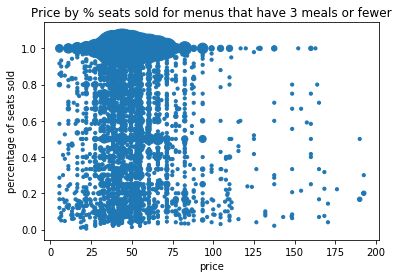

In [83]:
plt.scatter(nah['ticket_price'], nah['percentage_seats_sold'], s=nah['meal_id'] * 10)
plt.xlabel('price')
plt.ylabel('percentage of seats sold')
plt.title("Price by % seats sold for menus that have 3 meals or fewer")
plt.show()

In [84]:
meal_ids_2 = [11405, 11383, 11373, 11360, 11346, 11339, 11336, 11330, 11294, 11290, 11274, 11260, 11238, 11230, 11220, 11216, 11189, 11183, 11181, 11113, 11088, 11084, 11075, 11063, 11061, 11049, 11011, 11009, 11007, 10994, 10988, 10949, 10915, 10901, 10888, 10878, 10868, 10860, 10852, 10850, 10731, 10666, 10652, 10640, 10622, 10613, 10602, 10600, 10596, 10574, 10548, 10511, 10480, 10474, 10443, 10401, 10399, 10389, 10381, 10308, 10291, 10283, 10252, 10184, 10173, 10159, 10157, 10150, 10133, 10115, 10072, 10063, 10057, 10040, 10012, 9986, 9963, 9956, 9938, 9927, 9920, 9915, 9902, 9900, 9880, 9864, 9840, 9837, 9834, 9794, 9792, 9786, 9782, 9765, 9759, 9745, 9714, 9690, 9660, 9650, 9644, 9642, 9633, 9621, 9581, 9555, 9547, 9541, 9531, 9520, 9493, 9491, 9471, 9425, 9368, 9291, 9281, 9275, 9254, 9218, 9195, 9167, 9158, 9154, 9147, 9129, 9105, 9098, 9096, 9085, 9079, 9070, 9046, 9044, 9036, 8989, 8873, 8868, 8830, 8824, 8822, 8803, 8801, 8727, 8723, 8721, 8703, 8701, 8699, 8682, 8677, 8667, 8645, 8628, 8620, 8606, 8598, 8550, 8546, 8532, 8501, 8446, 8431, 8343, 8329, 8278, 8274, 8264, 8251, 8246, 8210, 8198, 8186, 8172, 8150, 8137, 8093, 8081, 8053, 8039, 7994, 7984, 7918, 7901, 7869, 7846, 7825, 7786, 7764, 7758, 7753, 7748, 7671, 7662, 7660, 7650, 7641, 7630, 7616, 7606, 7604, 7594, 7576, 7546, 7542, 7517, 7505, 7468, 7443, 7395, 7246, 7236, 7221, 7217, 7194, 7190, 7186, 7166, 7164, 7160, 7152, 7148, 7127, 7085, 7068, 7064, 7002, 6989, 6985, 6972, 6970, 6894, 6866, 6834, 6828, 6794, 6792, 6788, 6784, 6756, 6752, 6691, 6685, 6659, 6657, 6655, 6612, 6600, 6598, 6594, 6586, 6578, 6568, 6562, 6415, 6407, 6405, 6387, 6363, 6322, 6312, 6288, 6272, 6240, 6230, 6171, 6165, 6163, 6155, 6145, 6137, 6133, 6123, 6076, 6053, 6031, 6027, 6023, 6013, 5977, 5959, 5929, 5923, 5915, 5913, 5893, 5859, 5819, 5809, 5797, 5785, 5777, 5773, 5729, 5698, 5696, 5676, 5668, 5660, 5650, 5646, 5605, 5543, 5525, 5519, 5515, 5495, 5475, 5463, 5461, 5457, 5447, 5437, 5435, 5431, 5425, 5421, 5405, 5358, 5336, 5275, 5251, 5245, 5241, 5219, 5211, 5207, 5195, 5163, 5155, 5131, 5129, 5111, 5105, 5101, 5099, 5095, 5087, 5085, 5073, 5071, 5063, 5055, 5045, 5043, 5037, 5017, 5009, 4987, 4985, 4971, 4949, 4947, 4929, 4925, 4923, 4913, 4880, 4874, 4870, 4866, 4848, 4846, 4842, 4838, 4832, 4830, 4822, 4810, 4808, 4753, 4747, 4741, 4726, 4724, 4720, 4718, 4706, 4698, 4673, 4671, 4669, 4644, 4632, 4630, 4624, 4612, 4610, 4606, 4600, 4594, 4590, 4588, 4584, 4582, 4580, 4567, 4563, 4555, 4547, 4539, 4521, 4513, 4501, 4481, 4477, 4473, 4459, 4452, 4450, 4448, 4442, 4369, 4363, 4357, 4351, 4337, 4331, 4329, 4327, 4325, 4323, 4316, 4314, 4310, 4285, 4283, 4275, 4271, 4259, 4255, 4249, 4245, 4235, 4233, 4231, 4219, 4211, 4201, 4199, 4191, 4189, 4176, 4166, 4164, 4140, 4134, 4128, 4124, 4114, 4108, 4106, 4088, 4080, 4074, 4072, 4026, 4020, 4008, 4006, 3998, 3965, 3955, 3943, 3941, 3933, 3905, 3884, 3880, 3878, 3876, 3872, 3870, 3860, 3854, 3848, 3846, 3842, 3830, 3808, 3801, 3787, 3785, 3781, 3779, 3771, 3759, 3749, 3745, 3739, 3731, 3729, 3719, 3717, 3715, 3713, 3711, 3701, 3687, 3675, 3671, 3667, 3659, 3645, 3631, 3619, 3608, 3594, 3584, 3568, 3564, 3562, 3552, 3550, 3544, 3525, 3523, 3517, 3511, 3507, 3505, 3495, 3487, 3469, 3467, 3465, 3443, 3433, 3409, 3407, 3394, 3392, 3383, 3377, 3371, 3367, 3359, 3349, 3331, 3311, 3309, 3297, 3295, 3291, 3285, 3278, 3260, 3254, 3246, 3240, 3226, 3224, 3222, 3220, 3218, 3204, 3200, 3196, 3184, 3182, 3180, 3166, 3160, 3150, 3146, 3140, 3132, 3114, 3069, 3067, 3059, 3045, 3039, 3037, 3033, 3030, 3026, 3016, 3010, 3008, 2990, 2988, 2984, 2978, 2970, 2960, 2956, 2948, 2925, 2919, 2913, 2897, 2879, 2873, 2861, 2855, 2836, 2825, 2821, 2819, 2815, 2811, 2809, 2799, 2797, 2765, 2759, 2753, 2743, 2737, 2730, 2708, 2702, 2700, 2688, 2684, 2667, 2665, 2661, 2649, 2636, 2634, 2626, 2612, 2572, 2554, 2550, 2548, 2508, 2484, 2482, 2474, 2466, 2448, 2438, 2436, 2424, 2410, 2384, 2376, 2362, 2354, 2346, 2344, 2342, 2336, 2330, 2326, 2296, 2291, 2287, 2257, 2244, 2230, 2224, 2222, 2218, 2197, 2193, 2189, 2183, 2167, 2159, 2153, 2133, 2131, 2123, 2119, 2111, 2109, 2107, 2095, 2091, 2087, 2069, 2067, 2055, 2049, 2047, 2043, 2039, 2037, 2035, 2019, 2009, 1999, 1979, 1971, 1969, 1949, 1945, 1924, 1918, 1914, 1912, 1910, 1904, 1894, 1888, 1876, 1849, 1845, 1843, 1837, 1801, 1795, 1787, 1785, 1781, 1769, 1753, 1743, 1737, 1715, 1711, 1709, 1705, 1697, 1681, 1679, 1673, 1657, 1653, 1649, 1643, 1633, 1595, 1583, 1569, 1561, 1548, 1534, 1494, 1464, 1452, 1437, 1429, 1421, 1417, 1411, 1409, 1401, 1385, 1367, 1365, 1313, 1307, 1300, 1282, 1272, 1253, 1249, 1235, 1176, 1170, 1168, 1160, 1122, 1118, 1114, 1081, 1073, 1071, 1069, 1064, 1059, 1057, 1055, 1045, 1021, 1019, 995, 991, 955, 942, 940, 932, 930, 926, 922, 920, 916, 884, 878, 874, 851, 835, 827, 819, 815, 813, 811, 809, 807, 805, 803, 791, 783, 775, 769, 759, 757, 755, 735, 725, 723, 716, 708, 694, 676, 672, 668, 666, 618, 616, 604, 600, 598, 592, 534, 508, 475, 467, 456, 454, 414, 410, 406, 404, 398, 396, 394, 392, 374, 365, 359, 350, 333, 328, 306, 299, 297, 278, 247, 213, 202, 197, 180, 171, 150, 146, 131, 121, 116, 94, 89, 87, 85, 83, 81, 57, 42, 39, 28, 25, 23, 19, 4, 2, 11400, 11393, 11359, 11353, 11349, 11335, 11333, 11329, 11326, 11308, 11291, 11287, 11275, 11259, 11253, 11251, 11217, 11188, 11159, 11151, 11136, 11110, 11102, 11076, 11073, 11070, 11056, 11021, 11010, 11008, 10991, 10985, 10981, 10954, 10948, 10908, 10871, 10851, 10837, 10829, 10827, 10825, 10799, 10793, 10781, 10760, 10711, 10709, 10674, 10653, 10637, 10618, 10609, 10605, 10589, 10575, 10558, 10496, 10494, 10488, 10477, 10442, 10434, 10392, 10343, 10337, 10327, 10317, 10313, 10288, 10259, 10249, 10122, 10078, 10073, 10066, 10037, 10023, 9987, 9965, 9960, 9957, 9955, 9919, 9913, 9883, 9861, 9853, 9843, 9838, 9809, 9805, 9787, 9776, 9768, 9764, 9760, 9756, 9746, 9743, 9691, 9689, 9679, 9649, 9623, 9618, 9576, 9542, 9538, 9530, 9523, 9482, 9472, 9470, 9450, 9444, 9404, 9384, 9380, 9365, 9346, 9344, 9330, 9290, 9280, 9247, 9241, 9211, 9209, 9201, 9168, 9163, 9128, 9108, 9097, 9069, 9051, 9049, 9039, 9035, 8982, 8908, 8869, 8859, 8851, 8809, 8807, 8748, 8734, 8718, 8696, 8683, 8655, 8613, 8611, 8601, 8589, 8567, 8561, 8559, 8455, 8453, 8430, 8395, 8349, 8294, 8277, 8252, 8250, 8245, 8215, 8195, 8130, 8118, 8111, 8101, 8096, 8094, 8080, 8048, 8046, 8040, 8030, 7947, 7937, 7935, 7919, 7917, 7915, 7896, 7874, 7843, 7841, 7796, 7789, 7787, 7754, 7726, 7669, 7646, 7642, 7629, 7617, 7607, 7605, 7603, 7595, 7589, 7575, 7559, 7557, 7543, 7527, 7520, 7512, 7506, 7463, 7440, 7438, 7436, 7427, 7399, 7388, 7253, 7249, 7237, 7218, 7206, 7179, 7128, 7116, 6999, 6997, 6992, 6978, 6973, 6967, 6936, 6900, 6895, 6875, 6869, 6805, 6779, 6757, 6747, 6745, 6743, 6735, 6733, 6731, 6729, 6721, 6715, 6710, 6702, 6700, 6666, 6658, 6577, 6553, 6488, 6486, 6468, 6463, 6461, 6455, 6443, 6441, 6439, 6429, 6414, 6410, 6406, 6402, 6382, 6368, 6323, 6309, 6279, 6259, 6251, 6237, 6235, 6223, 6178, 6176, 6156, 6148, 6138, 6126, 6113, 6069, 6044, 6042, 6032, 6024, 6020, 5976, 5972, 5958, 5950, 5914, 5886, 5884, 5880, 5876, 5870, 5860, 5814, 5812, 5800, 5762, 5752, 5661, 5647, 5602, 5600, 5593, 5591, 5550, 5534, 5532, 5522, 5516, 5512, 5502, 5472, 5466, 5458, 5454, 5438, 5436, 5387, 5373, 5357, 5355, 5343, 5339, 5335, 5329, 5319, 5284, 5282, 5276, 5258, 5250, 5164, 5160, 5158, 5148, 5132, 5110, 5102, 5096, 5094, 5086, 5084, 5082, 5080, 5068, 5062, 5052, 5044, 5036, 5031, 5023, 5021, 5004, 4994, 4992, 4988, 4986, 4984, 4980, 4976, 4970, 4968, 4946, 4942, 4938, 4934, 4930, 4922, 4871, 4867, 4863, 4861, 4853, 4847, 4845, 4833, 4825, 4823, 4813, 4805, 4791, 4789, 4787, 4748, 4744, 4731, 4727, 4725, 4703, 4666, 4649, 4647, 4645, 4639, 4633, 4627, 4625, 4623, 4617, 4605, 4601, 4589, 4581, 4575, 4570, 4554, 4552, 4546, 4502, 4466, 4464, 4443, 4429, 4407, 4395, 4368, 4360, 4354, 4346, 4330, 4319, 4315, 4313, 4290, 4288, 4286, 4272, 4268, 4256, 4250, 4236, 4230, 4220, 4212, 4200, 4190, 4163, 4159, 4139, 4135, 4123, 4107, 4095, 4093, 4089, 4077, 4071, 4051, 4041, 4035, 4033, 4031, 4023, 4021, 4019, 4013, 4003, 3995, 3993, 3912, 3910, 3906, 3904, 3896, 3889, 3883, 3881, 3877, 3873, 3867, 3863, 3859, 3851, 3849, 3845, 3841, 3821, 3809, 3800, 3786, 3762, 3760, 3752, 3748, 3746, 3740, 3736, 3708, 3706, 3704, 3676, 3656, 3654, 3650, 3638, 3630, 3628, 3605, 3601, 3597, 3595, 3581, 3561, 3551, 3543, 3538, 3528, 3524, 3520, 3510, 3504, 3498, 3492, 3478, 3466, 3464, 3450, 3426, 3412, 3410, 3399, 3395, 3393, 3388, 3366, 3352, 3348, 3346, 3330, 3320, 3308, 3296, 3286, 3277, 3275, 3263, 3245, 3235, 3227, 3223, 3215, 3207, 3199, 3191, 3181, 3175, 3167, 3161, 3157, 3153, 3151, 3137, 3129, 3113, 3111, 3109, 3101, 3084, 3072, 3066, 3064, 3056, 3046, 3038, 3034, 3031, 3029, 3027, 3013, 2989, 2967, 2920, 2916, 2914, 2890, 2872, 2837, 2826, 2824, 2818, 2814, 2800, 2788, 2756, 2750, 2740, 2738, 2733, 2723, 2719, 2717, 2709, 2707, 2701, 2699, 2697, 2666, 2658, 2638, 2625, 2609, 2606, 2600, 2594, 2579, 2575, 2561, 2545, 2543, 2541, 2537, 2529, 2503, 2473, 2471, 2469, 2427, 2425, 2423, 2388, 2375, 2363, 2357, 2349, 2347, 2333, 2331, 2319, 2299, 2283, 2263, 2261, 2247, 2231, 2225, 2214, 2210, 2196, 2184, 2170, 2158, 2146, 2138, 2132, 2124, 2112, 2110, 2108, 2094, 2092, 2050, 2034, 2032, 2008, 1992, 1964, 1954, 1925, 1917, 1913, 1905, 1901, 1899, 1897, 1893, 1891, 1885, 1871, 1860, 1858, 1856, 1840, 1836, 1802, 1774, 1754, 1744, 1700, 1696, 1688, 1656, 1654, 1646, 1632, 1628, 1624, 1617, 1612, 1606, 1594, 1588, 1537, 1533, 1502, 1499, 1497, 1465, 1453, 1451, 1449, 1445, 1436, 1416, 1384, 1382, 1370, 1348, 1320, 1318, 1310, 1308, 1299, 1295, 1285, 1275, 1250, 1240, 1230, 1228, 1201, 1195, 1171, 1169, 1159, 1157, 1151, 1135, 1131, 1127, 1066, 1056, 1042, 1040, 1014, 1012, 994, 984, 956, 947, 943, 941, 931, 897, 889, 863, 832, 810, 806, 796, 790, 786, 780, 776, 774, 770, 768, 756, 736, 719, 717, 711, 707, 693, 673, 671, 662, 660, 645, 640, 609, 601, 597, 589, 583, 581, 557, 551, 539, 520, 516, 507, 491, 487, 455, 453, 451, 449, 443, 441, 409, 403, 401, 397, 389, 387, 383, 356, 335, 314, 284, 279, 277, 196, 190, 177, 165, 163, 155, 135, 129, 107, 97, 95, 93, 86, 82, 76, 74, 72, 56, 54, 52, 46, 37, 35, 33, 29, 27, 24, 22, 18, 9, 5, 11407, 11396, 11394, 11391, 11369, 11365, 11362, 11358, 11350, 11341, 11319, 11309, 11307, 11288, 11283, 11281, 11279, 11276, 11270, 11222, 11218, 11191, 11167, 11164, 11158, 11144, 11135, 11111, 11107, 11103, 11099, 11059, 11055, 11018, 10996, 10990, 10978, 10941, 10893, 10864, 10862, 10811, 10805, 10796, 10790, 10787, 10766, 10761, 10758, 10735, 10714, 10706, 10702, 10675, 10671, 10648, 10646, 10638, 10617, 10615, 10594, 10566, 10564, 10476, 10441, 10437, 10424, 10410, 10405, 10387, 10364, 10340, 10330, 10297, 10275, 10181, 10123, 10117, 10095, 10083, 10077, 10042, 10022, 10002, 10000, 9961, 9953, 9947, 9924, 9917, 9895, 9884, 9871, 9858, 9850, 9827, 9780, 9757, 9742, 9732, 9699, 9688, 9680, 9653, 9631, 9619, 9596, 9588, 9579, 9533, 9518, 9489, 9469, 9463, 9459, 9409, 9407, 9379, 9377, 9373, 9358, 9320, 9304, 9293, 9272, 9264, 9256, 9252, 9250, 9246, 9229, 9199, 9151, 9127, 9093, 9087, 9081, 9074, 9048, 9040, 9014, 8991, 8985, 8940, 8913, 8870, 8860, 8816, 8808, 8755, 8749, 8741, 8707, 8684, 8665, 8642, 8637, 8626, 8618, 8610, 8602, 8427, 8398, 8394, 8385, 8376, 8352, 8309, 8291, 8289, 8271, 8268, 8248, 8244, 8226, 8216, 8196, 8194, 8152, 8072, 8067, 8059, 8055, 8001, 7969, 7960, 7950, 7922, 7920, 7905, 7903, 7889, 7879, 7877, 7873, 7854, 7838, 7836, 7791, 7731, 7720, 7683, 7681, 7668, 7614, 7608, 7578, 7570, 7511, 7507, 7472, 7466, 7464, 7441, 7391, 7306, 7272, 7252, 7184, 7176, 7158, 7137, 7135, 7133, 7131, 7123, 7117, 7095, 7089, 7062, 7033, 7018, 7004, 6963, 6921, 6905, 6903, 6876, 6874, 6846, 6844, 6840, 6806, 6804, 6760, 6746, 6744, 6740, 6730, 6718, 6703, 6699, 6689, 6625, 6596, 6588, 6580, 6576, 6546, 6532, 6524, 6522, 6462, 6454, 6442, 6434, 6426, 6401, 6395, 6379, 6377, 6371, 6367, 6361, 6329, 6316, 6314, 6278, 6246, 6238, 6220, 6210, 6208, 6200, 6198, 6196, 6194, 6177, 6147, 6125, 6064, 6061, 6029, 5973, 5937, 5925, 5911, 5903, 5885, 5877, 5875, 5837, 5831, 5799, 5781, 5779, 5769, 5763, 5674, 5672, 5670, 5652, 5628, 5624, 5612, 5601, 5599, 5592, 5588, 5557, 5533, 5517, 5513, 5497, 5485, 5477, 5445, 5443, 5374, 5372, 5370, 5368, 5362, 5344, 5342, 5340, 5291, 5285, 5283, 5233, 5199, 5181, 5177, 5167, 5161, 5159, 5151, 5147, 5139, 5123, 5119, 5117, 5109, 5083, 5069, 5033, 5030, 5028, 5024, 5015, 5013, 5003, 4993, 4991, 4983, 4981, 4967, 4965, 4963, 4957, 4955, 4941, 4939, 4933, 4931, 4915, 4897, 4894, 4892, 4882, 4872, 4868, 4864, 4858, 4852, 4836, 4834, 4826, 4818, 4794, 4792, 4788, 4743, 4702, 4678, 4660, 4656, 4640, 4626, 4622, 4620, 4616, 4608, 4604, 4596, 4592, 4586, 4557, 4553, 4551, 4549, 4530, 4503, 4479, 4471, 4469, 4455, 4440, 4412, 4410, 4381, 4379, 4373, 4361, 4359, 4355, 4353, 4347, 4345, 4320, 4300, 4287, 4281, 4279, 4265, 4251, 4229, 4207, 4179, 4172, 4138, 4132, 4104, 4096, 4092, 4086, 4084, 4082, 4078, 4076, 4066, 4052, 4048, 4042, 4040, 4032, 4022, 4012, 4010, 3996, 3994, 3978, 3976, 3961, 3949, 3945, 3939, 3927, 3913, 3911, 3907, 3901, 3899, 3895, 3893, 3874, 3864, 3862, 3858, 3850, 3844, 3840, 3814, 3812, 3810, 3804, 3799, 3793, 3769, 3767, 3763, 3761, 3757, 3753, 3747, 3727, 3725, 3709, 3679, 3677, 3655, 3639, 3635, 3606, 3596, 3586, 3575, 3570, 3560, 3542, 3527, 3513, 3489, 3483, 3471, 3463, 3453, 3445, 3441, 3439, 3429, 3411, 3402, 3396, 3385, 3379, 3375, 3365, 3363, 3355, 3351, 3339, 3337, 3329, 3327, 3323, 3319, 3315, 3305, 3287, 3270, 3266, 3262, 3250, 3232, 3212, 3210, 3206, 3192, 3186, 3178, 3168, 3162, 3158, 3154, 3142, 3136, 3108, 3104, 3100, 3093, 3091, 3085, 3073, 3047, 3043, 3041, 2966, 2954, 2950, 2940, 2921, 2915, 2907, 2905, 2887, 2833, 2829, 2805, 2789, 2787, 2773, 2763, 2761, 2751, 2749, 2747, 2745, 2739, 2720, 2718, 2716, 2710, 2706, 2704, 2692, 2690, 2682, 2676, 2673, 2669, 2655, 2643, 2632, 2630, 2624, 2614, 2605, 2595, 2593, 2589, 2586, 2560, 2558, 2552, 2546, 2544, 2534, 2526, 2524, 2522, 2520, 2518, 2516, 2514, 2510, 2502, 2498, 2492, 2488, 2478, 2468, 2458, 2456, 2454, 2444, 2434, 2432, 2414, 2412, 2404, 2402, 2392, 2370, 2356, 2352, 2340, 2338, 2322, 2302, 2300, 2293, 2282, 2262, 2251, 2246, 2242, 2226, 2181, 2145, 2143, 2141, 2129, 2093, 2085, 2083, 2059, 2053, 2029, 2027, 2025, 2007, 2001, 1997, 1993, 1967, 1965, 1961, 1959, 1947, 1940, 1932, 1930, 1928, 1892, 1886, 1867, 1861, 1857, 1851, 1841, 1799, 1793, 1779, 1757, 1747, 1741, 1719, 1699, 1695, 1693, 1691, 1689, 1685, 1683, 1655, 1637, 1625, 1616, 1607, 1591, 1577, 1565, 1563, 1558, 1538, 1536, 1528, 1503, 1492, 1468, 1454, 1450, 1439, 1435, 1425, 1405, 1395, 1391, 1383, 1377, 1359, 1345, 1317, 1294, 1278, 1274, 1262, 1204, 1196, 1172, 1166, 1164, 1150, 1132, 1128, 1126, 1124, 1102, 1098, 1094, 1089, 1077, 1049, 1047, 1031, 1013, 1005, 934, 914, 902, 859, 843, 821, 785, 779, 773, 765, 741, 737, 733, 720, 718, 714, 702, 656, 628, 624, 620, 610, 594, 584, 574, 568, 566, 556, 552, 540, 528, 490, 488, 486, 483, 479, 477, 452, 450, 446, 444, 435, 412, 384, 348, 325, 320, 309, 302, 288, 286, 283, 275, 242, 221, 219, 209, 199, 193, 189, 178, 173, 169, 154, 144, 136, 128, 126, 110, 100, 98, 96, 92, 79, 77, 71, 69, 61, 55, 51, 49, 36, 34, 32, 30, 21, 8, 11397, 11395, 11390, 11376, 11363, 11361, 11347, 11342, 11331, 11322, 11320, 11318, 11282, 11280, 11271, 11269, 11265, 11263, 11255, 11221, 11192, 11145, 11100, 11097, 11095, 11093, 11078, 11068, 11062, 11050, 11044, 11032, 11030, 10983, 10946, 10883, 10877, 10873, 10855, 10813, 10802, 10791, 10779, 10777, 10752, 10732, 10726, 10724, 10705, 10698, 10676, 10670, 10635, 10616, 10565, 10554, 10552, 10530, 10516, 10481, 10479, 10436, 10430, 10425, 10423, 10411, 10408, 10360, 10307, 10286, 10284, 10280, 10268, 10212, 10174, 10151, 10149, 10140, 10116, 10111, 10109, 10107, 10075, 10071, 10068, 10035, 10025, 10021, 10011, 9989, 9962, 9937, 9925, 9921, 9901, 9872, 9868, 9851, 9811, 9801, 9799, 9795, 9781, 9766, 9762, 9758, 9731, 9704, 9698, 9694, 9613, 9611, 9578, 9564, 9558, 9556, 9536, 9519, 9511, 9503, 9497, 9490, 9474, 9442, 9431, 9424, 9378, 9359, 9335, 9309, 9307, 9305, 9292, 9268, 9261, 9257, 9255, 9243, 9219, 9180, 9161, 9148, 9146, 9124, 9118, 9106, 9101, 9094, 9092, 9088, 9086, 9084, 9045, 8857, 8844, 8821, 8815, 8761, 8742, 8714, 8702, 8698, 8685, 8681, 8664, 8625, 8621, 8603, 8587, 8563, 8533, 8527, 8492, 8478, 8414, 8399, 8384, 8328, 8318, 8296, 8269, 8263, 8231, 8197, 8187, 8185, 8177, 8173, 8170, 8167, 8149, 8138, 8104, 8071, 8056, 8052, 7998, 7995, 7985, 7968, 7964, 7959, 7957, 7945, 7932, 7923, 7904, 7878, 7872, 7855, 7851, 7845, 7824, 7769, 7757, 7730, 7719, 7676, 7665, 7659, 7651, 7634, 7615, 7609, 7593, 7565, 7545, 7518, 7510, 7498, 7469, 7465, 7434, 7406, 7359, 7289, 7287, 7275, 7241, 7233, 7216, 7185, 7177, 7173, 7159, 7157, 7149, 7132, 7114, 7100, 7092, 7065, 7063, 7058, 7028, 7019, 7015, 7011, 7003, 6990, 6971, 6940, 6930, 6910, 6908, 6906, 6902, 6893, 6873, 6867, 6831, 6820, 6783, 6761, 6753, 6739, 6737, 6727, 6719, 6712, 6682, 6670, 6620, 6545, 6533, 6457, 6435, 6408, 6400, 6396, 6388, 6386, 6372, 6358, 6356, 6350, 6344, 6311, 6291, 6289, 6261, 6255, 6217, 6215, 6201, 6188, 6186, 6172, 6166, 6152, 6150, 6124, 6122, 6108, 6094, 6080, 6054, 6040, 6012, 5954, 5924, 5922, 5912, 5904, 5890, 5878, 5828, 5810, 5802, 5798, 5776, 5772, 5770, 5764, 5748, 5728, 5697, 5693, 5689, 5683, 5675, 5671, 5659, 5653, 5649, 5536, 5484, 5470, 5464, 5456, 5432, 5430, 5428, 5424, 5422, 5418, 5369, 5327, 5314, 5264, 5254, 5246, 5242, 5238, 5234, 5224, 5218, 5212, 5196, 5156, 5154, 5152, 5140, 5136, 5108, 5106, 5056, 5014, 5006, 4996, 4982, 4972, 4966, 4964, 4954, 4950, 4936, 4932, 4926, 4924, 4920, 4883, 4881, 4877, 4851, 4841, 4839, 4837, 4835, 4831, 4829, 4809, 4799, 4793, 4742, 4729, 4723, 4721, 4709, 4705, 4699, 4670, 4663, 4643, 4641, 4637, 4631, 4629, 4621, 4619, 4615, 4613, 4609, 4607, 4603, 4595, 4587, 4585, 4566, 4564, 4548, 4544, 4523, 4498, 4478, 4476, 4451, 4391, 4389, 4387, 4382, 4378, 4370, 4362, 4321, 4309, 4292, 4282, 4278, 4276, 4270, 4254, 4252, 4248, 4246, 4242, 4240, 4238, 4234, 4232, 4226, 4216, 4214, 4208, 4206, 4196, 4194, 4188, 4173, 4169, 4165, 4161, 4157, 4145, 4137, 4133, 4125, 4119, 4113, 4105, 4081, 4079, 4065, 4063, 4053, 4049, 4039, 4027, 4025, 4017, 4009, 4007, 4001, 3997, 3986, 3981, 3966, 3960, 3958, 3952, 3950, 3944, 3938, 3936, 3926, 3920, 3914, 3879, 3865, 3855, 3853, 3843, 3823, 3802, 3798, 3788, 3768, 3766, 3758, 3756, 3726, 3696, 3678, 3674, 3672, 3666, 3662, 3636, 3632, 3620, 3618, 3612, 3585, 3583, 3576, 3569, 3567, 3565, 3532, 3518, 3494, 3484, 3482, 3474, 3470, 3448, 3438, 3424, 3403, 3391, 3384, 3376, 3374, 3364, 3356, 3350, 3340, 3334, 3314, 3304, 3281, 3267, 3265, 3255, 3253, 3229, 3225, 3221, 3217, 3187, 3185, 3179, 3177, 3143, 3123, 3121, 3119, 3105, 3103, 3097, 3088, 3086, 3082, 3070, 3068, 3058, 3054, 3052, 3048, 3044, 3042, 3017, 2993, 2987, 2969, 2965, 2963, 2957, 2955, 2953, 2949, 2945, 2941, 2935, 2931, 2929, 2910, 2908, 2894, 2892, 2878, 2864, 2854, 2852, 2841, 2835, 2820, 2816, 2810, 2804, 2776, 2774, 2760, 2752, 2736, 2731, 2705, 2703, 2679, 2674, 2670, 2664, 2650, 2648, 2644, 2633, 2617, 2615, 2611, 2577, 2571, 2539, 2533, 2525, 2521, 2515, 2511, 2509, 2493, 2491, 2477, 2467, 2463, 2457, 2451, 2447, 2445, 2437, 2417, 2413, 2411, 2401, 2397, 2383, 2371, 2365, 2361, 2355, 2345, 2337, 2327, 2295, 2277, 2275, 2269, 2259, 2256, 2254, 2252, 2245, 2237, 2235, 2229, 2192, 2186, 2176, 2166, 2164, 2154, 2150, 2148, 2130, 2120, 2106, 2104, 2102, 2088, 2086, 2056, 2054, 2052, 2040, 2024, 2018, 2004, 1998, 1986, 1982, 1976, 1968, 1960, 1946, 1941, 1937, 1929, 1919, 1915, 1895, 1875, 1864, 1852, 1848, 1844, 1842, 1806, 1800, 1794, 1792, 1780, 1776, 1772, 1762, 1750, 1704, 1698, 1694, 1680, 1674, 1652, 1634, 1608, 1600, 1586, 1570, 1562, 1549, 1541, 1531, 1513, 1487, 1469, 1467, 1432, 1408, 1404, 1402, 1400, 1388, 1386, 1380, 1372, 1368, 1322, 1316, 1303, 1271, 1269, 1267, 1261, 1248, 1212, 1207, 1205, 1181, 1173, 1153, 1145, 1125, 1109, 1090, 1082, 1062, 1054, 1050, 1032, 1018, 1010, 1002, 1000, 986, 968, 966, 961, 950, 939, 929, 919, 911, 903, 895, 893, 877, 867, 850, 838, 836, 828, 820, 816, 804, 778, 738, 734, 732, 724, 721, 703, 691, 687, 679, 665, 615, 567, 563, 561, 543, 535, 527, 509, 504, 498, 493, 480, 472, 457, 411, 399, 393, 371, 360, 358, 352, 337, 324, 316, 290, 281, 256, 250, 245, 240, 220, 201, 198, 192, 188, 186, 175, 170, 161, 153, 149, 145, 137, 118, 109, 103, 99, 91, 88, 84, 78, 58, 50, 43, 31, 20, 11, 3]

In [85]:
sup = something[something['meal_id'].isin(meal_ids_2)].groupby(['ticket_price', 'percentage_seats_sold']).count()['meal_id'].reset_index()

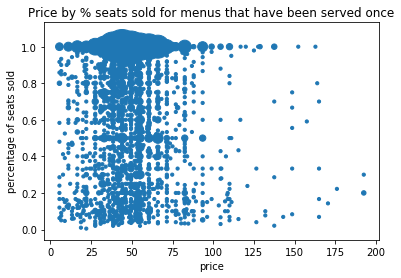

In [112]:
plt.scatter(sup['ticket_price'], sup['percentage_seats_sold'], s=sup['meal_id'] * 10)
plt.xlabel('price')
plt.ylabel('percentage of seats sold')
plt.title("Price by % seats sold for menus that have been served once")
plt.show()

In [87]:
meal_ids_3 = [11405, 11360, 11294, 11290, 11274, 11260, 11238, 11189, 11084, 11007, 10988, 10888, 10878, 10850, 10731, 10666, 10640, 10474, 10389, 10381, 10291, 10072, 9956, 9880, 9840, 9786, 9690, 9520, 9368, 9254, 9167, 9158, 9154, 9129, 9046, 8721, 8667, 8550, 8446, 8343, 8264, 8210, 8186, 8137, 7994, 7869, 7662, 7576, 7194, 7186, 7160, 7068, 7002, 6894, 6756, 6691, 6685, 6586, 6405, 6230, 6165, 6163, 5977, 5819, 5797, 5698, 5668, 5660, 5515, 5495, 5475, 5463, 5431, 5425, 5241, 4588, 4363, 4275, 3965, 3876, 3846, 3487, 3349, 3311, 2753, 11359, 11308, 11291, 11275, 11159, 11073, 10825, 10637, 10605, 10575, 10496, 10392, 10327, 10313, 9957, 9955, 9883, 9805, 9679, 9542, 9346, 9241, 9128, 8683, 8601, 8561, 8455, 8395, 8195, 8118, 7935, 7896, 7841, 7796, 7646, 7642, 7575, 7520, 7388, 7249, 7237, 6895, 6869, 6735, 6733, 6461, 6443, 6414, 6259, 6178, 6176, 6156, 6113, 5976, 5950, 5886, 5870, 5860, 5814, 5812, 5762, 5661, 5550, 5512, 5373, 5339, 5250, 5068, 4984, 4744, 4290, 4288, 4286, 4041, 3896, 3863, 3849, 3504, 3157, 11365, 11341, 11319, 11288, 11218, 11167, 11158, 11144, 11059, 10990, 10805, 10790, 10766, 10761, 10648, 10646, 10638, 10615, 10424, 10410, 10364, 10042, 9953, 9827, 9463, 9407, 9151, 9048, 9040, 8816, 8808, 8637, 8602, 8394, 8376, 8072, 7731, 7570, 7391, 7158, 7135, 7117, 7018, 6846, 6760, 6746, 6703, 6625, 6522, 6329, 6278, 6246, 6208, 5937, 5875, 5670, 5624, 5592, 5533, 5513, 5497, 5477, 5374, 5368, 5340, 5283, 5167, 4991, 4656, 4592, 4410, 4361, 4287, 3895, 3862, 3769, 3270, 3142, 3093, 3041, 2787, 11342, 11280, 11271, 11255, 11192, 11145, 11100, 11097, 11093, 11078, 10946, 10855, 10813, 10777, 10752, 10732, 10726, 10530, 10436, 10425, 10411, 10307, 10140, 10116, 10068, 10025, 10011, 9989, 9564, 9558, 9556, 9519, 9503, 9309, 9257, 9146, 9106, 8857, 8844, 8821, 8563, 8527, 8478, 8328, 8197, 8185, 7995, 7985, 7968, 7959, 7769, 7609, 7518, 7233, 7092, 7065, 7063, 7028, 7015, 6930, 6739, 6712, 6533, 6356, 6255, 6215, 6186, 6152, 6150, 6122, 6054, 6012, 5689, 5675, 5659, 5653, 5464, 5196, 5136, 4972, 4699, 4292, 4242, 4145, 4125, 4001, 3938, 3914, 3798, 3756, 3620, 3424, 3340, 3255, 3103, 2955, 2878, 2810]

In [88]:
supp = something[something['meal_id'].isin(meal_ids_3)].groupby(['ticket_price', 'percentage_seats_sold']).count()['meal_id'].reset_index()

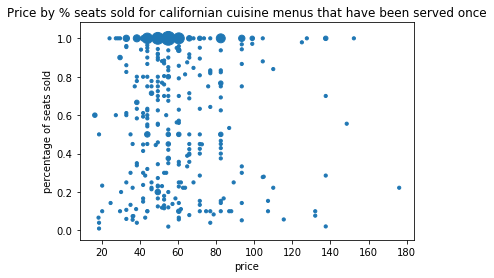

In [108]:
plt.scatter(supp['ticket_price'], supp['percentage_seats_sold'], s=supp['meal_id'] * 10)
plt.xlabel('price')
plt.ylabel('percentage of seats sold')
plt.title("Price by % seats sold for californian cuisine menus that have been served once")
plt.show()

In [109]:
meal_ids_4 = [11405, 11385, 11377, 11360, 11294, 11290, 11274, 11260, 11238, 11213, 11189, 11142, 11084, 11007, 10988, 10888, 10878, 10850, 10830, 10782, 10747, 10745, 10731, 10691, 10666, 10640, 10474, 10389, 10381, 10291, 10177, 10074, 10072, 9956, 9880, 9840, 9829, 9786, 9690, 9686, 9520, 9506, 9415, 9368, 9254, 9167, 9158, 9154, 9129, 9046, 8721, 8680, 8667, 8550, 8446, 8343, 8297, 8264, 8259, 8210, 8186, 8137, 7994, 7869, 7727, 7662, 7576, 7532, 7256, 7207, 7194, 7186, 7160, 7109, 7081, 7068, 7002, 6979, 6968, 6894, 6756, 6742, 6691, 6685, 6586, 6405, 6403, 6230, 6165, 6163, 6039, 5977, 5819, 5797, 5698, 5668, 5660, 5515, 5495, 5475, 5463, 5431, 5425, 5241, 4959, 4888, 4696, 4686, 4588, 4363, 4275, 3970, 3965, 3876, 3846, 3685, 3572, 3501, 3487, 3390, 3349, 3311, 3020, 2942, 2881, 2753, 11380, 11359, 11308, 11291, 11275, 11159, 11073, 10906, 10904, 10881, 10833, 10825, 10746, 10637, 10605, 10575, 10561, 10496, 10392, 10327, 10313, 10196, 9957, 9955, 9946, 9883, 9863, 9805, 9679, 9542, 9346, 9245, 9241, 9128, 9103, 8769, 8710, 8683, 8660, 8657, 8634, 8629, 8601, 8561, 8503, 8455, 8395, 8332, 8298, 8195, 8118, 7990, 7935, 7896, 7841, 7796, 7728, 7646, 7642, 7599, 7575, 7563, 7520, 7388, 7249, 7237, 7225, 7080, 6895, 6869, 6735, 6733, 6656, 6461, 6443, 6414, 6348, 6259, 6221, 6178, 6176, 6156, 6113, 5976, 5950, 5886, 5870, 5860, 5844, 5814, 5812, 5796, 5762, 5661, 5550, 5512, 5373, 5371, 5339, 5250, 5068, 4984, 4744, 4695, 4691, 4290, 4288, 4286, 4202, 4041, 3896, 3863, 3849, 3504, 3500, 3251, 3157, 2882, 2848, 11379, 11365, 11341, 11319, 11288, 11256, 11252, 11218, 11210, 11167, 11158, 11144, 11059, 10990, 10880, 10834, 10832, 10805, 10790, 10784, 10766, 10761, 10648, 10646, 10638, 10615, 10424, 10410, 10364, 10320, 10042, 9953, 9862, 9827, 9612, 9463, 9407, 9151, 9125, 9052, 9050, 9048, 9040, 8816, 8808, 8637, 8602, 8536, 8514, 8425, 8394, 8376, 8286, 8133, 8072, 7731, 7656, 7654, 7570, 7391, 7158, 7135, 7119, 7117, 7020, 7018, 6846, 6760, 6746, 6724, 6703, 6625, 6522, 6329, 6278, 6246, 6208, 6037, 5975, 5937, 5875, 5845, 5694, 5670, 5624, 5592, 5533, 5513, 5497, 5477, 5374, 5368, 5340, 5283, 5167, 4991, 4694, 4692, 4656, 4592, 4410, 4361, 4349, 4287, 3895, 3862, 3769, 3457, 3270, 3156, 3142, 3093, 3041, 2787, 11384, 11378, 11342, 11280, 11271, 11255, 11192, 11145, 11100, 11097, 11093, 11078, 10946, 10855, 10835, 10813, 10783, 10777, 10752, 10732, 10726, 10690, 10530, 10483, 10436, 10425, 10411, 10321, 10307, 10296, 10140, 10116, 10068, 10025, 10011, 9989, 9970, 9687, 9564, 9558, 9556, 9519, 9505, 9503, 9412, 9309, 9257, 9198, 9146, 9106, 8857, 8844, 8821, 8708, 8563, 8527, 8507, 8478, 8328, 8324, 8290, 8285, 8197, 8185, 8134, 7995, 7985, 7968, 7959, 7769, 7609, 7597, 7531, 7518, 7257, 7233, 7210, 7092, 7065, 7063, 7028, 7015, 6930, 6739, 6712, 6533, 6356, 6255, 6215, 6186, 6152, 6150, 6122, 6063, 6054, 6038, 6012, 5974, 5888, 5846, 5689, 5675, 5659, 5653, 5562, 5560, 5464, 5196, 5136, 5112, 4972, 4887, 4699, 4693, 4687, 4486, 4348, 4292, 4242, 4145, 4125, 4091, 4001, 3979, 3977, 3971, 3938, 3930, 3914, 3798, 3756, 3620, 3571, 3424, 3340, 3255, 3103, 3011, 2955, 2878, 2866, 2810, 1619, 1256]

In [110]:
nice = something[something['meal_id'].isin(meal_ids_4)].groupby(['ticket_price', 'percentage_seats_sold']).count()['meal_id'].reset_index()

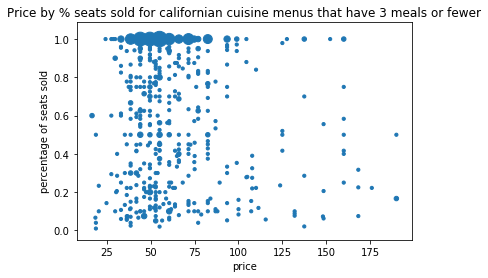

In [111]:
plt.scatter(nice['ticket_price'], nice['percentage_seats_sold'], s=nice['meal_id'] * 10)
plt.xlabel('price')
plt.ylabel('percentage of seats sold')
plt.title("Price by % seats sold for californian cuisine menus that have 3 meals or fewer")
plt.show()

In [95]:
meal_ids_5 = [11396, 11362, 11341, 11334, 11332, 11321, 11319, 11307, 11288, 11283, 11281, 11276, 11266, 11218, 11191, 11137, 11132, 11130, 11107, 11105, 11099, 11059, 11055, 11053, 11042, 10996, 10990, 10941, 10909, 10862, 10811, 10805, 10796, 10784, 10766, 10758, 10735, 10714, 10706, 10675, 10648, 10617, 10615, 10566, 10564, 10515, 10476, 10441, 10405, 10387, 10340, 10330, 10320, 10310, 10297, 10275, 10211, 10209, 10195, 10181, 10167, 10123, 10117, 10095, 10090, 10042, 10026, 10002, 10000, 9961, 9953, 9947, 9917, 9895, 9884, 9862, 9858, 9842, 9761, 9757, 9688, 9680, 9653, 9638, 9588, 9579, 9459, 9419, 9417, 9385, 9383, 9377, 9304, 9293, 9272, 9252, 9250, 9246, 9191, 9151, 9125, 9093, 9081, 9076, 9068, 9014, 9000, 8991, 8985, 8983, 8940, 8913, 8870, 8626, 8618, 8614, 8536, 8427, 8364, 8352, 8303, 8268, 8242, 8238, 8226, 8216, 8194, 8152, 8072, 8059, 7969, 7929, 7922, 7920, 7903, 7889, 7877, 7871, 7838, 7836, 7816, 7791, 7683, 7652, 7578, 7511, 7507, 7466, 7441, 7420, 7272, 7252, 7248, 7242, 7184, 7174, 7172, 7158, 7133, 7131, 7129, 7123, 7117, 7095, 7089, 7087, 7062, 7033, 7018, 6963, 6957, 6955, 6947, 6921, 6919, 6905, 6709, 6623, 5001, 3697, 2958, 2546, 11395, 11376, 11342, 11331, 11322, 11316, 11280, 11271, 11269, 11145, 11138, 11100, 11097, 11095, 11078, 11054, 11050, 11044, 11030, 10993, 10923, 10912, 10873, 10813, 10802, 10791, 10783, 10779, 10752, 10732, 10726, 10724, 10698, 10676, 10635, 10616, 10552, 10530, 10516, 10514, 10430, 10408, 10394, 10321, 10307, 10296, 10286, 10284, 10268, 10212, 10176, 10151, 10149, 10140, 10126, 10111, 10109, 10107, 10094, 10092, 10084, 10080, 10071, 10050, 10011, 9962, 9937, 9901, 9872, 9868, 9851, 9801, 9799, 9795, 9791, 9781, 9766, 9762, 9758, 9704, 9698, 9694, 9687, 9658, 9632, 9613, 9578, 9556, 9536, 9511, 9505, 9503, 9490, 9424, 9416, 9311, 9309, 9307, 9292, 9268, 9257, 9255, 9249, 9243, 9228, 9198, 9190, 9180, 9161, 9146, 9124, 9118, 9094, 9092, 9084, 9080, 9075, 9045, 9011, 9009, 8995, 8827, 8821, 8761, 8716, 8708, 8702, 8698, 8685, 8681, 8664, 8625, 8621, 8563, 8533, 8527, 8525, 8513, 8492, 8475, 8451, 8328, 8318, 8290, 8279, 8269, 8231, 8201, 8187, 8185, 8173, 8104, 8071, 8054, 8050, 8000, 7995, 7945, 7923, 7872, 7870, 7851, 7845, 7824, 7730, 7665, 7651, 7634, 7609, 7597, 7593, 7516, 7510, 7469, 7465, 7421, 7406, 7291, 7289, 7287, 7275, 7257, 7241, 7235, 7233, 7216, 7173, 7165, 7161, 7157, 7149, 7144, 7112, 7106, 7094, 7090, 7065, 7063, 7058, 7011, 6990, 6971, 6942, 6920, 6918, 6906, 5952, 11405, 11346, 11339, 11336, 11330, 11294, 11290, 11264, 11189, 11181, 11113, 11088, 11084, 11075, 11063, 11061, 11049, 11007, 10988, 10984, 10949, 10922, 10915, 10911, 10878, 10868, 10782, 10622, 10613, 10602, 10600, 10548, 10443, 10399, 10393, 10381, 10359, 10312, 10308, 10283, 10184, 10159, 10157, 10155, 10150, 10115, 10074, 10040, 9986, 9927, 9920, 9902, 9880, 9864, 9846, 9840, 9837, 9834, 9794, 9792, 9786, 9759, 9745, 9719, 9690, 9686, 9660, 9657, 9650, 9648, 9642, 9633, 9621, 9615, 9581, 9555, 9547, 9545, 9541, 9531, 9520, 9506, 9493, 9425, 9389, 9368, 9312, 9291, 9281, 9260, 9208, 9206, 9147, 9145, 9098, 9096, 9085, 9079, 9070, 9046, 9044, 9010, 8996, 8989, 8852, 8818, 8803, 8745, 8723, 8721, 8717, 8715, 8703, 8701, 8680, 8677, 8645, 8628, 8606, 8598, 8546, 8506, 8474, 8454, 8452, 8431, 8413, 8362, 8297, 8280, 8264, 8162, 8081, 8053, 7999, 7786, 7758, 7748, 7650, 7606, 7604, 7576, 7546, 7517, 7468, 7422, 7395, 7280, 7256, 7246, 7236, 7234, 7217, 7211, 7166, 7162, 7152, 7148, 7143, 7085, 7064, 6985, 6972, 6953, 6834, 6651, 6619, 6079, 6045, 5871, 1649, 11400, 11393, 11359, 11353, 11335, 11333, 11326, 11291, 11217, 11188, 11131, 11106, 11102, 11081, 11076, 11073, 11070, 11056, 11041, 11037, 11021, 11010, 11008, 10991, 10981, 10961, 10954, 10938, 10871, 10851, 10837, 10829, 10810, 10793, 10760, 10674, 10618, 10609, 10605, 10589, 10575, 10558, 10494, 10442, 10434, 10392, 10337, 10317, 10309, 10259, 10249, 10122, 10096, 10078, 10066, 10037, 10027, 9960, 9919, 9913, 9883, 9863, 9853, 9821, 9809, 9805, 9776, 9768, 9764, 9760, 9743, 9679, 9649, 9647, 9576, 9530, 9523, 9470, 9450, 9404, 9388, 9346, 9344, 9330, 9290, 9251, 9245, 9241, 9211, 9209, 9207, 9201, 9168, 9144, 9128, 9103, 9097, 9067, 9049, 9039, 8999, 8984, 8908, 8869, 8859, 8819, 8754, 8752, 8710, 8696, 8655, 8634, 8629, 8613, 8601, 8589, 8561, 8505, 8498, 8426, 8424, 8395, 8349, 8298, 8281, 8277, 8250, 8237, 8195, 8096, 8094, 8080, 8048, 8040, 8030, 7947, 7935, 7919, 7915, 7874, 7796, 7789, 7787, 7754, 7726, 7673, 7669, 7653, 7642, 7629, 7617, 7607, 7605, 7603, 7599, 7595, 7559, 7527, 7512, 7463, 7436, 7427, 7399, 7243, 7220, 7218, 7206, 7189, 7130, 7128, 7126, 6999, 6997, 6992, 6973, 6946, 6793, 6688, 6346, 3336, 2981]

In [96]:
nice2 = something[something['meal_id'].isin(meal_ids_5)].groupby(['ticket_price', 'percentage_seats_sold']).count()['meal_id'].reset_index()

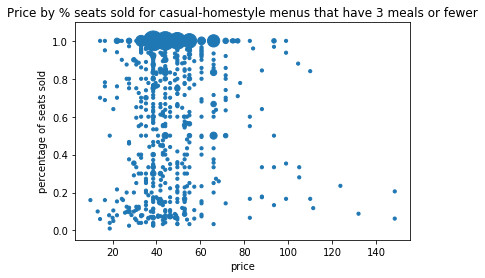

In [97]:
plt.scatter(nice2['ticket_price'], nice2['percentage_seats_sold'], s=nice2['meal_id'] * 10)
plt.xlabel('price')
plt.ylabel('percentage of seats sold')
plt.title("Price by % seats sold for casual-homestyle menus that have 3 meals or fewer")
plt.show()

In [98]:
meal_ids_6 = [11405, 11346, 11339, 11336, 11330, 11294, 11290, 11189, 11181, 11113, 11088, 11084, 11075, 11063, 11061, 11049, 11007, 10988, 10949, 10915, 10878, 10868, 10622, 10613, 10602, 10600, 10548, 10443, 10399, 10381, 10308, 10283, 10184, 10159, 10157, 10150, 10115, 10040, 9986, 9927, 9920, 9902, 9880, 9864, 9840, 9837, 9834, 9794, 9792, 9786, 9759, 9745, 9690, 9660, 9650, 9642, 9633, 9621, 9581, 9555, 9547, 9541, 9531, 9520, 9493, 9425, 9368, 9291, 9281, 9147, 9098, 9096, 9085, 9079, 9070, 9046, 9044, 8989, 8803, 8723, 8721, 8703, 8701, 8677, 8645, 8628, 8606, 8598, 8546, 8431, 8264, 8081, 8053, 7786, 7758, 7748, 7650, 7606, 7604, 7576, 7546, 7517, 7468, 7395, 7246, 7236, 7217, 7166, 7152, 7148, 7085, 7064, 6985, 6972, 6834, 1649, 11400, 11393, 11359, 11353, 11335, 11333, 11326, 11291, 11217, 11188, 11102, 11076, 11073, 11070, 11056, 11021, 11010, 11008, 10991, 10981, 10954, 10871, 10851, 10837, 10829, 10793, 10760, 10674, 10618, 10609, 10605, 10589, 10575, 10558, 10494, 10442, 10434, 10392, 10337, 10317, 10259, 10249, 10122, 10078, 10066, 10037, 9960, 9919, 9913, 9883, 9853, 9809, 9805, 9776, 9768, 9764, 9760, 9743, 9679, 9649, 9576, 9530, 9523, 9470, 9450, 9404, 9346, 9344, 9330, 9290, 9241, 9211, 9209, 9201, 9168, 9128, 9097, 9049, 9039, 8908, 8869, 8859, 8696, 8655, 8613, 8601, 8589, 8561, 8395, 8349, 8277, 8250, 8195, 8096, 8094, 8080, 8048, 8040, 8030, 7947, 7935, 7919, 7915, 7874, 7796, 7789, 7787, 7754, 7726, 7669, 7642, 7629, 7617, 7607, 7605, 7603, 7595, 7559, 7527, 7512, 7463, 7436, 7427, 7399, 7218, 7206, 7128, 6999, 6997, 6992, 6973, 11396, 11362, 11341, 11319, 11307, 11288, 11283, 11281, 11276, 11218, 11191, 11107, 11099, 11059, 11055, 10996, 10990, 10941, 10862, 10811, 10805, 10796, 10766, 10758, 10735, 10714, 10706, 10675, 10648, 10617, 10615, 10566, 10564, 10476, 10441, 10405, 10387, 10340, 10330, 10297, 10275, 10181, 10123, 10117, 10095, 10042, 10002, 10000, 9961, 9953, 9947, 9917, 9895, 9884, 9858, 9757, 9688, 9680, 9653, 9588, 9579, 9459, 9377, 9304, 9293, 9272, 9252, 9250, 9246, 9151, 9093, 9081, 9014, 8991, 8985, 8940, 8913, 8870, 8626, 8618, 8427, 8352, 8268, 8226, 8216, 8194, 8152, 8072, 8059, 7969, 7922, 7920, 7903, 7889, 7877, 7838, 7836, 7791, 7683, 7578, 7511, 7507, 7466, 7441, 7272, 7252, 7184, 7158, 7133, 7131, 7123, 7117, 7095, 7089, 7062, 7033, 7018, 6963, 6921, 6905, 2546, 11395, 11376, 11342, 11331, 11322, 11280, 11271, 11269, 11145, 11100, 11097, 11095, 11078, 11050, 11044, 11030, 10873, 10813, 10802, 10791, 10779, 10752, 10732, 10726, 10724, 10698, 10676, 10635, 10616, 10552, 10530, 10516, 10430, 10408, 10307, 10286, 10284, 10268, 10212, 10151, 10149, 10140, 10111, 10109, 10107, 10071, 10011, 9962, 9937, 9901, 9872, 9868, 9851, 9801, 9799, 9795, 9781, 9766, 9762, 9758, 9704, 9698, 9694, 9613, 9578, 9556, 9536, 9511, 9503, 9490, 9424, 9309, 9307, 9292, 9268, 9257, 9255, 9243, 9180, 9161, 9146, 9124, 9118, 9094, 9092, 9084, 9045, 8821, 8761, 8702, 8698, 8685, 8681, 8664, 8625, 8621, 8563, 8533, 8527, 8492, 8328, 8318, 8269, 8231, 8187, 8185, 8173, 8104, 8071, 7995, 7945, 7923, 7872, 7851, 7845, 7824, 7730, 7665, 7651, 7634, 7609, 7593, 7510, 7469, 7465, 7406, 7289, 7287, 7275, 7241, 7233, 7216, 7173, 7157, 7149, 7065, 7063, 7058, 7011, 6990, 6971, 6906]

In [99]:
nice3 = something[something['meal_id'].isin(meal_ids_6)].groupby(['ticket_price', 'percentage_seats_sold']).count()['meal_id'].reset_index()

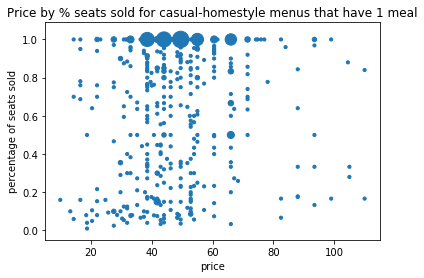

In [104]:
plt.scatter(nice3['ticket_price'], nice3['percentage_seats_sold'], s=nice3['meal_id'] * 10)
plt.xlabel('price')
plt.ylabel('percentage of seats sold')
plt.title("Price by % seats sold for casual-homestyle menus that have 1 meal")
plt.show()

In [105]:
meal_ids_7 = [11407, 11394, 11391, 11369, 11365, 11350, 11309, 11279, 11270, 11222, 11167, 11164, 11158, 11144, 11135, 11111, 11018, 10978, 10893, 10790, 10761, 10594, 10437, 10424, 10410, 10364, 10077, 10022, 9924, 9871, 9850, 9827, 9780, 9742, 9699, 9631, 9619, 9596, 9533, 9518, 9489, 9469, 9463, 9409, 9407, 9379, 9358, 9320, 9256, 9229, 9199, 9087, 9048, 8860, 8816, 8808, 8741, 8707, 8684, 8665, 8610, 8398, 8394, 8385, 8376, 8309, 8291, 8289, 8248, 8244, 8196, 8067, 8055, 8001, 7950, 7879, 7873, 7854, 7731, 7681, 7614, 7472, 7464, 7391, 7306, 7176, 7137, 7135, 7004, 6903, 6524, 2905, 11397, 11390, 11347, 11320, 11318, 11263, 11062, 11032, 10883, 10877, 10855, 10777, 10705, 10670, 10565, 10481, 10479, 10436, 10425, 10423, 10411, 10360, 10280, 10116, 10075, 10068, 10035, 10025, 10021, 9921, 9811, 9611, 9564, 9558, 9519, 9497, 9474, 9431, 9305, 9261, 9219, 9148, 9106, 9101, 9088, 9086, 8857, 8844, 8815, 8603, 8587, 8478, 8414, 8399, 8384, 8296, 8263, 8197, 8177, 8167, 8149, 8138, 8056, 8052, 7998, 7968, 7964, 7959, 7932, 7878, 7855, 7769, 7719, 7676, 7659, 7615, 7545, 7518, 7434, 7359, 7177, 7159, 7114, 7092, 7028, 7019, 6940, 6930, 6910, 6908, 6902, 6124, 2275, 11383, 11373, 11360, 11274, 11260, 11238, 11230, 11183, 11009, 10901, 10888, 10852, 10731, 10652, 10640, 10596, 10480, 10389, 10252, 10133, 10072, 10063, 10057, 10012, 9963, 9938, 9915, 9900, 9782, 9714, 9644, 9491, 9275, 9254, 9218, 9167, 9129, 9105, 8824, 8801, 8727, 8699, 8682, 8667, 8620, 8550, 8532, 8343, 8278, 8274, 8246, 8210, 8198, 8186, 8172, 8137, 8093, 8039, 7994, 7984, 7918, 7901, 7869, 7846, 7764, 7753, 7671, 7662, 7660, 7641, 7630, 7616, 7594, 7542, 7505, 7443, 7221, 7194, 7164, 7160, 7127, 7068, 7002, 6989, 6970, 6894, 11308, 11287, 11275, 11253, 11251, 11159, 11151, 11136, 11110, 10985, 10948, 10827, 10825, 10711, 10709, 10653, 10496, 10488, 10343, 10327, 10313, 10073, 10023, 9987, 9965, 9957, 9955, 9843, 9838, 9787, 9691, 9689, 9623, 9618, 9542, 9538, 9482, 9472, 9365, 9108, 9069, 9035, 8982, 8851, 8809, 8611, 8559, 8453, 8430, 8294, 8245, 8215, 8130, 8101, 7917, 7896, 7646, 7589, 7543, 7520, 7506, 7388, 7253, 7249, 7237, 7179, 6978, 6967, 6936, 6900, 6895, 6779]

In [106]:
nice4 = something[something['meal_id'].isin(meal_ids_7)].groupby(['ticket_price', 'percentage_seats_sold']).count()['meal_id'].reset_index()

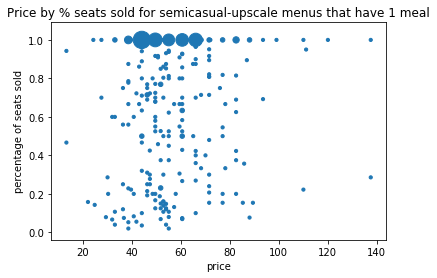

In [107]:
plt.scatter(nice4['ticket_price'], nice4['percentage_seats_sold'], s=nice4['meal_id'] * 10)
plt.xlabel('price')
plt.ylabel('percentage of seats sold')
plt.title("Price by % seats sold for semicasual-upscale menus that have 1 meal")
plt.show()

In [114]:
something[something['meal_id'].isin(meal_ids_7)]

,meal_id,meal_created_date,meal_date,ticket_price,seats_available,seats_sold,percentage_seats_sold,meal_year
819,6779,2016-10-06,2016-11-07,49.50,40,24,0.600000,2016
1686,6894,2016-10-18,2016-11-16,49.50,24,24,1.000000,2016
1687,6900,2016-10-19,2016-12-04,59.40,22,20,0.909091,2016
1689,6936,2016-10-23,2016-11-13,55.00,30,30,1.000000,2016
1694,6967,2016-10-26,2016-11-05,39.60,18,4,0.222222,2016
1695,6970,2016-10-26,2016-12-16,55.00,28,28,1.000000,2016
1698,6989,2016-10-28,2016-11-06,38.50,100,2,0.020000,2016
1738,7221,2016-11-22,2016-12-14,44.00,25,8,0.320000,2016
1742,7237,2016-11-24,2017-01-27,49.50,10,10,1.000000,2017
1745,7249,2016-11-28,2016-12-18,60.50,10,7,0.700000,2016


In [133]:
tickets_something = pd.read_csv('./tickets_21_42.csv', delimiter='|')

In [134]:
meal_ticket_prices = tickets_something.groupby('meal_id')['ticket_price'].mean().reset_index()
meal_percentage_of_seats_sold = tickets_something[['meal_id', 'percentage_of_seats_sold']].drop_duplicates()

In [135]:
suppp = meal_ticket_prices.merge(meal_percentage_of_seats_sold, left_on='meal_id', right_on='meal_id', how='inner')[['ticket_price', 'percentage_of_seats_sold']]

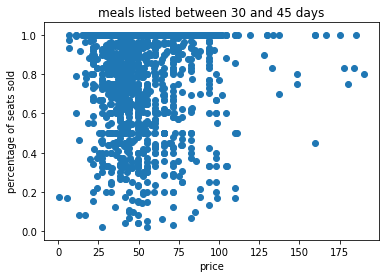

In [136]:
plt.scatter(suppp['ticket_price'], suppp['percentage_of_seats_sold'])
plt.title('meals listed between 21 and 42 days')
plt.xlabel('price')
plt.ylabel('percentage of seats sold')
plt.show()

In [137]:
tickets_something = pd.read_csv('./tickets_28_35.csv', delimiter='|')

In [138]:
meal_ticket_prices = tickets_something.groupby('meal_id')['ticket_price'].mean().reset_index()
meal_percentage_of_seats_sold = tickets_something[['meal_id', 'percentage_of_seats_sold']].drop_duplicates()

In [139]:
suppp = meal_ticket_prices.merge(meal_percentage_of_seats_sold, left_on='meal_id', right_on='meal_id', how='inner')[['ticket_price', 'percentage_of_seats_sold']]

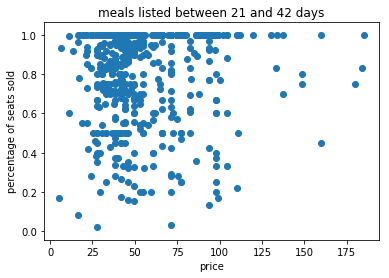

In [140]:
plt.scatter(suppp['ticket_price'], suppp['percentage_of_seats_sold'])
plt.title('meals listed between 21 and 42 days')
plt.xlabel('price')
plt.ylabel('percentage of seats sold')
plt.show()

In [141]:
tickets_something = pd.read_csv('./tickets_32.csv', delimiter='|')

In [152]:
meal_ticket_prices = tickets_something.groupby('meal_id')['ticket_price'].mean().reset_index()
meal_percentage_of_seats_sold = tickets_something[['meal_id', 'percentage_of_seats_sold']].drop_duplicates()
suppp = meal_ticket_prices.merge(meal_percentage_of_seats_sold, left_on='meal_id', right_on='meal_id', how='inner')

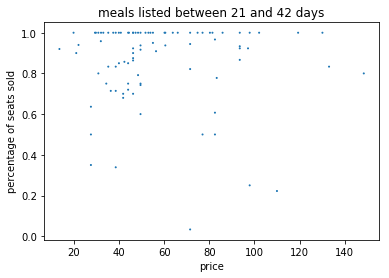

,ticket_price,percentage_of_seats_sold,meal_id
0,13.534783,0.920000,1
1,19.800000,1.000000,1
2,21.000000,0.900000,1
3,22.000000,0.940000,1
4,27.500000,0.350000,1
5,27.500000,0.500000,1
6,27.500000,0.636364,1
7,29.304000,1.000000,1
8,29.700000,1.000000,1
9,30.800000,0.800000,1


In [157]:
suppp = suppp.groupby(['ticket_price', 'percentage_of_seats_sold']).count()['meal_id'].reset_index()
plt.scatter(suppp['ticket_price'], suppp['percentage_of_seats_sold'], s=suppp['meal_id'])
plt.title('meals listed between 21 and 42 days')
plt.xlabel('price')
plt.ylabel('percentage of seats sold')
plt.show()
suppp.groupby(['ticket_price', 'percentage_of_seats_sold']).count()['meal_id'].reset_index()

In [158]:
meal_ids_9 = [11354, 11315, 11305, 11303, 11297, 11258, 11250, 11242, 11206, 11204, 11200, 11179, 11177, 11175, 11173, 11169, 11125, 11121, 11117, 10971, 10967, 10965, 10963, 10945, 10943, 10932, 10930, 10926, 10917, 10815, 10807, 10782, 10776, 10772, 10718, 10716, 10659, 10630, 10580, 10540, 10538, 10505, 10493, 10427, 10416, 10352, 10304, 10302, 10293, 10271, 10171, 10169, 10121, 10087, 10044, 9992, 9990, 9982, 9980, 9944, 9940, 9934, 9929, 9922, 9910, 9908, 9893, 9889, 9860, 9629, 9627, 9608, 9604, 9602, 9569, 9403, 9397, 9395, 9391, 9360, 9334, 9326, 9262, 9233, 9222, 9193, 9156, 9138, 9134, 9132, 9026, 9024, 9020, 9010, 9006, 9004, 9002, 8987, 8929, 8927, 8925, 8921, 8919, 8917, 8902, 8900, 8897, 8895, 8893, 8889, 8887, 8879, 8828, 8797, 8784, 8782, 8780, 8778, 8776, 8774, 8770, 8760, 8757, 8729, 8688, 8680, 8639, 8616, 8590, 8544, 8540, 8485, 8481, 8479, 8460, 8458, 8456, 8452, 8396, 8360, 8341, 8339, 8337, 8333, 8323, 8315, 8313, 8297, 8276, 8234, 8230, 8214, 8202, 8180, 8143, 8141, 8105, 8091, 8088, 8021, 8017, 8011, 8009, 7865, 7863, 7821, 7818, 7812, 7810, 7799, 7797, 7784, 7744, 7740, 7723, 7715, 7711, 7584, 7580, 7572, 7560, 7540, 7538, 7536, 7528, 7492, 7480, 7454, 7428, 7416, 7292, 7232, 7230, 7201, 7180, 7156, 7111, 7105, 7077, 7075, 7057, 7055, 7024, 6983, 6979, 6968, 6966, 6959, 6884, 6872, 6862, 6860, 6836, 6815, 6813, 6782, 6768, 6639, 6631, 6627, 6590, 6530, 6502, 6500, 6498, 6489, 6450, 6448, 6446, 6419, 6353, 6339, 6337, 6300, 6292, 6286, 6266, 6264, 6262, 6248, 6214, 6131, 6112, 6015, 5997, 5991, 5987, 5985, 5969, 5965, 5943, 5941, 5933, 5869, 5863, 5823, 5821, 5791, 5761, 5731, 5686, 5658, 5654, 5636, 5620, 5618, 5610, 5597, 5585, 5575, 5567, 5551, 5531, 5523, 5507, 5415, 5413, 5409, 5399, 5378, 5366, 5328, 5326, 5324, 5312, 5310, 5299, 5295, 5271, 5145, 5137, 5089, 5026, 4911, 4909, 4901, 4784, 4778, 4755, 4634, 4565, 4519, 4517, 4511, 4499, 4446, 4444, 4424, 4420, 4418, 4416, 4400, 4183, 4152, 4058, 3991, 3972, 3967, 3868, 3856, 3828, 3797, 3685, 3683, 3681, 3651, 3643, 3637, 3572, 3535, 3531, 3461, 3421, 3417, 3390, 3357, 3272, 3258, 3188, 3055, 3014, 3012, 2944, 2942, 2889, 2847, 2698, 2694, 2603, 2556, 2528, 2460, 2394, 2324, 2316, 2304, 2211, 2201, 1995, 1991, 1847, 1831, 1817, 1813, 1809, 1530, 1507, 1488, 1482, 1480, 1478, 1460, 1458, 1456, 1369, 1116, 1112, 936, 870, 866, 864, 847, 845, 747, 745, 11406, 11314, 11312, 11298, 11249, 11241, 11214, 11212, 11205, 11180, 11178, 11176, 11174, 11172, 11170, 11124, 11122, 11116, 11035, 11001, 10974, 10972, 10970, 10968, 10964, 10942, 10940, 10933, 10931, 10927, 10925, 10916, 10853, 10833, 10773, 10715, 10629, 10627, 10585, 10579, 10541, 10506, 10502, 10421, 10419, 10417, 10371, 10351, 10347, 10345, 10303, 10301, 10272, 10270, 10263, 10206, 10193, 10172, 10162, 10136, 10120, 10088, 10045, 10043, 9991, 9941, 9928, 9849, 9789, 9748, 9673, 9663, 9607, 9599, 9582, 9574, 9572, 9570, 9460, 9400, 9357, 9354, 9352, 9339, 9333, 9325, 9323, 9303, 9239, 9235, 9196, 9178, 9157, 9155, 9142, 9137, 9135, 9131, 9110, 9033, 9031, 9029, 9015, 9007, 9005, 8934, 8924, 8916, 8905, 8903, 8896, 8890, 8888, 8884, 8882, 8880, 8878, 8876, 8863, 8847, 8829, 8800, 8798, 8796, 8785, 8783, 8777, 8773, 8767, 8765, 8689, 8634, 8629, 8543, 8511, 8490, 8486, 8482, 8480, 8457, 8443, 8439, 8397, 8334, 8314, 8312, 8298, 8221, 8219, 8217, 8211, 8181, 8157, 8127, 8121, 8069, 8035, 8028, 8020, 8014, 8010, 8008, 8006, 7990, 7977, 7974, 7943, 7868, 7862, 7853, 7830, 7826, 7815, 7778, 7775, 7747, 7741, 7739, 7732, 7721, 7710, 7636, 7583, 7577, 7553, 7535, 7489, 7487, 7482, 7479, 7267, 7231, 7202, 7200, 7198, 7191, 7187, 7126, 7110, 7074, 7056, 7050, 7026, 7007, 6982, 6958, 6924, 6883, 6865, 6861, 6859, 6853, 6837, 6835, 6816, 6814, 6807, 6795, 6781, 6769, 6626, 6607, 6605, 6591, 6589, 6531, 6529, 6449, 6447, 6376, 6360, 6354, 6352, 6285, 6231, 6211, 6205, 6180, 6174, 6110, 6084, 6052, 6048, 6018, 6000, 5998, 5996, 5994, 5990, 5988, 5986, 5978, 5964, 5934, 5864, 5862, 5854, 5852, 5830, 5820, 5794, 5790, 5760, 5754, 5701, 5657, 5643, 5619, 5606, 5574, 5572, 5570, 5566, 5564, 5540, 5506, 5504, 5460, 5408, 5402, 5400, 5398, 5379, 5365, 5323, 5302, 5296, 5292, 5288, 5268, 5266, 5210, 5204, 5202, 5194, 5188, 5166, 5134, 5122, 5076, 5074, 5058, 4910, 4859, 4797, 4795, 4783, 4781, 4775, 4752, 4750, 4661, 4599, 4560, 4535, 4518, 4516, 4512, 4504, 4496, 4492, 4490, 4423, 4419, 4405, 4380, 4334, 4186, 4177, 4153, 4149, 4117, 4115, 4111, 4057, 3988, 3973, 3861, 3730, 3710, 3690, 3682, 3593, 3534, 3514, 3458, 3420, 3342, 3251, 3219, 3195, 3155, 2973, 2971, 2912, 2906, 2770, 2555, 2475, 2212, 2208, 2206, 2202, 2200, 1862, 1824, 1822, 1816, 1810, 1684, 1506, 1477, 1459, 1422, 1352, 1350, 1344, 1336, 1328, 1133, 1115, 1086, 1078, 1030, 1028, 1006, 937, 848, 11356, 11313, 11311, 11301, 11299, 11248, 11244, 11240, 11228, 11185, 11171, 11123, 11119, 11002, 10982, 10973, 10969, 10928, 10834, 10817, 10784, 10774, 10770, 10657, 10628, 10584, 10582, 10578, 10576, 10542, 10535, 10429, 10420, 10418, 10414, 10403, 10372, 10348, 10346, 10344, 10328, 10320, 10295, 10269, 10207, 10161, 10137, 10135, 10097, 10090, 10046, 9984, 9951, 9931, 9906, 9891, 9878, 9844, 9751, 9749, 9747, 9707, 9705, 9672, 9670, 9668, 9666, 9664, 9625, 9606, 9600, 9598, 9573, 9571, 9477, 9473, 9457, 9445, 9419, 9417, 9399, 9393, 9364, 9356, 9351, 9340, 9331, 9324, 9240, 9238, 9236, 9213, 9177, 9140, 9136, 9119, 9032, 9030, 9028, 9022, 9016, 8935, 8933, 8923, 8915, 8904, 8891, 8885, 8883, 8881, 8877, 8875, 8812, 8799, 8795, 8793, 8791, 8786, 8772, 8764, 8737, 8735, 8542, 8538, 8534, 8512, 8489, 8487, 8483, 8444, 8442, 8440, 8438, 8436, 8335, 8311, 8236, 8222, 8218, 8212, 8184, 8178, 8156, 8154, 8126, 8124, 8122, 8120, 8116, 8065, 8034, 8032, 8029, 8015, 7978, 7975, 7942, 7909, 7861, 7842, 7827, 7814, 7801, 7779, 7777, 7774, 7746, 7742, 7738, 7733, 7639, 7635, 7590, 7556, 7552, 7550, 7548, 7544, 7526, 7521, 7496, 7490, 7488, 7485, 7483, 7460, 7387, 7266, 7203, 7188, 7051, 7035, 7022, 7008, 7006, 6996, 6925, 6919, 6907, 6886, 6882, 6880, 6842, 6817, 6798, 6780, 6679, 6629, 6606, 6604, 6602, 6570, 6550, 6452, 6438, 6399, 6397, 6359, 6284, 6270, 6268, 6206, 6204, 6202, 6157, 6129, 6109, 6093, 6087, 6085, 6074, 6068, 6051, 6049, 6047, 6001, 5999, 5995, 5993, 5989, 5939, 5881, 5867, 5865, 5851, 5839, 5833, 5829, 5817, 5795, 5789, 5759, 5751, 5656, 5622, 5590, 5573, 5571, 5569, 5565, 5563, 5553, 5541, 5471, 5417, 5407, 5403, 5401, 5364, 5301, 5293, 5269, 5267, 5193, 5189, 5079, 5075, 5039, 4884, 4814, 4798, 4796, 4782, 4780, 4776, 4774, 4772, 4751, 4749, 4534, 4515, 4507, 4495, 4493, 4491, 4463, 4428, 4422, 4398, 4187, 4185, 4170, 4154, 4150, 4116, 4016, 3806, 3789, 3733, 3604, 3529, 3457, 3455, 3423, 3419, 3343, 3282, 3230, 3216, 3198, 3156, 3112, 3053, 2974, 2972, 2964, 2911, 2843, 2771, 2712, 2657, 2578, 2540, 2480, 2396, 2368, 2320, 2318, 2207, 2205, 2203, 2199, 2057, 1957, 1934, 1833, 1825, 1823, 1819, 1811, 1777, 1763, 1661, 1641, 1623, 1601, 1486, 1472, 1423, 1357, 1355, 1351, 1304, 1215, 1209, 1110, 1051, 1027, 872, 868, 833, 743, 11355, 11310, 11306, 11304, 11302, 11300, 11247, 11245, 11243, 11239, 11237, 11231, 11203, 11201, 11199, 11186, 11182, 11168, 11120, 11118, 10966, 10944, 10929, 10835, 10818, 10816, 10783, 10775, 10771, 10769, 10717, 10660, 10658, 10583, 10581, 10577, 10539, 10537, 10534, 10523, 10504, 10492, 10428, 10415, 10413, 10406, 10402, 10321, 10305, 10296, 10294, 10170, 10168, 10164, 10160, 10138, 10134, 10094, 10092, 10062, 10001, 9983, 9981, 9979, 9939, 9932, 9930, 9909, 9907, 9894, 9892, 9890, 9879, 9859, 9750, 9669, 9667, 9665, 9630, 9628, 9626, 9605, 9603, 9601, 9597, 9476, 9416, 9398, 9396, 9394, 9392, 9390, 9361, 9341, 9266, 9263, 9237, 9192, 9186, 9139, 9122, 9112, 9027, 9025, 9023, 9021, 9011, 9009, 9003, 8941, 8932, 8928, 8926, 8922, 8920, 8918, 8901, 8898, 8894, 8892, 8886, 8853, 8811, 8794, 8792, 8787, 8781, 8779, 8775, 8771, 8763, 8759, 8736, 8728, 8687, 8643, 8607, 8569, 8541, 8539, 8488, 8484, 8461, 8459, 8451, 8445, 8441, 8437, 8390, 8342, 8340, 8338, 8336, 8322, 8316, 8310, 8308, 8290, 8275, 8235, 8155, 8142, 8140, 8125, 8123, 8107, 8064, 8033, 8026, 8018, 8016, 8012, 7970, 7866, 7811, 7809, 7800, 7798, 7783, 7765, 7745, 7743, 7724, 7700, 7644, 7638, 7625, 7591, 7585, 7581, 7561, 7551, 7549, 7537, 7525, 7491, 7484, 7450, 7429, 7425, 7417, 7259, 7078, 7076, 7054, 7034, 7021, 6984, 6965, 6920, 6918, 6885, 6881, 6879, 6857, 6797, 6771, 6654, 6638, 6630, 6628, 6583, 6565, 6539, 6503, 6501, 6451, 6445, 6420, 6374, 6297, 6283, 6271, 6269, 6267, 6265, 6263, 6245, 6207, 6203, 6090, 6086, 6050, 5992, 5984, 5980, 5968, 5966, 5940, 5932, 5930, 5898, 5868, 5866, 5858, 5856, 5842, 5832, 5824, 5822, 5685, 5651, 5635, 5611, 5576, 5568, 5558, 5530, 5500, 5440, 5420, 5414, 5412, 5406, 5367, 5325, 5311, 5300, 5298, 5294, 5270, 5190, 5146, 5116, 5078, 5060, 5040, 4940, 4912, 4902, 4900, 4893, 4785, 4779, 4777, 4773, 4771, 4611, 4591, 4533, 4529, 4494, 4462, 4458, 4447, 4445, 4435, 4427, 4421, 4417, 4411, 4403, 4399, 4397, 4385, 4336, 4210, 4182, 4180, 4155, 4151, 4059, 3869, 3819, 3774, 3732, 3680, 3642, 3574, 3571, 3462, 3360, 3344, 3257, 3197, 3145, 3021, 3015, 3011, 3007, 2979, 2937, 2874, 2846, 2713, 2693, 2689, 2668, 2656, 2581, 2563, 2557, 2527, 2461, 2395, 2381, 2325, 2317, 2305, 2204, 2198, 1830, 1828, 1814, 1812, 1662, 1642, 1555, 1529, 1489, 1483, 1481, 1479, 1457, 1412, 1356, 1218, 1214, 1183, 1163, 869, 865, 846, 746, 742]

In [160]:
nice9 = something[something['meal_id'].isin(meal_ids_9)].groupby(['ticket_price', 'percentage_seats_sold']).count()['meal_id'].reset_index()

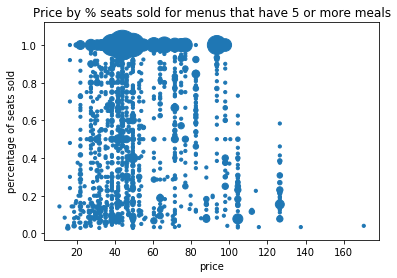

In [162]:
plt.scatter(nice9['ticket_price'], nice9['percentage_seats_sold'], s=nice9['meal_id'] * 10)
plt.xlabel('price')
plt.ylabel('percentage of seats sold')
plt.title("Price by % seats sold for menus that have 5 or more meals")
plt.show()

In [163]:
meal_ids_10 = [11248, 11244, 11240, 11185, 11171, 11002, 10982, 10973, 10969, 10928, 10817, 10774, 10770, 10657, 10628, 10542, 10429, 10420, 10418, 10414, 10403, 10372, 10348, 10346, 10344, 10328, 10295, 10161, 10097, 10046, 9984, 9951, 9931, 9891, 9878, 9672, 9670, 9668, 9666, 9664, 9625, 9606, 9477, 9473, 9457, 9445, 9356, 9351, 9331, 9324, 9240, 9238, 9236, 9213, 9140, 9136, 9119, 9032, 9030, 9028, 8935, 8933, 8923, 8915, 8904, 8812, 8799, 8795, 8793, 8791, 8737, 8735, 8542, 8538, 8534, 8444, 8442, 8440, 8438, 8436, 8311, 8212, 8178, 8116, 8032, 8029, 8015, 7978, 7975, 7942, 7814, 7801, 7746, 7742, 7738, 7639, 7635, 7590, 7556, 7552, 7550, 7548, 7544, 7521, 7496, 7490, 7488, 7485, 7483, 7266, 7203, 7188, 7051, 7035, 7022, 7008, 7006, 6996, 6925, 6886, 6882, 6880, 6842, 6817, 6679, 6629, 6570, 6452, 6438, 6399, 6284, 6270, 6268, 6129, 6087, 6085, 6001, 5999, 5995, 5993, 5989, 5939, 5881, 5867, 5865, 5851, 5839, 5817, 5795, 5789, 5759, 5573, 5571, 5569, 5565, 5563, 5553, 5541, 5417, 5407, 5403, 5401, 5364, 5301, 5193, 5079, 5075, 4796, 4782, 4780, 4776, 4774, 4772, 4751, 4749, 4534, 4515, 4507, 4495, 4493, 4491, 4463, 4428, 4422, 4187, 4185, 4170, 4154, 4150, 4116, 4016, 3806, 3789, 3604, 3529, 3343, 3282, 3216, 3053, 2972, 2964, 2911, 2843, 2771, 2712, 2657, 2540, 2480, 2320, 2207, 2205, 2203, 2199, 2057, 1811, 1777, 1661, 1623, 1355, 1304, 1209, 11306, 11304, 11247, 11245, 11243, 11239, 11237, 11203, 11201, 11199, 11186, 11168, 10944, 10929, 10818, 10816, 10775, 10771, 10769, 10717, 10660, 10658, 10539, 10492, 10428, 10415, 10406, 10402, 10294, 10170, 10160, 10001, 9983, 9981, 9979, 9939, 9932, 9930, 9894, 9892, 9890, 9879, 9859, 9669, 9667, 9665, 9630, 9628, 9626, 9605, 9603, 9476, 9361, 9237, 9139, 9112, 9027, 8941, 8932, 8928, 8926, 8922, 8920, 8918, 8901, 8894, 8794, 8792, 8759, 8736, 8728, 8687, 8643, 8607, 8569, 8541, 8539, 8445, 8441, 8437, 8390, 8322, 8316, 8310, 8308, 8142, 8140, 8107, 8033, 8026, 8018, 8016, 7866, 7811, 7809, 7800, 7798, 7745, 7743, 7700, 7644, 7638, 7591, 7581, 7551, 7549, 7537, 7491, 7484, 7450, 7429, 7425, 7259, 7078, 7076, 7054, 7034, 6965, 6885, 6881, 6879, 6857, 6654, 6630, 6628, 6565, 6539, 6503, 6501, 6451, 6445, 6374, 6283, 6271, 6269, 6267, 6265, 6263, 6245, 6086, 5992, 5984, 5968, 5940, 5898, 5868, 5866, 5842, 5832, 5824, 5822, 5685, 5651, 5611, 5576, 5568, 5530, 5406, 5367, 5300, 5298, 5190, 5116, 5078, 4940, 4912, 4902, 4900, 4785, 4779, 4777, 4773, 4771, 4611, 4533, 4529, 4494, 4462, 4447, 4445, 4435, 4427, 4421, 4411, 4399, 4385, 4336, 4182, 4180, 4155, 4151, 3819, 3774, 3642, 3462, 3360, 3344, 3197, 3145, 3021, 2979, 2713, 2693, 2668, 2656, 2581, 2563, 2557, 2527, 2461, 2325, 2204, 2198, 1812, 1662, 1555, 1529, 1483, 1481, 1479, 1457, 1412, 1356, 11305, 11303, 11250, 11242, 11206, 11204, 11200, 11173, 11169, 10971, 10943, 10932, 10930, 10926, 10815, 10807, 10776, 10772, 10718, 10716, 10659, 10630, 10540, 10538, 10493, 10416, 10352, 10293, 10171, 10121, 10044, 9992, 9990, 9982, 9980, 9944, 9940, 9934, 9929, 9922, 9893, 9889, 9860, 9629, 9627, 9608, 9604, 9403, 9360, 9326, 9233, 9156, 9138, 9134, 9132, 9026, 8927, 8925, 8921, 8919, 8917, 8902, 8900, 8893, 8828, 8797, 8760, 8757, 8729, 8688, 8616, 8544, 8540, 8396, 8323, 8315, 8313, 8230, 8214, 8180, 8143, 8141, 8105, 8021, 8017, 7865, 7812, 7810, 7799, 7797, 7744, 7740, 7584, 7580, 7572, 7540, 7538, 7536, 7492, 7480, 7454, 7428, 7292, 7232, 7230, 7201, 7180, 7105, 7077, 7075, 7057, 7055, 7024, 6966, 6884, 6872, 6862, 6860, 6836, 6815, 6813, 6631, 6627, 6530, 6502, 6500, 6498, 6489, 6450, 6448, 6446, 6353, 6286, 6266, 6264, 6262, 6214, 6131, 6112, 6015, 5997, 5991, 5987, 5985, 5969, 5943, 5941, 5869, 5863, 5823, 5821, 5791, 5761, 5731, 5686, 5654, 5620, 5618, 5610, 5597, 5575, 5567, 5551, 5531, 5523, 5507, 5415, 5399, 5378, 5366, 5328, 5299, 5137, 4911, 4909, 4784, 4778, 4755, 4634, 4565, 4499, 4446, 4444, 4424, 4420, 4418, 4400, 4183, 4152, 3991, 3967, 3856, 3828, 3643, 3637, 3531, 3417, 3357, 3055, 2889, 2847, 2698, 2694, 2603, 2556, 2528, 2460, 2324, 2211, 2201, 1847, 1813, 1809, 1530, 1460, 1458, 1456, 1369, 11406, 11249, 11241, 11205, 11180, 11174, 11172, 11170, 11001, 10974, 10972, 10970, 10968, 10933, 10931, 10927, 10925, 10853, 10773, 10715, 10629, 10627, 10541, 10421, 10419, 10417, 10371, 10351, 10347, 10345, 10206, 10193, 10120, 10045, 10043, 9991, 9941, 9928, 9849, 9673, 9663, 9607, 9582, 9352, 9339, 9333, 9325, 9323, 9239, 9235, 9196, 9157, 9155, 9137, 9135, 9131, 9110, 9031, 9029, 9015, 8934, 8924, 8916, 8905, 8903, 8863, 8847, 8829, 8800, 8798, 8796, 8767, 8689, 8543, 8443, 8439, 8397, 8314, 8312, 8211, 8181, 8069, 8028, 8020, 8014, 8006, 7977, 7974, 7943, 7868, 7853, 7830, 7826, 7815, 7747, 7741, 7739, 7721, 7636, 7583, 7577, 7553, 7535, 7489, 7487, 7482, 7479, 7267, 7231, 7202, 7200, 7198, 7191, 7187, 7074, 7056, 7050, 7026, 7007, 6924, 6883, 6865, 6861, 6859, 6853, 6837, 6835, 6816, 6814, 6807, 6626, 6531, 6529, 6449, 6447, 6354, 6352, 6285, 6211, 6174, 6110, 6084, 6018, 6000, 5998, 5996, 5994, 5990, 5988, 5986, 5864, 5862, 5854, 5852, 5820, 5794, 5790, 5760, 5701, 5643, 5619, 5574, 5572, 5570, 5566, 5564, 5540, 5506, 5504, 5460, 5398, 5379, 5365, 5302, 5288, 5210, 5204, 5202, 5194, 5188, 5166, 5134, 5122, 5076, 5074, 4910, 4859, 4795, 4783, 4781, 4775, 4752, 4750, 4661, 4599, 4560, 4516, 4512, 4496, 4492, 4490, 4423, 4419, 4334, 4186, 4153, 4149, 4117, 4115, 3988, 3710, 3534, 3514, 3458, 3420, 3342, 2973, 2912, 2906, 2770, 2555, 2212, 2208, 2206, 2202, 2200, 1810, 1352, 1344, 1328, 1133, 1086]

In [164]:
nice10 = something[something['meal_id'].isin(meal_ids_10)].groupby(['ticket_price', 'percentage_seats_sold']).count()['meal_id'].reset_index()

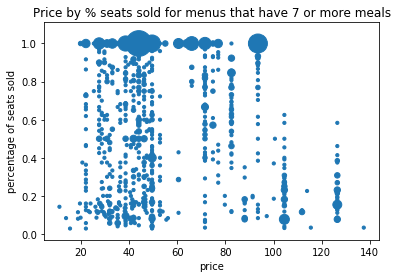

In [167]:
plt.scatter(nice10['ticket_price'], nice10['percentage_seats_sold'], s=nice10['meal_id'] * 10)
plt.xlabel('price')
plt.ylabel('percentage of seats sold')
plt.title("Price by % seats sold for menus that have 7 or more meals")
plt.show()

In [166]:
something

,meal_id,meal_created_date,meal_date,ticket_price,seats_available,seats_sold,percentage_seats_sold,meal_year
0,22,2013-08-13,2012-04-07,49.50,12,6,0.500000,2012
1,23,2013-08-13,2012-03-22,27.50,16,10,0.625000,2012
2,37,2013-08-13,2012-05-25,27.00,12,12,1.000000,2012
3,46,2013-08-13,2012-07-15,11.00,12,12,1.000000,2012
4,52,2013-08-13,2012-08-12,35.20,14,14,1.000000,2012
5,54,2013-08-13,2012-08-19,27.50,18,18,1.000000,2012
6,57,2013-08-13,2012-07-28,11.00,12,7,0.583333,2012
7,81,2013-08-13,2012-11-17,44.00,11,11,1.000000,2012
8,82,2013-08-13,2012-10-14,33.00,17,16,0.941176,2012
9,83,2013-08-13,2012-10-20,38.50,8,8,1.000000,2012


In [168]:
meal_ids_11 = [11248, 11244, 11240, 11185, 11002, 10982, 10973, 10969, 10928, 10817, 10774, 10770, 10657, 10628, 10542, 10429, 10420, 10418, 10414, 10403, 10348, 10346, 10344, 9984, 9951, 9931, 9891, 9878, 9672, 9670, 9664, 9625, 9606, 9477, 9473, 9457, 9356, 9351, 9324, 9240, 9238, 9236, 9213, 9140, 9136, 9119, 8935, 8933, 8923, 8915, 8904, 8793, 8791, 8737, 8735, 8542, 8538, 8444, 8442, 8440, 8438, 8436, 8311, 8212, 8178, 8116, 8032, 8029, 8015, 7978, 7975, 7814, 7801, 7746, 7742, 7738, 7639, 7635, 7590, 7556, 7552, 7550, 7548, 7544, 7521, 7496, 7490, 7488, 7485, 7483, 7266, 7203, 7188, 7051, 7035, 7022, 7008, 7006, 6996, 6925, 6886, 6882, 6880, 6842, 6817, 6679, 6629, 6570, 6452, 6438, 6399, 6270, 6268, 6129, 6087, 6085, 6001, 5999, 5995, 5993, 5989, 5939, 5881, 5867, 5865, 5851, 5839, 5817, 5795, 5789, 5759, 5573, 5571, 5569, 5565, 5563, 5541, 5407, 5403, 5401, 5364, 5301, 5193, 5079, 5075, 4782, 4780, 4776, 4774, 4772, 4751, 4749, 4515, 4507, 4495, 4493, 4491, 4463, 4422, 4187, 4185, 4154, 4150, 4016, 3806, 3789, 3343, 3282, 3216, 2972, 2911, 2771, 2712, 2657, 2540, 2480, 2320, 2207, 2205, 2203, 2199, 2057, 1777, 1623, 11306, 11304, 11247, 11245, 11243, 11239, 11237, 11203, 11201, 11199, 11186, 10944, 10929, 10818, 10816, 10775, 10771, 10769, 10660, 10658, 10539, 10428, 10415, 10406, 10402, 10170, 9983, 9981, 9979, 9939, 9932, 9930, 9894, 9892, 9890, 9879, 9669, 9630, 9628, 9626, 9605, 9603, 9361, 9237, 9139, 8941, 8932, 8928, 8926, 8922, 8920, 8918, 8901, 8894, 8794, 8792, 8736, 8728, 8687, 8643, 8569, 8541, 8539, 8445, 8441, 8437, 8390, 8322, 8316, 8310, 8308, 8142, 8140, 8107, 8033, 8026, 8018, 8016, 7866, 7811, 7809, 7800, 7798, 7745, 7743, 7700, 7644, 7638, 7591, 7581, 7551, 7549, 7537, 7491, 7484, 7450, 7429, 7425, 7259, 7078, 7076, 7054, 7034, 6965, 6885, 6881, 6879, 6857, 6654, 6630, 6628, 6565, 6539, 6503, 6501, 6451, 6445, 6374, 6271, 6269, 6267, 6265, 6263, 6245, 6086, 5992, 5984, 5968, 5940, 5898, 5868, 5866, 5824, 5822, 5685, 5651, 5611, 5576, 5568, 5530, 5406, 5367, 5300, 5298, 5078, 4940, 4912, 4902, 4785, 4779, 4777, 4773, 4771, 4533, 4529, 4494, 4462, 4447, 4445, 4435, 4421, 4411, 4399, 4385, 4336, 4182, 4180, 4155, 4151, 3819, 3774, 3642, 3344, 3145, 3021, 2979, 2713, 2693, 2668, 2656, 2581, 2563, 2557, 2527, 2461, 2325, 2204, 2198, 11305, 11303, 11250, 11242, 11206, 11204, 11200, 10971, 10943, 10932, 10930, 10926, 10815, 10776, 10772, 10659, 10630, 10540, 10538, 10416, 10352, 10171, 10121, 9982, 9980, 9944, 9940, 9934, 9929, 9922, 9893, 9889, 9629, 9627, 9608, 9604, 9403, 9360, 9326, 9233, 9138, 9134, 9132, 8927, 8925, 8921, 8919, 8917, 8902, 8900, 8893, 8828, 8757, 8729, 8688, 8616, 8544, 8540, 8396, 8323, 8315, 8313, 8230, 8214, 8180, 8143, 8141, 8105, 8021, 8017, 7865, 7812, 7810, 7799, 7797, 7744, 7740, 7584, 7580, 7572, 7540, 7538, 7536, 7492, 7480, 7454, 7428, 7292, 7232, 7230, 7201, 7180, 7105, 7077, 7075, 7057, 7055, 7024, 6966, 6884, 6872, 6862, 6860, 6836, 6815, 6813, 6631, 6627, 6530, 6502, 6500, 6498, 6489, 6450, 6448, 6446, 6266, 6264, 6262, 6214, 6131, 6112, 5997, 5991, 5987, 5985, 5969, 5943, 5941, 5869, 5863, 5823, 5821, 5791, 5761, 5731, 5686, 5654, 5620, 5618, 5610, 5597, 5575, 5567, 5531, 5523, 5507, 5415, 5378, 5366, 5328, 5299, 5137, 4911, 4909, 4784, 4778, 4755, 4634, 4565, 4446, 4444, 4424, 4420, 4418, 4400, 4183, 4152, 3991, 3967, 3856, 3828, 3643, 3417, 3055, 2889, 2698, 2694, 2603, 2556, 2528, 2460, 2324, 2211, 2201, 11406, 11249, 11241, 11205, 11180, 11001, 10974, 10972, 10970, 10968, 10933, 10931, 10927, 10925, 10853, 10773, 10629, 10627, 10541, 10421, 10419, 10417, 10351, 10347, 10345, 10206, 10193, 9941, 9928, 9849, 9673, 9663, 9607, 9582, 9352, 9325, 9323, 9239, 9235, 9137, 9135, 9131, 9015, 8934, 8924, 8916, 8905, 8903, 8847, 8829, 8689, 8543, 8443, 8439, 8397, 8314, 8312, 8211, 8181, 8069, 8028, 8020, 8014, 8006, 7977, 7974, 7868, 7853, 7830, 7826, 7815, 7747, 7741, 7739, 7721, 7636, 7583, 7577, 7553, 7535, 7489, 7487, 7482, 7479, 7267, 7231, 7202, 7200, 7198, 7191, 7187, 7074, 7056, 7050, 7026, 7007, 6924, 6883, 6865, 6861, 6859, 6853, 6837, 6835, 6816, 6814, 6807, 6626, 6531, 6529, 6449, 6447, 6211, 6174, 6110, 6084, 6018, 6000, 5998, 5996, 5994, 5990, 5988, 5986, 5864, 5862, 5854, 5852, 5820, 5794, 5790, 5760, 5701, 5643, 5619, 5574, 5572, 5570, 5566, 5564, 5540, 5506, 5504, 5460, 5398, 5379, 5365, 5302, 5210, 5204, 5202, 5194, 5134, 5076, 5074, 4910, 4859, 4783, 4781, 4775, 4752, 4750, 4661, 4560, 4516, 4496, 4492, 4490, 4423, 4419, 4334, 4186, 4153, 4149, 3988, 3710, 3534, 3420, 3342, 2973, 2912, 2906, 2770, 2555, 2212, 2208, 2206, 2202, 2200, 1344]

In [169]:
nice11 = something[something['meal_id'].isin(meal_ids_11)].groupby(['ticket_price', 'percentage_seats_sold']).count()['meal_id'].reset_index()

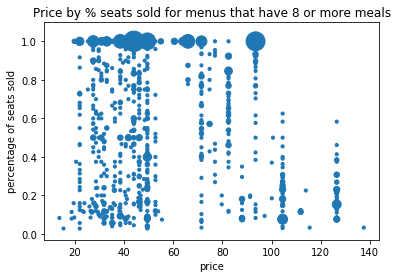

In [171]:
plt.scatter(nice11['ticket_price'], nice11['percentage_seats_sold'], s=nice11['meal_id'] * 10)
plt.xlabel('price')
plt.ylabel('percentage of seats sold')
plt.title("Price by % seats sold for menus that have 8 or more meals")
plt.show()

In [172]:
meal_ids_12 = [11248, 11244, 11240, 10982, 10973, 10969, 10928, 10817, 10657, 10628, 10542, 10420, 10418, 10414, 10403, 10348, 10346, 10344, 9984, 9951, 9891, 9670, 9664, 9625, 9606, 9477, 9473, 9457, 9356, 9351, 9324, 9213, 9140, 9136, 8935, 8933, 8923, 8915, 8793, 8791, 8737, 8735, 8542, 8538, 8444, 8442, 8440, 8438, 8436, 8212, 8178, 8116, 8032, 8029, 8015, 7978, 7975, 7814, 7801, 7746, 7742, 7738, 7639, 7635, 7590, 7552, 7550, 7548, 7521, 7496, 7490, 7488, 7485, 7483, 7266, 7203, 7051, 7035, 7022, 7008, 7006, 6996, 6925, 6886, 6882, 6880, 6842, 6817, 6679, 6629, 6570, 6452, 6399, 6270, 6268, 6129, 6087, 6085, 6001, 5999, 5995, 5993, 5989, 5867, 5865, 5839, 5817, 5795, 5789, 5759, 5573, 5571, 5569, 5565, 5563, 5541, 5407, 5403, 5401, 5364, 5301, 5193, 5079, 5075, 4782, 4780, 4776, 4774, 4772, 4751, 4749, 4507, 4495, 4493, 4491, 4463, 4422, 4187, 4185, 4154, 4150, 4016, 3806, 2972, 2771, 2657, 2480, 2207, 2205, 2203, 2199, 1777, 1623, 11306, 11304, 11247, 11245, 11243, 11239, 11237, 10944, 10929, 10818, 10816, 10660, 10658, 10539, 10415, 10406, 10402, 10170, 9983, 9981, 9979, 9939, 9894, 9892, 9890, 9879, 9669, 9630, 9628, 9626, 9605, 9603, 9139, 8932, 8928, 8926, 8922, 8920, 8918, 8901, 8894, 8794, 8792, 8736, 8728, 8687, 8643, 8541, 8539, 8445, 8441, 8437, 8390, 8322, 8142, 8140, 8107, 8033, 8026, 8018, 8016, 7866, 7811, 7809, 7800, 7798, 7745, 7743, 7700, 7644, 7638, 7591, 7581, 7551, 7549, 7537, 7491, 7484, 7450, 7429, 7425, 7259, 7078, 7076, 7054, 7034, 6965, 6885, 6881, 6879, 6857, 6654, 6630, 6628, 6539, 6503, 6501, 6451, 6445, 6271, 6269, 6267, 6265, 6263, 6086, 5992, 5984, 5968, 5898, 5868, 5866, 5824, 5822, 5685, 5651, 5576, 5568, 5530, 5406, 5367, 5300, 5298, 5078, 4940, 4912, 4902, 4785, 4779, 4777, 4773, 4771, 4533, 4529, 4494, 4462, 4447, 4445, 4435, 4421, 4411, 4399, 4385, 4182, 4180, 4155, 4151, 3819, 3774, 3145, 3021, 2656, 2581, 2563, 2527, 2461, 2325, 2204, 2198, 11305, 11303, 11250, 11242, 10971, 10943, 10932, 10930, 10926, 10815, 10659, 10540, 10538, 10416, 10352, 10171, 10121, 9982, 9980, 9944, 9940, 9934, 9893, 9889, 9629, 9627, 9608, 9604, 9403, 9326, 9138, 9134, 9132, 8927, 8925, 8921, 8919, 8917, 8902, 8900, 8893, 8828, 8757, 8729, 8688, 8616, 8544, 8540, 8396, 8323, 8230, 8214, 8180, 8143, 8141, 8105, 8021, 8017, 7865, 7812, 7810, 7799, 7797, 7744, 7740, 7584, 7580, 7572, 7540, 7538, 7536, 7492, 7480, 7454, 7428, 7292, 7232, 7230, 7201, 7180, 7105, 7077, 7075, 7057, 7055, 7024, 6966, 6884, 6872, 6862, 6860, 6836, 6815, 6813, 6631, 6627, 6502, 6500, 6498, 6489, 6450, 6448, 6446, 6266, 6264, 6262, 6131, 6112, 5997, 5991, 5987, 5985, 5969, 5869, 5863, 5823, 5821, 5791, 5731, 5686, 5654, 5620, 5618, 5575, 5567, 5531, 5523, 5507, 5415, 5378, 5366, 5328, 5299, 5137, 4911, 4909, 4784, 4778, 4755, 4634, 4565, 4446, 4444, 4424, 4420, 4418, 4400, 4183, 4152, 3991, 3856, 3828, 3055, 2603, 2528, 2460, 2324, 2201, 11406, 11249, 11241, 11001, 10974, 10972, 10970, 10968, 10933, 10931, 10927, 10925, 10853, 10629, 10627, 10541, 10421, 10419, 10417, 10351, 10347, 10345, 10206, 10193, 9941, 9849, 9663, 9607, 9582, 9352, 9325, 9323, 9137, 9135, 9131, 9015, 8934, 8924, 8916, 8903, 8847, 8829, 8689, 8543, 8443, 8439, 8397, 8211, 8181, 8028, 8020, 8014, 8006, 7977, 7974, 7868, 7853, 7826, 7815, 7747, 7741, 7739, 7721, 7636, 7583, 7577, 7553, 7535, 7489, 7487, 7482, 7479, 7267, 7231, 7202, 7200, 7198, 7191, 7187, 7074, 7056, 7050, 7026, 7007, 6924, 6883, 6865, 6861, 6859, 6853, 6837, 6835, 6816, 6814, 6807, 6626, 6449, 6447, 6211, 6174, 6110, 6084, 6000, 5998, 5996, 5994, 5990, 5988, 5986, 5864, 5862, 5854, 5820, 5794, 5790, 5760, 5701, 5643, 5619, 5574, 5572, 5570, 5566, 5564, 5540, 5506, 5504, 5460, 5398, 5379, 5365, 5302, 5210, 5204, 5202, 5194, 5134, 5076, 5074, 4910, 4783, 4781, 4775, 4752, 4750, 4661, 4496, 4492, 4490, 4423, 4419, 4186, 4153, 4149, 3988, 3534, 3420, 2973, 2912, 2906, 2770, 2208, 2206, 2202, 2200, 1344]

In [173]:
nice12 = something[something['meal_id'].isin(meal_ids_12)].groupby(['ticket_price', 'percentage_seats_sold']).count()['meal_id'].reset_index()

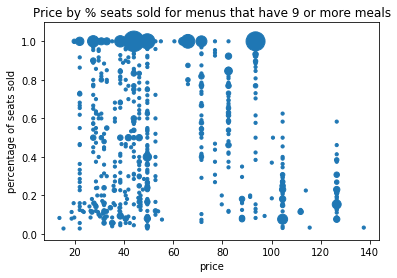

In [174]:
plt.scatter(nice12['ticket_price'], nice12['percentage_seats_sold'], s=nice12['meal_id'] * 10)
plt.xlabel('price')
plt.ylabel('percentage of seats sold')
plt.title("Price by % seats sold for menus that have 9 or more meals")
plt.show()

In [175]:
meal_ids_13 = [11305, 11303, 11250, 11242, 10971, 10932, 10930, 10926, 10815, 10659, 10540, 10538, 10416, 10352, 10171, 9982, 9980, 9944, 9940, 9934, 9893, 9889, 9629, 9627, 9608, 9604, 9403, 9138, 9134, 9132, 8927, 8925, 8921, 8919, 8917, 8902, 8900, 8893, 8828, 8729, 8688, 8616, 8323, 8214, 8180, 8143, 8141, 8017, 7865, 7810, 7797, 7744, 7740, 7584, 7580, 7572, 7540, 7538, 7536, 7492, 7480, 7428, 7292, 7232, 7230, 7201, 7180, 7105, 7077, 7075, 7057, 7055, 7024, 6966, 6884, 6862, 6860, 6836, 6815, 6813, 6631, 6627, 6502, 6500, 6498, 6489, 6450, 6448, 6446, 6266, 6264, 6262, 6131, 6112, 5997, 5991, 5987, 5985, 5969, 5869, 5863, 5823, 5821, 5791, 5731, 5686, 5654, 5620, 5618, 5575, 5567, 5531, 5523, 5507, 5415, 5378, 5366, 5299, 4911, 4909, 4784, 4778, 4755, 4634, 4446, 4444, 4424, 4420, 4418, 4400, 4183, 4152, 3991, 3856, 3828, 3055, 2528, 2460, 2201, 11406, 11249, 11241, 11001, 10974, 10972, 10970, 10968, 10933, 10931, 10927, 10925, 10853, 10627, 10541, 10421, 10419, 10417, 10351, 10347, 10345, 10206, 9941, 9849, 9663, 9607, 9582, 9352, 9137, 9135, 9131, 9015, 8934, 8924, 8916, 8903, 8829, 8689, 8443, 8439, 8211, 8181, 8028, 8014, 7977, 7974, 7868, 7853, 7826, 7815, 7747, 7741, 7739, 7721, 7636, 7583, 7553, 7535, 7489, 7487, 7482, 7479, 7267, 7231, 7202, 7200, 7198, 7191, 7074, 7056, 7050, 7026, 6924, 6883, 6861, 6859, 6853, 6837, 6816, 6814, 6807, 6626, 6449, 6447, 6174, 6110, 6084, 6000, 5998, 5996, 5994, 5990, 5988, 5986, 5864, 5862, 5854, 5820, 5794, 5790, 5701, 5643, 5619, 5574, 5572, 5570, 5566, 5564, 5540, 5506, 5504, 5460, 5398, 5379, 5365, 5302, 5210, 5204, 5202, 5194, 5134, 5076, 5074, 4910, 4783, 4781, 4775, 4752, 4750, 4661, 4496, 4492, 4490, 4423, 4419, 4186, 4153, 4149, 3988, 3534, 3420, 2973, 2906, 2770, 2208, 2206, 2202, 2200, 1344, 11248, 11244, 11240, 10982, 10973, 10969, 10928, 10817, 10657, 10628, 10542, 10420, 10418, 10414, 10403, 10348, 10346, 10344, 9984, 9951, 9891, 9664, 9625, 9606, 9477, 9473, 9457, 9356, 9351, 9213, 9140, 9136, 8935, 8933, 8923, 8915, 8793, 8791, 8737, 8735, 8444, 8442, 8440, 8438, 8436, 8212, 8178, 8032, 8029, 8015, 7978, 7975, 7814, 7801, 7746, 7742, 7738, 7639, 7635, 7590, 7552, 7550, 7548, 7521, 7496, 7490, 7488, 7485, 7483, 7266, 7203, 7051, 7035, 7022, 6996, 6925, 6886, 6882, 6880, 6842, 6817, 6679, 6629, 6452, 6399, 6270, 6268, 6087, 6085, 6001, 5999, 5995, 5993, 5989, 5867, 5865, 5839, 5817, 5795, 5789, 5573, 5571, 5569, 5565, 5563, 5541, 5407, 5403, 5401, 5364, 5301, 5193, 5079, 5075, 4782, 4780, 4776, 4774, 4772, 4751, 4749, 4507, 4495, 4493, 4491, 4463, 4422, 4187, 4185, 4154, 4150, 4016, 3806, 2972, 2771, 2657, 2207, 2205, 2203, 2199, 1777, 1623, 11306, 11304, 11247, 11245, 11243, 11239, 11237, 10929, 10818, 10816, 10660, 10658, 10539, 10415, 10406, 10402, 10170, 9983, 9981, 9979, 9939, 9894, 9892, 9890, 9630, 9628, 9626, 9605, 9603, 9139, 8932, 8928, 8926, 8922, 8920, 8918, 8901, 8894, 8794, 8792, 8736, 8728, 8687, 8643, 8445, 8441, 8437, 8390, 8322, 8142, 8140, 8033, 8026, 8018, 8016, 7866, 7809, 7798, 7745, 7743, 7638, 7591, 7581, 7551, 7549, 7537, 7491, 7484, 7429, 7425, 7259, 7078, 7076, 7054, 7034, 6965, 6885, 6881, 6879, 6857, 6654, 6630, 6628, 6503, 6501, 6451, 6445, 6271, 6269, 6267, 6265, 6263, 6086, 5992, 5984, 5968, 5898, 5868, 5866, 5824, 5822, 5685, 5576, 5568, 5530, 5406, 5367, 5300, 5298, 5078, 4940, 4912, 4902, 4785, 4779, 4777, 4773, 4771, 4533, 4529, 4494, 4462, 4447, 4445, 4421, 4411, 4399, 4385, 4182, 4180, 4155, 4151, 3819, 3774, 3145, 3021, 2656, 2581, 2527, 2461, 2204, 2198]

In [176]:
nice13 = something[something['meal_id'].isin(meal_ids_13)].groupby(['ticket_price', 'percentage_seats_sold']).count()['meal_id'].reset_index()

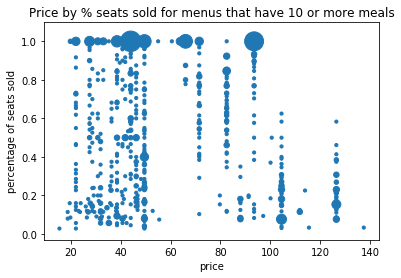

In [177]:
plt.scatter(nice13['ticket_price'], nice13['percentage_seats_sold'], s=nice13['meal_id'] * 10)
plt.xlabel('price')
plt.ylabel('percentage of seats sold')
plt.title("Price by % seats sold for menus that have 10 or more meals")
plt.show()

In [178]:
meal_ids_14 = [10982, 10973, 10969, 10928, 10542, 10420, 10418, 10414, 10403, 10348, 10346, 10344, 9984, 9891, 9664, 9625, 9606, 9473, 9457, 9356, 9351, 9140, 9136, 8935, 8933, 8923, 8915, 8737, 8735, 8444, 8442, 8440, 8438, 8436, 8212, 8178, 8032, 7978, 7975, 7814, 7801, 7746, 7742, 7738, 7639, 7635, 7590, 7552, 7550, 7548, 7496, 7490, 7485, 7483, 7266, 7203, 7035, 6925, 6886, 6842, 6817, 6452, 6399, 6270, 6268, 6087, 6085, 6001, 5999, 5995, 5993, 5989, 5867, 5865, 5839, 5573, 5541, 5407, 5403, 5401, 5364, 5193, 5079, 5075, 4782, 4780, 4776, 4774, 4772, 4751, 4749, 4495, 4493, 4491, 4463, 4422, 4187, 4185, 4154, 4150, 4016, 2972, 2771, 11306, 11304, 10929, 10539, 10415, 10406, 10402, 10170, 9939, 9894, 9892, 9890, 9630, 9628, 9626, 9605, 9603, 9139, 8932, 8928, 8926, 8922, 8920, 8918, 8901, 8894, 8736, 8687, 8643, 8445, 8441, 8437, 8322, 8142, 8140, 8033, 7866, 7809, 7798, 7745, 7743, 7638, 7591, 7581, 7551, 7549, 7537, 7491, 7484, 7429, 7425, 7259, 7078, 7076, 7034, 6965, 6885, 6879, 6857, 6503, 6501, 6451, 6445, 6271, 6269, 6267, 6265, 6263, 6086, 5992, 5984, 5868, 5866, 5685, 5576, 5530, 5406, 5367, 5078, 4940, 4785, 4779, 4777, 4773, 4771, 4533, 4529, 4494, 4462, 4421, 4385, 4182, 4180, 4155, 4151, 3145, 3021, 2527, 11305, 11303, 10971, 10932, 10930, 10926, 10540, 10538, 10416, 10352, 10171, 9944, 9940, 9934, 9893, 9889, 9629, 9627, 9608, 9604, 9138, 9134, 9132, 8927, 8925, 8921, 8919, 8917, 8902, 8900, 8893, 8828, 8688, 8323, 8214, 8180, 8143, 8141, 7865, 7810, 7797, 7744, 7740, 7584, 7580, 7572, 7540, 7538, 7536, 7492, 7480, 7428, 7292, 7232, 7230, 7201, 7180, 7105, 7077, 7075, 6966, 6884, 6862, 6860, 6815, 6813, 6502, 6500, 6498, 6489, 6450, 6448, 6446, 6266, 6264, 6262, 6131, 6112, 5997, 5991, 5987, 5985, 5869, 5863, 5686, 5575, 5531, 5366, 4784, 4778, 4755, 4424, 4420, 4418, 4183, 4152, 3991, 2528, 10974, 10972, 10970, 10968, 10933, 10931, 10927, 10925, 10853, 10541, 10421, 10419, 10417, 10351, 10347, 10345, 10206, 9941, 9849, 9663, 9607, 9352, 9137, 9135, 9131, 8934, 8924, 8916, 8903, 8829, 8689, 8443, 8439, 8211, 8181, 7977, 7974, 7868, 7853, 7826, 7815, 7747, 7741, 7739, 7636, 7583, 7553, 7535, 7487, 7482, 7479, 7267, 7231, 7202, 7200, 7198, 7074, 6924, 6861, 6859, 6816, 6814, 6807, 6449, 6447, 6110, 6084, 6000, 5998, 5996, 5994, 5990, 5988, 5986, 5864, 5862, 5643, 5574, 5572, 5540, 5365, 5194, 5076, 5074, 4783, 4781, 4775, 4752, 4750, 4496, 4492, 4490, 4423, 4419, 4186, 4153, 4149]

In [179]:
nice14 = something[something['meal_id'].isin(meal_ids_14)].groupby(['ticket_price', 'percentage_seats_sold']).count()['meal_id'].reset_index()

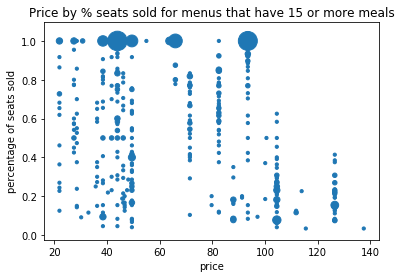

In [181]:
plt.scatter(nice14['ticket_price'], nice14['percentage_seats_sold'], s=nice14['meal_id'] * 10)
plt.xlabel('price')
plt.ylabel('percentage of seats sold')
plt.title("Price by % seats sold for menus that have 15 or more meals")
plt.show()

In [46]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords 
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.metrics import accuracy_score 
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

import string
punctuations = string.punctuation

from spacy.en import English
parser = English()

#Custom transformer using spaCy 
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

# Basic utility function to clean the text 
def clean_text(text):     
    return text.strip().lower()

In [47]:
#Create spacy tokenizer that parses a sentence and generates tokens
#these can also be replaced by word vectors 
def spacy_tokenizer(sentence):
    tokens = parser(sentence)
    tokens = [tok.lemma_.lower().strip() if (tok.lemma_ != "-PRON-" ) else tok.lower_ for tok in tokens]
    tokens = [tok for tok in tokens if (tok not in stopwords and tok not in punctuations)]
    return tokens

vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
# vectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

In [59]:
s3 = boto3.client('s3') 
obj = s3.get_object(Bucket='braydencleary-data', Key='feastly/menu_dishes.csv') 
csv_string = obj['Body'].read().decode('utf-8')
df = pd.read_csv(StringIO(csv_string), header=None, names=['a', 'b', 'c', 'd', 'about', 'course']) # 'Body' is a key word

In [60]:
df

,a,b,c,d,about,course
0,1,2.0,0,med-diet,"grilled fish, vegitables and dessert",First Course
1,2,5.0,0,Green salad,NaN,First Course
2,3,5.0,1,Muffin Trio,NaN,First Course
3,4,5.0,2,Sausage based frittata,NaN,Second Course
4,5,5.0,3,Veggie based frittata,NaN,Second Course
5,6,5.0,4,French toast casserole,NaN,Second Course
6,7,5.0,5,Beverages,NaN,Third Course
7,8,6.0,0,"Green, Red and Gold!",Summer Salad Martini\r\nStuffed Sweet Peppers\...,First Course
8,9,6.0,1,It's all about Green!,Shrimp Salad Cucumber Cups\r\nSweet Pea Rice R...,Second Course
9,10,6.0,2,Who wants to be caught Red!,Spicy Tuna Balls\r\nRed curry chicken Skewers\...,Second Course


In [62]:
df['about'].fillna('', inplace=True)

In [63]:
vect = vectorizer.fit_transform(df.about)

In [64]:
feature_names = vectorizer.get_feature_names()

In [124]:
def implement_sklearn_nmf(term_doc_matrix, feature_names, latent_feature_count=10):
    nmf = NMF(latent_feature_count)
    W = nmf.fit_transform(term_doc_matrix)
    print ('components: {}'.format(nmf.components_))
    print(nmf.components_.shape)
    indices = np.argsort(nmf.components_, axis=1)[:, -10:]
    for row in indices:
        print ([feature_names[i] for i in row])
    return W

In [ ]:
latent_features = implement_sklearn_nmf(vect, feature_names)

In [80]:
labels = ['buttery-ness', 'desserty-ness', 'fry-ingredient-ness', 'interactive-ness', 'milky-ness', 'stir-fry-ness', 'herby-ness', 'salad-ness', 'marinate-ness', 'savory-ness']

### style of language in description of menu dish
- ratio of adjectives to nouns 

In [113]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as sw 
stop_words = list(set(sw))

In [114]:
additional_stopwords = [u'butter', u'warm', u'homemade', u'spice', u'vegetable', u'dip',
       u'style', u'dish', u'bread', u'serve', u'toast', u'whip', u'cake',
       u'vanilla', u'homemade', u'milk', u'chocolate', u'ice', u'coconut',
       u'cream', u'ginger', u'roasted', u'olive', u'red', u'pepper',
       u'green', u'oil', u'tomato', u'garlic', u'onion', u'work', u'meal',
       u'house', u'simple', u'use', u'home', u'good', u'dish', u'dinner',
       u'make', u'milk', u'white', u'spice', u'beef', u'fried', u'green',
       u'cook', u'coconut', u'dish', u'rice', u'peanut', u'homemade',
       u'shrimp', u'fish', u'fry', u'pork', u'dip', u'soy', u'spicy',
       u'sauce', u'tea', u'dry', u'vegetable', u'fruit', u'lime', u'juice',
       u'mint', u'lemon', u'herb', u'fresh', u'vinaigrette', u'tomato',
       u'herb', u'toast', u'egg', u"'s", u'salad', u'bread', u'goat',
       u'cheese', u'marinate', u'mushroom', u'fry', u'organic', u'broth',
       u'noodle', u'pork', u'vegetable', u'egg', u'chicken', u'carrot', u'pork', u'flavor', u'roasted', u'roast', u'savory', u'corn', u'spicy', u'potato', u'sweet']

In [115]:
for additional_stop_word in additional_stopwords:
    stop_words.append(additional_stop_word)

In [116]:
len(stop_words)

418

In [117]:
vectorizer2 = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1), stop_words=stop_words)

In [119]:
vect2 = vectorizer2.fit_transform(df.about)
feature_names2 = vectorizer2.get_feature_names()
latent_features2 = implement_sklearn_nmf(vect2, feature_names2)

components: [[  7.29910998e-05   1.82229357e-03   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   2.85527957e-05
    0.00000000e+00   0.00000000e+00]
 [  9.78006645e-06   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   1.45718164e-03   0.00000000e+00 ...,   1.29543341e-02
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   4.07039757e-03   7.93092948e-04 ...,   4.82378013e-06
    6.06880386e-04   6.06880386e-04]]
(10, 16450)
[u'radish', u'avocado', u'local', u'basil', u'cilantro', u'almond', u'smoke', u'pickled', u'grill', u'cucumber']
[u'way', u'feast', u'world', u'problem', u'entrepreneur', u'global', u'city', u'forward', u'talk', u'local']
[u'tofu', u'braise', u'mung', u'stir', u'vegan', u'long', u'stew', u'fava'

In [121]:
more_stopwords = [u'radish', u'avocado', u'local', u'basil', u'cilantro', u'almond', u'smoke', u'pickled', u'grill', u'cucumber', u'way', u'feast', u'world', u'problem', u'entrepreneur', u'global', u'city', u'forward', u'talk', u'local', u'tofu', u'braise', u'mung', u'stir', u'vegan', u'long', u'stew', u'fava', u'sprout', u'bean', u'wild', u'tuna', u'sprout', u'season', u'paste', u'scallion', u'salt', u'chili', u'sesame', u'seed', u'c.', u'minute', u'bowl', u'add', u'2', u'sugar', u'1', u'flour', u'salt', u'mix', u'ground', u'accompany', u'avocado', u'tuna', u'salmon', u'hand', u'sushi', u'2', u'filipino', u'roll', u'sous', u'market', u'traditional', u'brown', u'hour', u'loco', u'moco', u'rib', u'gravy', u'slow', u'pinot', u'glass', u'grape', u'beer', u'braise', u'drink', u'cocktail', u'course', u'pair', u'wine', u'honey', u'hot', u'cashew', u'bacon', u'truffle', u'leaf', u'cherry', u'pea', u'waffle', u'black', u'base', u'creamy', u'classic', u'chef', u'rich', u'delicious', u'like', u'food', u'dessert', u'soup']

In [122]:
for stop_word in more_stopwords:
    stop_words.append(stop_word)

In [125]:
vectorizer3 = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1), stop_words=stop_words)
vect3 = vectorizer3.fit_transform(df.about)
feature_names3 = vectorizer3.get_feature_names()
latent_features3 = implement_sklearn_nmf(vect3, feature_names3, 3)

components: [[  3.81477760e-04   6.35014651e-03   4.61345708e-04 ...,   8.31061686e-04
    4.50845677e-04   4.50845677e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   2.60208524e-03
    2.97567027e-05   2.97567027e-05]]
(3, 16357)
[u'beet', u'curry', u'squash', u'toss', u'eggplant', u'seasonal', u'slice', u'apple', u'orange', u'crispy']
[u'enim', u'eum', u'aut', u'et', u's', u'sit', u'voluptatem', u'quia', u'ut', u'qui']
[u'choose', u'worldwide', u'host', u'night', u'want', u'bit', u'share', u'end', u'day', u'small']
